In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
dbfile = 'accident_data_v1.0.0_2023.db'
con=sqlite3.connect(dbfile)

cur = con.cursor()
table_list = [a[0] for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(f'Table names are : {table_list}')
df_accident = pd.read_sql_query('SELECT longitude, latitude From accident', con)

Table names are : ['accident', 'casualty', 'vehicle', 'lsoa']


In [5]:
df_vehicle = pd.read_sql_query('SELECT * From vehicle', con)
df_casualty = pd.read_sql_query('SELECT * From casualty', con)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

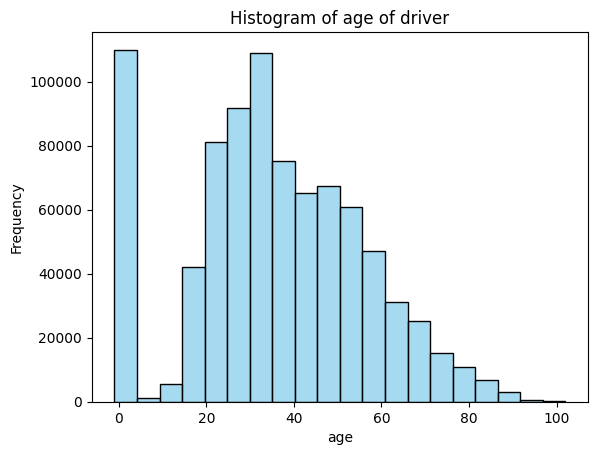

In [8]:
sns.histplot(data = df_vehicle['age_of_driver'] , bins=20, kde=False, color='skyblue')
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Histogram of age of driver")
plt.show()

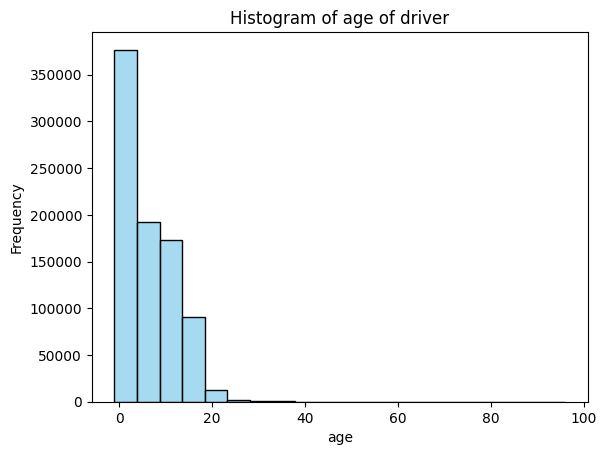

In [12]:
sns.histplot(data = df_vehicle['age_of_vehicle'] , bins=20, kde=False, color='skyblue')
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Histogram of age of driver")
plt.show()

In [13]:
def calculate_quartiles(data_column):
    """
    Calculates the upper quartile, lower quartile, and IQR for a given data column.

    Args:
        data_column (pd.Series): A Pandas Series or DataFrame column.

    Returns:
        tuple: A tuple containing (lower_quartile - 1.5*IQR, upper_quartile + 1.5*IQR).
    """
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    return lower_limit, upper_limit

In [14]:
calculate_quartiles(df_vehicle['age_of_vehicle'])

(-15.0, 25.0)

In [15]:
calculate_quartiles(df_vehicle['age_of_driver'])

(-17.5, 90.5)

In [22]:
n=0
for index, row in df_vehicle.iterrows():
    age = float(row['age_of_vehicle'])
    if age < -15.5 or age > 25.0:
        n+=1
        display(row)
        print('---')


vehicle_index                                1035
accident_index                      2017010011125
accident_year                                2017
accident_reference                      010011125
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                1312
accident_index                      2017010011756
accident_year                                2017
accident_reference                      010011756
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                1547
accident_index                      2017010012078
accident_year                                2017
accident_reference                      010012078
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                1600
accident_index                      2017010012223
accident_year                                2017
accident_reference                      010012223
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                1910
accident_index                      2017010012850
accident_year                                2017
accident_reference                      010012850
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                2026
accident_index                      2017010013058
accident_year                                2017
accident_reference                      010013058
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                2409
accident_index                      2017010013801
accident_year                                2017
accident_reference                      010013801
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                2614
accident_index                      2017010014223
accident_year                                2017
accident_reference                      010014223
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                3067
accident_index                      2017010014945
accident_year                                2017
accident_reference                      010014945
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          0
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                3122
accident_index                      2017010014997
accident_year                                2017
accident_reference                      010014997
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                3430
accident_index                      2017010015489
accident_year                                2017
accident_reference                      010015489
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                3570
accident_index                      2017010015799
accident_year                                2017
accident_reference                      010015799
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                3705
accident_index                      2017010015988
accident_year                                2017
accident_reference                      010015988
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                4127
accident_index                      2017010016535
accident_year                                2017
accident_reference                      010016535
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                4563
accident_index                      2017010017368
accident_year                                2017
accident_reference                      010017368
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                5164
accident_index                      2017010018566
accident_year                                2017
accident_reference                      010018566
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                5622
accident_index                      2017010019378
accident_year                                2017
accident_reference                      010019378
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                5678
accident_index                      2017010019463
accident_year                                2017
accident_reference                      010019463
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                6277
accident_index                      2017010020724
accident_year                                2017
accident_reference                      010020724
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                6531
accident_index                      2017010021229
accident_year                                2017
accident_reference                      010021229
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                7052
accident_index                      2017010022381
accident_year                                2017
accident_reference                      010022381
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        9
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                8267
accident_index                      2017010024793
accident_year                                2017
accident_reference                      010024793
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                8283
accident_index                      2017010024827
accident_year                                2017
accident_reference                      010024827
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           2
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                8815
accident_index                      2017010025904
accident_year                                2017
accident_reference                      010025904
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                9007
accident_index                      2017010026317
accident_year                                2017
accident_reference                      010026317
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                9209
accident_index                      2017010026692
accident_year                                2017
accident_reference                      010026692
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               10320
accident_index                      2017010028654
accident_year                                2017
accident_reference                      010028654
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               10410
accident_index                      2017010028889
accident_year                                2017
accident_reference                      010028889
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               10872
accident_index                      2017010029629
accident_year                                2017
accident_reference                      010029629
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               10917
accident_index                      2017010029657
accident_year                                2017
accident_reference                      010029657
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               12367
accident_index                      2017010032158
accident_year                                2017
accident_reference                      010032158
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               13137
accident_index                      2017010033185
accident_year                                2017
accident_reference                      010033185
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               13184
accident_index                      2017010033227
accident_year                                2017
accident_reference                      010033227
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               13691
accident_index                      2017010033914
accident_year                                2017
accident_reference                      010033914
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               13758
accident_index                      2017010033996
accident_year                                2017
accident_reference                      010033996
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                               4
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               14983
accident_index                      2017010035676
accident_year                                2017
accident_reference                      010035676
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               15202
accident_index                      2017010035952
accident_year                                2017
accident_reference                      010035952
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               15271
accident_index                      2017010036022
accident_year                                2017
accident_reference                      010036022
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               15618
accident_index                      2017010036632
accident_year                                2017
accident_reference                      010036632
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               9
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               16390
accident_index                      2017010037808
accident_year                                2017
accident_reference                      010037808
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               17616
accident_index                      2017010039762
accident_year                                2017
accident_reference                      010039762
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               18444
accident_index                      2017010040801
accident_year                                2017
accident_reference                      010040801
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               18518
accident_index                      2017010040953
accident_year                                2017
accident_reference                      010040953
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               19399
accident_index                      2017010042178
accident_year                                2017
accident_reference                      010042178
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               19969
accident_index                      2017010042884
accident_year                                2017
accident_reference                      010042884
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                               20302
accident_index                      2017010043356
accident_year                                2017
accident_reference                      010043356
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               21362
accident_index                      2017010044674
accident_year                                2017
accident_reference                      010044674
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               21498
accident_index                      2017010044786
accident_year                                2017
accident_reference                      010044786
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               21723
accident_index                      2017010045013
accident_year                                2017
accident_reference                      010045013
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               22472
accident_index                      2017010046036
accident_year                                2017
accident_reference                      010046036
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               22554
accident_index                      2017010046106
accident_year                                2017
accident_reference                      010046106
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               22849
accident_index                      2017010046508
accident_year                                2017
accident_reference                      010046508
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               23308
accident_index                      2017010047136
accident_year                                2017
accident_reference                      010047136
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               24100
accident_index                      2017010048042
accident_year                                2017
accident_reference                      010048042
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               25358
accident_index                      2017010049724
accident_year                                2017
accident_reference                      010049724
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               9
skidding_and_overturning                        0
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               25625
accident_index                      2017010049938
accident_year                                2017
accident_reference                      010049938
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               26865
accident_index                      2017010051795
accident_year                                2017
accident_reference                      010051795
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               27295
accident_index                      2017010052306
accident_year                                2017
accident_reference                      010052306
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               28698
accident_index                      2017010054362
accident_year                                2017
accident_reference                      010054362
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               29551
accident_index                      2017010055931
accident_year                                2017
accident_reference                      010055931
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               30250
accident_index                      2017010056738
accident_year                                2017
accident_reference                      010056738
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        1
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               30861
accident_index                      2017010057573
accident_year                                2017
accident_reference                      010057573
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               31466
accident_index                      2017010058265
accident_year                                2017
accident_reference                      010058265
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               31494
accident_index                      2017010058324
accident_year                                2017
accident_reference                      010058324
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               32896
accident_index                      2017010060291
accident_year                                2017
accident_reference                      010060291
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               33115
accident_index                      2017010060568
accident_year                                2017
accident_reference                      010060568
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               33752
accident_index                      2017010061429
accident_year                                2017
accident_reference                      010061429
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               33810
accident_index                      2017010061544
accident_year                                2017
accident_reference                      010061544
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               35217
accident_index                      2017010063324
accident_year                                2017
accident_reference                      010063324
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   2


---


vehicle_index                               35668
accident_index                      2017010064036
accident_year                                2017
accident_reference                      010064036
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               35721
accident_index                      2017010064161
accident_year                                2017
accident_reference                      010064161
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               35942
accident_index                      2017010064440
accident_year                                2017
accident_reference                      010064440
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               36319
accident_index                      2017010064860
accident_year                                2017
accident_reference                      010064860
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               37579
accident_index                      2017010066527
accident_year                                2017
accident_reference                      010066527
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               37698
accident_index                      2017010066700
accident_year                                2017
accident_reference                      010066700
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               38080
accident_index                      2017010067110
accident_year                                2017
accident_reference                      010067110
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               38545
accident_index                      2017010067676
accident_year                                2017
accident_reference                      010067676
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               39124
accident_index                      2017010068366
accident_year                                2017
accident_reference                      010068366
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               39677
accident_index                      2017010069126
accident_year                                2017
accident_reference                      010069126
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               40343
accident_index                      2017010069926
accident_year                                2017
accident_reference                      010069926
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               40364
accident_index                      2017010069958
accident_year                                2017
accident_reference                      010069958
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               40956
accident_index                      2017010070921
accident_year                                2017
accident_reference                      010070921
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               41464
accident_index                      2017010071644
accident_year                                2017
accident_reference                      010071644
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               43361
accident_index                      2017010075254
accident_year                                2017
accident_reference                      010075254
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               43653
accident_index                      2017010075747
accident_year                                2017
accident_reference                      010075747
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               44291
accident_index                      2017010077014
accident_year                                2017
accident_reference                      010077014
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               44403
accident_index                      2017010077227
accident_year                                2017
accident_reference                      010077227
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               45195
accident_index                      2017010078679
accident_year                                2017
accident_reference                      010078679
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                               45530
accident_index                      2017010079299
accident_year                                2017
accident_reference                      010079299
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               45897
accident_index                      2017010079871
accident_year                                2017
accident_reference                      010079871
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               47565
accident_index                      2017030172060
accident_year                                2017
accident_reference                      030172060
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               47696
accident_index                      2017030180320
accident_year                                2017
accident_reference                      030180320
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               48191
accident_index                      2017030202690
accident_year                                2017
accident_reference                      030202690
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               48232
accident_index                      2017030204203
accident_year                                2017
accident_reference                      030204203
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               49306
accident_index                      2017030285123
accident_year                                2017
accident_reference                      030285123
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               49893
accident_index                      201704ED17319
accident_year                                2017
accident_reference                      04ED17319
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               50058
accident_index                      201704ED17411
accident_year                                2017
accident_reference                      04ED17411
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               51898
accident_index                      201704SA17362
accident_year                                2017
accident_reference                      04SA17362
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               52403
accident_index                      201704SB17052
accident_year                                2017
accident_reference                      04SB17052
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               52471
accident_index                      201704SB17089
accident_year                                2017
accident_reference                      04SB17089
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               52792
accident_index                      201704SC17038
accident_year                                2017
accident_reference                      04SC17038
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               53961
accident_index                      201704WA17358
accident_year                                2017
accident_reference                      04WA17358
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               54360
accident_index                      201704WB17051
accident_year                                2017
accident_reference                      04WB17051
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               54574
accident_index                      201704WB17159
accident_year                                2017
accident_reference                      04WB17159
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               54669
accident_index                      201704WB17209
accident_year                                2017
accident_reference                      04WB17209
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               54791
accident_index                      201704WB17277
accident_year                                2017
accident_reference                      04WB17277
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               55590
accident_index                      2017051700143
accident_year                                2017
accident_reference                      051700143
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               57389
accident_index                      2017051701673
accident_year                                2017
accident_reference                      051701673
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               57551
accident_index                      2017051701793
accident_year                                2017
accident_reference                      051701793
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               58059
accident_index                      2017051702218
accident_year                                2017
accident_reference                      051702218
vehicle_reference                               1
vehicle_type                                   21
towing_and_articulation                         5
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               59411
accident_index                      2017051800575
accident_year                                2017
accident_reference                      051800575
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               60798
accident_index                      201706E031330
accident_year                                2017
accident_reference                      06E031330
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               61247
accident_index                      201706E037713
accident_year                                2017
accident_reference                      06E037713
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               61328
accident_index                      201706E038721
accident_year                                2017
accident_reference                      06E038721
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               61494
accident_index                      201706F029166
accident_year                                2017
accident_reference                      06F029166
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               61646
accident_index                      201706F032504
accident_year                                2017
accident_reference                      06F032504
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               61710
accident_index                      201706F034080
accident_year                                2017
accident_reference                      06F034080
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               62168
accident_index                      201706G030855
accident_year                                2017
accident_reference                      06G030855
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               62907
accident_index                      201706J036403
accident_year                                2017
accident_reference                      06J036403
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               63456
accident_index                      201706K033065
accident_year                                2017
accident_reference                      06K033065
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               63460
accident_index                      201706K033070
accident_year                                2017
accident_reference                      06K033070
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               63846
accident_index                      201706K038742
accident_year                                2017
accident_reference                      06K038742
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               64128
accident_index                      201706L031379
accident_year                                2017
accident_reference                      06L031379
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               65242
accident_index                      201706N031772
accident_year                                2017
accident_reference                      06N031772
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               65719
accident_index                      201706P032261
accident_year                                2017
accident_reference                      06P032261
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               66252
accident_index                      201706Q031985
accident_year                                2017
accident_reference                      06Q031985
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                               66395
accident_index                      201706Q035616
accident_year                                2017
accident_reference                      06Q035616
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               67610
accident_index                      2017077051614
accident_year                                2017
accident_reference                      077051614
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               68648
accident_index                      2017077158433
accident_year                                2017
accident_reference                      077158433
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                               69054
accident_index                      2017077205009
accident_year                                2017
accident_reference                      077205009
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               69077
accident_index                      2017077209380
accident_year                                2017
accident_reference                      077209380
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               69132
accident_index                      2017077216393
accident_year                                2017
accident_reference                      077216393
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               69990
accident_index                      2017077306648
accident_year                                2017
accident_reference                      077306648
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               70944
accident_index                      2017077400275
accident_year                                2017
accident_reference                      077400275
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               71472
accident_index                      2017100158061
accident_year                                2017
accident_reference                      100158061
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               72405
accident_index                      2017100188662
accident_year                                2017
accident_reference                      100188662
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               72411
accident_index                      2017100188743
accident_year                                2017
accident_reference                      100188743
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               72553
accident_index                      2017100191836
accident_year                                2017
accident_reference                      100191836
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               74365
accident_index                      2017100230750
accident_year                                2017
accident_reference                      100230750
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               74522
accident_index                      2017100234495
accident_year                                2017
accident_reference                      100234495
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               74641
accident_index                      2017100237983
accident_year                                2017
accident_reference                      100237983
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               74789
accident_index                      2017100241587
accident_year                                2017
accident_reference                      100241587
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               75801
accident_index                      2017110175233
accident_year                                2017
accident_reference                      110175233
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               75925
accident_index                      2017110180420
accident_year                                2017
accident_reference                      110180420
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               76310
accident_index                      2017110203547
accident_year                                2017
accident_reference                      110203547
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               76337
accident_index                      2017110204892
accident_year                                2017
accident_reference                      110204892
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               76921
accident_index                      2017110241133
accident_year                                2017
accident_reference                      110241133
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               77049
accident_index                      2017110247888
accident_year                                2017
accident_reference                      110247888
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               78074
accident_index                      2017120055423
accident_year                                2017
accident_reference                      120055423
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78163
accident_index                      2017120060471
accident_year                                2017
accident_reference                      120060471
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78213
accident_index                      2017120064196
accident_year                                2017
accident_reference                      120064196
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78523
accident_index                      2017120087425
accident_year                                2017
accident_reference                      120087425
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78615
accident_index                      2017120092265
accident_year                                2017
accident_reference                      120092265
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78836
accident_index                      2017120106316
accident_year                                2017
accident_reference                      120106316
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79197
accident_index                      2017120124973
accident_year                                2017
accident_reference                      120124973
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79319
accident_index                      2017120133776
accident_year                                2017
accident_reference                      120133776
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               79367
accident_index                      2017120137466
accident_year                                2017
accident_reference                      120137466
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79811
accident_index                      2017120169888
accident_year                                2017
accident_reference                      120169888
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79834
accident_index                      2017120171527
accident_year                                2017
accident_reference                      120171527
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               80216
accident_index                      2017120200994
accident_year                                2017
accident_reference                      120200994
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               80245
accident_index                      2017120202831
accident_year                                2017
accident_reference                      120202831
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               80254
accident_index                      2017120203577
accident_year                                2017
accident_reference                      120203577
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               81663
accident_index                      20171342E0246
accident_year                                2017
accident_reference                      1342E0246
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               82100
accident_index                      2017134360247
accident_year                                2017
accident_reference                      134360247
vehicle_reference                               3
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                               82875
accident_index                      2017134480848
accident_year                                2017
accident_reference                      134480848
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               82990
accident_index                      20171344E1406
accident_year                                2017
accident_reference                      1344E1406
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               83875
accident_index                      20171345S1585
accident_year                                2017
accident_reference                      1345S1585
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               83879
accident_index                      20171345S2067
accident_year                                2017
accident_reference                      1345S2067
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               84497
accident_index                      20171346T0627
accident_year                                2017
accident_reference                      1346T0627
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               84858
accident_index                      20171347D2025
accident_year                                2017
accident_reference                      1347D2025
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               84859
accident_index                      20171347D2025
accident_year                                2017
accident_reference                      1347D2025
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               86759
accident_index                      2017134A71886
accident_year                                2017
accident_reference                      134A71886
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88027
accident_index                      2017134BS0354
accident_year                                2017
accident_reference                      134BS0354
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88315
accident_index                      2017134C70255
accident_year                                2017
accident_reference                      134C70255
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88364
accident_index                      2017134C81904
accident_year                                2017
accident_reference                      134C81904
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                4
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88444
accident_index                      2017134CD0463
accident_year                                2017
accident_reference                      134CD0463
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               88468
accident_index                      2017134CE0568
accident_year                                2017
accident_reference                      134CE0568
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               89299
accident_index                      2017140153950
accident_year                                2017
accident_reference                      140153950
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               90274
accident_index                      2017140177031
accident_year                                2017
accident_reference                      140177031
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               90334
accident_index                      2017140178533
accident_year                                2017
accident_reference                      140178533
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               90517
accident_index                      2017140182380
accident_year                                2017
accident_reference                      140182380
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               90868
accident_index                      2017140191140
accident_year                                2017
accident_reference                      140191140
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               91672
accident_index                      2017140213393
accident_year                                2017
accident_reference                      140213393
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               91757
accident_index                      2017140215128
accident_year                                2017
accident_reference                      140215128
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               91902
accident_index                      2017140216986
accident_year                                2017
accident_reference                      140216986
vehicle_reference                               1
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               91905
accident_index                      2017140216988
accident_year                                2017
accident_reference                      140216988
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               91950
accident_index                      2017140217427
accident_year                                2017
accident_reference                      140217427
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               92417
accident_index                      2017140226101
accident_year                                2017
accident_reference                      140226101
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               92477
accident_index                      2017140228298
accident_year                                2017
accident_reference                      140228298
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               92884
accident_index                      2017140237460
accident_year                                2017
accident_reference                      140237460
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               93578
accident_index                      2017140251725
accident_year                                2017
accident_reference                      140251725
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               93808
accident_index                      2017140256699
accident_year                                2017
accident_reference                      140256699
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               94361
accident_index                      2017160154569
accident_year                                2017
accident_reference                      160154569
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               94552
accident_index                      2017160159813
accident_year                                2017
accident_reference                      160159813
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                               95007
accident_index                      2017160171156
accident_year                                2017
accident_reference                      160171156
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               95230
accident_index                      2017160177707
accident_year                                2017
accident_reference                      160177707
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               95856
accident_index                      2017160193741
accident_year                                2017
accident_reference                      160193741
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               95914
accident_index                      2017160194890
accident_year                                2017
accident_reference                      160194890
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               96402
accident_index                      2017160207924
accident_year                                2017
accident_reference                      160207924
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               96829
accident_index                      2017160220271
accident_year                                2017
accident_reference                      160220271
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               96966
accident_index                      2017160223683
accident_year                                2017
accident_reference                      160223683
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               97670
accident_index                      2017160241955
accident_year                                2017
accident_reference                      160241955
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               97776
accident_index                      2017160243723
accident_year                                2017
accident_reference                      160243723
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               98360
accident_index                      2017170H10437
accident_year                                2017
accident_reference                      170H10437
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               98522
accident_index                      2017170L10777
accident_year                                2017
accident_reference                      170L10777
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               99196
accident_index                      2017170S10687
accident_year                                2017
accident_reference                      170S10687
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               99247
accident_index                      2017170S11277
accident_year                                2017
accident_reference                      170S11277
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               99624
accident_index                      2017200148692
accident_year                                2017
accident_reference                      200148692
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              100253
accident_index                      2017200155492
accident_year                                2017
accident_reference                      200155492
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              101282
accident_index                      2017200165638
accident_year                                2017
accident_reference                      200165638
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              102375
accident_index                      2017200177753
accident_year                                2017
accident_reference                      200177753
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              102461
accident_index                      2017200178415
accident_year                                2017
accident_reference                      200178415
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              103761
accident_index                      2017200194872
accident_year                                2017
accident_reference                      200194872
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              104129
accident_index                      2017200202535
accident_year                                2017
accident_reference                      200202535
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              104273
accident_index                      2017200203663
accident_year                                2017
accident_reference                      200203663
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              104297
accident_index                      2017200203765
accident_year                                2017
accident_reference                      200203765
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              105403
accident_index                      2017200213727
accident_year                                2017
accident_reference                      200213727
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              105543
accident_index                      2017200215241
accident_year                                2017
accident_reference                      200215241
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              106243
accident_index                      2017200222748
accident_year                                2017
accident_reference                      200222748
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              106449
accident_index                      2017200224463
accident_year                                2017
accident_reference                      200224463
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              107294
accident_index                      2017200231778
accident_year                                2017
accident_reference                      200231778
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              107366
accident_index                      2017200232557
accident_year                                2017
accident_reference                      200232557
vehicle_reference                               3
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              108036
accident_index                      2017200238202
accident_year                                2017
accident_reference                      200238202
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              108167
accident_index                      2017200239235
accident_year                                2017
accident_reference                      200239235
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              108174
accident_index                      2017200239344
accident_year                                2017
accident_reference                      200239344
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              109251
accident_index                      2017200248787
accident_year                                2017
accident_reference                      200248787
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              110838
accident_index                      2017210159003
accident_year                                2017
accident_reference                      210159003
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              111548
accident_index                      2017210181546
accident_year                                2017
accident_reference                      210181546
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              111833
accident_index                      2017210191580
accident_year                                2017
accident_reference                      210191580
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              112538
accident_index                      2017210220335
accident_year                                2017
accident_reference                      210220335
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112553
accident_index                      2017210220773
accident_year                                2017
accident_reference                      210220773
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112555
accident_index                      2017210220794
accident_year                                2017
accident_reference                      210220794
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112857
accident_index                      2017210232079
accident_year                                2017
accident_reference                      210232079
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              113246
accident_index                      2017210247406
accident_year                                2017
accident_reference                      210247406
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              113920
accident_index                      2017220150817
accident_year                                2017
accident_reference                      220150817
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              114174
accident_index                      2017220159888
accident_year                                2017
accident_reference                      220159888
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              114330
accident_index                      2017220163622
accident_year                                2017
accident_reference                      220163622
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              114403
accident_index                      2017220164439
accident_year                                2017
accident_reference                      220164439
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              114525
accident_index                      2017220166740
accident_year                                2017
accident_reference                      220166740
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              114890
accident_index                      2017220176095
accident_year                                2017
accident_reference                      220176095
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              114935
accident_index                      2017220177452
accident_year                                2017
accident_reference                      220177452
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              114940
accident_index                      2017220177532
accident_year                                2017
accident_reference                      220177532
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              115235
accident_index                      2017220186171
accident_year                                2017
accident_reference                      220186171
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              115256
accident_index                      2017220186649
accident_year                                2017
accident_reference                      220186649
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              115531
accident_index                      2017220194230
accident_year                                2017
accident_reference                      220194230
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              115705
accident_index                      2017220197601
accident_year                                2017
accident_reference                      220197601
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              115790
accident_index                      2017220199638
accident_year                                2017
accident_reference                      220199638
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              115977
accident_index                      2017220203656
accident_year                                2017
accident_reference                      220203656
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              115989
accident_index                      2017220203803
accident_year                                2017
accident_reference                      220203803
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              116001
accident_index                      2017220203985
accident_year                                2017
accident_reference                      220203985
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              116069
accident_index                      2017220206637
accident_year                                2017
accident_reference                      220206637
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              116071
accident_index                      2017220206641
accident_year                                2017
accident_reference                      220206641
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              116143
accident_index                      2017220207903
accident_year                                2017
accident_reference                      220207903
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   3


---


vehicle_index                              116694
accident_index                      2017220224105
accident_year                                2017
accident_reference                      220224105
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              117004
accident_index                      2017220233884
accident_year                                2017
accident_reference                      220233884
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              117210
accident_index                      2017220241067
accident_year                                2017
accident_reference                      220241067
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              117255
accident_index                      2017220242347
accident_year                                2017
accident_reference                      220242347
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              117514
accident_index                      2017220250629
accident_year                                2017
accident_reference                      220250629
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              117586
accident_index                      2017220253379
accident_year                                2017
accident_reference                      220253379
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              117665
accident_index                      2017220257062
accident_year                                2017
accident_reference                      220257062
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              117816
accident_index                      2017230151719
accident_year                                2017
accident_reference                      230151719
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              117970
accident_index                      2017230156818
accident_year                                2017
accident_reference                      230156818
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118420
accident_index                      2017230170060
accident_year                                2017
accident_reference                      230170060
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118426
accident_index                      2017230170079
accident_year                                2017
accident_reference                      230170079
vehicle_reference                               4
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118600
accident_index                      2017230177798
accident_year                                2017
accident_reference                      230177798
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118740
accident_index                      2017230184450
accident_year                                2017
accident_reference                      230184450
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              118785
accident_index                      2017230186411
accident_year                                2017
accident_reference                      230186411
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118904
accident_index                      2017230192089
accident_year                                2017
accident_reference                      230192089
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              119002
accident_index                      2017230196485
accident_year                                2017
accident_reference                      230196485
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              119129
accident_index                      2017230199675
accident_year                                2017
accident_reference                      230199675
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              119172
accident_index                      2017230201208
accident_year                                2017
accident_reference                      230201208
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              119198
accident_index                      2017230201693
accident_year                                2017
accident_reference                      230201693
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              119267
accident_index                      2017230204044
accident_year                                2017
accident_reference                      230204044
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              119317
accident_index                      2017230206165
accident_year                                2017
accident_reference                      230206165
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              120127
accident_index                      2017230243521
accident_year                                2017
accident_reference                      230243521
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              120193
accident_index                      2017230246874
accident_year                                2017
accident_reference                      230246874
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              121275
accident_index                      2017301700815
accident_year                                2017
accident_reference                      301700815
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              121340
accident_index                      2017301700855
accident_year                                2017
accident_reference                      301700855
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              121507
accident_index                      2017301700951
accident_year                                2017
accident_reference                      301700951
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              121562
accident_index                      2017301700986
accident_year                                2017
accident_reference                      301700986
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              121628
accident_index                      2017301701027
accident_year                                2017
accident_reference                      301701027
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              122113
accident_index                      2017301701317
accident_year                                2017
accident_reference                      301701317
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              122137
accident_index                      2017301701328
accident_year                                2017
accident_reference                      301701328
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              122766
accident_index                      2017301701738
accident_year                                2017
accident_reference                      301701738
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              122995
accident_index                      2017301701875
accident_year                                2017
accident_reference                      301701875
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              123553
accident_index                      201731A029917
accident_year                                2017
accident_reference                      31A029917
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              123598
accident_index                      201731A048517
accident_year                                2017
accident_reference                      31A048517
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              123628
accident_index                      201731A066917
accident_year                                2017
accident_reference                      31A066917
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              123852
accident_index                      201731A136217
accident_year                                2017
accident_reference                      31A136217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              124071
accident_index                      201731A202517
accident_year                                2017
accident_reference                      31A202517
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              124308
accident_index                      201731B006417
accident_year                                2017
accident_reference                      31B006417
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          8
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              124543
accident_index                      201731B073717
accident_year                                2017
accident_reference                      31B073717
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              124598
accident_index                      201731B087617
accident_year                                2017
accident_reference                      31B087617
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              124758
accident_index                      201731B122217
accident_year                                2017
accident_reference                      31B122217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              124833
accident_index                      201731B135717
accident_year                                2017
accident_reference                      31B135717
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              124932
accident_index                      201731B163017
accident_year                                2017
accident_reference                      31B163017
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              125031
accident_index                      201731B192417
accident_year                                2017
accident_reference                      31B192417
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              127297
accident_index                      201731D111117
accident_year                                2017
accident_reference                      31D111117
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              127344
accident_index                      201731D120617
accident_year                                2017
accident_reference                      31D120617
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              127375
accident_index                      201731D130817
accident_year                                2017
accident_reference                      31D130817
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              127874
accident_index                      201731D259817
accident_year                                2017
accident_reference                      31D259817
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              127911
accident_index                      201731D269717
accident_year                                2017
accident_reference                      31D269717
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              128367
accident_index                      2017320075901
accident_year                                2017
accident_reference                      320075901
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              128392
accident_index                      2017320083759
accident_year                                2017
accident_reference                      320083759
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              128523
accident_index                      2017320110634
accident_year                                2017
accident_reference                      320110634
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              128782
accident_index                      2017320155140
accident_year                                2017
accident_reference                      320155140
vehicle_reference                               3
vehicle_type                                   17
towing_and_articulation                         5
vehicle_manoeuvre                               8
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              128996
accident_index                      2017320195565
accident_year                                2017
accident_reference                      320195565
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              129282
accident_index                      2017320244054
accident_year                                2017
accident_reference                      320244054
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              129530
accident_index                      2017320287882
accident_year                                2017
accident_reference                      320287882
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              130128
accident_index                      2017320377814
accident_year                                2017
accident_reference                      320377814
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              130213
accident_index                      2017320392142
accident_year                                2017
accident_reference                      320392142
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              130234
accident_index                      2017320395774
accident_year                                2017
accident_reference                      320395774
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              130289
accident_index                      2017320406669
accident_year                                2017
accident_reference                      320406669
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              130738
accident_index                      2017320491938
accident_year                                2017
accident_reference                      320491938
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              130880
accident_index                      2017320513788
accident_year                                2017
accident_reference                      320513788
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              131006
accident_index                      2017320535716
accident_year                                2017
accident_reference                      320535716
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131160
accident_index                      2017320559472
accident_year                                2017
accident_reference                      320559472
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131362
accident_index                      2017331700081
accident_year                                2017
accident_reference                      331700081
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131409
accident_index                      2017331700111
accident_year                                2017
accident_reference                      331700111
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131612
accident_index                      2017331700226
accident_year                                2017
accident_reference                      331700226
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              131631
accident_index                      2017331700237
accident_year                                2017
accident_reference                      331700237
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              131703
accident_index                      2017331700276
accident_year                                2017
accident_reference                      331700276
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              131900
accident_index                      2017331700382
accident_year                                2017
accident_reference                      331700382
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              132232
accident_index                      2017331700569
accident_year                                2017
accident_reference                      331700569
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              132478
accident_index                      2017331700721
accident_year                                2017
accident_reference                      331700721
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              133110
accident_index                      2017331701099
accident_year                                2017
accident_reference                      331701099
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              133595
accident_index                      2017331701379
accident_year                                2017
accident_reference                      331701379
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              133693
accident_index                      2017331701438
accident_year                                2017
accident_reference                      331701438
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              133802
accident_index                      2017331701499
accident_year                                2017
accident_reference                      331701499
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              134070
accident_index                      2017331701657
accident_year                                2017
accident_reference                      331701657
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              134574
accident_index                      201734NE02957
accident_year                                2017
accident_reference                      34NE02957
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              134596
accident_index                      201734NE03727
accident_year                                2017
accident_reference                      34NE03727
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              134988
accident_index                      201734NW00857
accident_year                                2017
accident_reference                      34NW00857
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     6
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              135228
accident_index                      201734WD02947
accident_year                                2017
accident_reference                      34WD02947
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              135398
accident_index                      201734WD08157
accident_year                                2017
accident_reference                      34WD08157
vehicle_reference                               2
vehicle_type                                   10
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              135830
accident_index                      201734WN06087
accident_year                                2017
accident_reference                      34WN06087
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              136319
accident_index                      201734WS07867
accident_year                                2017
accident_reference                      34WS07867
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              136356
accident_index                      201734WS10217
accident_year                                2017
accident_reference                      34WS10217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              136731
accident_index                      2017350155534
accident_year                                2017
accident_reference                      350155534
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              137481
accident_index                      2017350182864
accident_year                                2017
accident_reference                      350182864
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              137541
accident_index                      2017350184782
accident_year                                2017
accident_reference                      350184782
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              137779
accident_index                      2017350191678
accident_year                                2017
accident_reference                      350191678
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              137952
accident_index                      2017350195971
accident_year                                2017
accident_reference                      350195971
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              138373
accident_index                      2017350206986
accident_year                                2017
accident_reference                      350206986
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              138375
accident_index                      2017350207069
accident_year                                2017
accident_reference                      350207069
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              138424
accident_index                      2017350208817
accident_year                                2017
accident_reference                      350208817
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              138520
accident_index                      2017350213484
accident_year                                2017
accident_reference                      350213484
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              138580
accident_index                      2017350215070
accident_year                                2017
accident_reference                      350215070
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              138722
accident_index                      2017350219343
accident_year                                2017
accident_reference                      350219343
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              139214
accident_index                      2017350235507
accident_year                                2017
accident_reference                      350235507
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              139655
accident_index                      2017350247088
accident_year                                2017
accident_reference                      350247088
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              139675
accident_index                      2017350247574
accident_year                                2017
accident_reference                      350247574
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              140313
accident_index                      2017360151132
accident_year                                2017
accident_reference                      360151132
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              140602
accident_index                      2017360164039
accident_year                                2017
accident_reference                      360164039
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              141013
accident_index                      2017360176436
accident_year                                2017
accident_reference                      360176436
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              141028
accident_index                      2017360177043
accident_year                                2017
accident_reference                      360177043
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              141188
accident_index                      2017360183408
accident_year                                2017
accident_reference                      360183408
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              141243
accident_index                      2017360185436
accident_year                                2017
accident_reference                      360185436
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              141362
accident_index                      2017360190635
accident_year                                2017
accident_reference                      360190635
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              141411
accident_index                      2017360192028
accident_year                                2017
accident_reference                      360192028
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              141786
accident_index                      2017360205557
accident_year                                2017
accident_reference                      360205557
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              141928
accident_index                      2017360210191
accident_year                                2017
accident_reference                      360210191
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              141949
accident_index                      2017360210845
accident_year                                2017
accident_reference                      360210845
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              142000
accident_index                      2017360212011
accident_year                                2017
accident_reference                      360212011
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              142335
accident_index                      2017360224331
accident_year                                2017
accident_reference                      360224331
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              142434
accident_index                      2017360227345
accident_year                                2017
accident_reference                      360227345
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              142536
accident_index                      2017360230490
accident_year                                2017
accident_reference                      360230490
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              142806
accident_index                      2017360238843
accident_year                                2017
accident_reference                      360238843
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              142900
accident_index                      2017360240881
accident_year                                2017
accident_reference                      360240881
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              142981
accident_index                      2017360243921
accident_year                                2017
accident_reference                      360243921
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                6
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              143449
accident_index                      2017360280550
accident_year                                2017
accident_reference                      360280550
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              143549
accident_index                      2017370150279
accident_year                                2017
accident_reference                      370150279
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              143737
accident_index                      2017370160341
accident_year                                2017
accident_reference                      370160341
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              144285
accident_index                      2017370181510
accident_year                                2017
accident_reference                      370181510
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              144461
accident_index                      2017370190802
accident_year                                2017
accident_reference                      370190802
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane               -1
junction_location                              -1
skidding_and_overturning                       -1
hit_object_in_carriageway                      -1
vehicle_leaving_carriageway                    -1
hit_object_off_carriageway                      0
first_point_of_impact                          -1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              144806
accident_index                      2017370203215
accident_year                                2017
accident_reference                      370203215
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              144899
accident_index                      2017370206956
accident_year                                2017
accident_reference                      370206956
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              144975
accident_index                      2017370210083
accident_year                                2017
accident_reference                      370210083
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              145391
accident_index                      2017370226308
accident_year                                2017
accident_reference                      370226308
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              146476
accident_index                      2017400150829
accident_year                                2017
accident_reference                      400150829
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              146554
accident_index                      2017400153239
accident_year                                2017
accident_reference                      400153239
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              146598
accident_index                      2017400156549
accident_year                                2017
accident_reference                      400156549
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              148014
accident_index                      2017400204111
accident_year                                2017
accident_reference                      400204111
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              148162
accident_index                      2017400211459
accident_year                                2017
accident_reference                      400211459
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              148659
accident_index                      2017400231152
accident_year                                2017
accident_reference                      400231152
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              149255
accident_index                      2017400249503
accident_year                                2017
accident_reference                      400249503
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              150481
accident_index                      2017410173998
accident_year                                2017
accident_reference                      410173998
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              151200
accident_index                      2017410194592
accident_year                                2017
accident_reference                      410194592
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              151288
accident_index                      2017410196512
accident_year                                2017
accident_reference                      410196512
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              151758
accident_index                      2017410211298
accident_year                                2017
accident_reference                      410211298
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              152283
accident_index                      2017410224975
accident_year                                2017
accident_reference                      410224975
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              152556
accident_index                      2017410232243
accident_year                                2017
accident_reference                      410232243
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              153762
accident_index                      2017410265288
accident_year                                2017
accident_reference                      410265288
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              154258
accident_index                      2017420150196
accident_year                                2017
accident_reference                      420150196
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              154293
accident_index                      2017420151163
accident_year                                2017
accident_reference                      420151163
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              155323
accident_index                      2017420170968
accident_year                                2017
accident_reference                      420170968
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155350
accident_index                      2017420171415
accident_year                                2017
accident_reference                      420171415
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155357
accident_index                      2017420171424
accident_year                                2017
accident_reference                      420171424
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              155360
accident_index                      2017420171424
accident_year                                2017
accident_reference                      420171424
vehicle_reference                               4
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155361
accident_index                      2017420171424
accident_year                                2017
accident_reference                      420171424
vehicle_reference                               5
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              155494
accident_index                      2017420173305
accident_year                                2017
accident_reference                      420173305
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155520
accident_index                      2017420173765
accident_year                                2017
accident_reference                      420173765
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              156280
accident_index                      2017420186686
accident_year                                2017
accident_reference                      420186686
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              156518
accident_index                      2017420191069
accident_year                                2017
accident_reference                      420191069
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              156735
accident_index                      2017420195125
accident_year                                2017
accident_reference                      420195125
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              157300
accident_index                      2017420205433
accident_year                                2017
accident_reference                      420205433
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              157319
accident_index                      2017420205665
accident_year                                2017
accident_reference                      420205665
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              157572
accident_index                      2017420210352
accident_year                                2017
accident_reference                      420210352
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              157706
accident_index                      2017420212849
accident_year                                2017
accident_reference                      420212849
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              157760
accident_index                      2017420213948
accident_year                                2017
accident_reference                      420213948
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              157916
accident_index                      2017420216292
accident_year                                2017
accident_reference                      420216292
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              158119
accident_index                      2017420219716
accident_year                                2017
accident_reference                      420219716
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              158178
accident_index                      2017420220652
accident_year                                2017
accident_reference                      420220652
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              158530
accident_index                      2017420227589
accident_year                                2017
accident_reference                      420227589
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              159500
accident_index                      2017420245234
accident_year                                2017
accident_reference                      420245234
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                8
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              159932
accident_index                      2017420252962
accident_year                                2017
accident_reference                      420252962
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              160832
accident_index                      2017430037300
accident_year                                2017
accident_reference                      430037300
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              161350
accident_index                      2017430061664
accident_year                                2017
accident_reference                      430061664
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162347
accident_index                      2017430113565
accident_year                                2017
accident_reference                      430113565
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162617
accident_index                      2017430127945
accident_year                                2017
accident_reference                      430127945
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162701
accident_index                      2017430131887
accident_year                                2017
accident_reference                      430131887
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162775
accident_index                      2017430135817
accident_year                                2017
accident_reference                      430135817
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162831
accident_index                      2017430137103
accident_year                                2017
accident_reference                      430137103
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163465
accident_index                      2017430166141
accident_year                                2017
accident_reference                      430166141
vehicle_reference                               3
vehicle_type                                   21
towing_and_articulation                         2
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              163473
accident_index                      2017430166179
accident_year                                2017
accident_reference                      430166179
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              163608
accident_index                      2017430174267
accident_year                                2017
accident_reference                      430174267
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163702
accident_index                      2017430178444
accident_year                                2017
accident_reference                      430178444
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163733
accident_index                      2017430179487
accident_year                                2017
accident_reference                      430179487
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163753
accident_index                      2017430179680
accident_year                                2017
accident_reference                      430179680
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              163852
accident_index                      2017430183449
accident_year                                2017
accident_reference                      430183449
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163927
accident_index                      2017430187638
accident_year                                2017
accident_reference                      430187638
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163953
accident_index                      2017430187856
accident_year                                2017
accident_reference                      430187856
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164486
accident_index                      2017430213726
accident_year                                2017
accident_reference                      430213726
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164897
accident_index                      2017430234334
accident_year                                2017
accident_reference                      430234334
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              165025
accident_index                      2017430242162
accident_year                                2017
accident_reference                      430242162
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              166361
accident_index                      2017430309608
accident_year                                2017
accident_reference                      430309608
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              166410
accident_index                      2017430311805
accident_year                                2017
accident_reference                      430311805
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              168475
accident_index                      2017440031915
accident_year                                2017
accident_reference                      440031915
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              168615
accident_index                      2017440039308
accident_year                                2017
accident_reference                      440039308
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              169519
accident_index                      2017440100965
accident_year                                2017
accident_reference                      440100965
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              169870
accident_index                      2017440123466
accident_year                                2017
accident_reference                      440123466
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              170002
accident_index                      2017440132827
accident_year                                2017
accident_reference                      440132827
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              170767
accident_index                      2017440194243
accident_year                                2017
accident_reference                      440194243
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              170812
accident_index                      2017440197172
accident_year                                2017
accident_reference                      440197172
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              170856
accident_index                      2017440199373
accident_year                                2017
accident_reference                      440199373
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171009
accident_index                      2017440209932
accident_year                                2017
accident_reference                      440209932
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171117
accident_index                      2017440217857
accident_year                                2017
accident_reference                      440217857
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171127
accident_index                      2017440218489
accident_year                                2017
accident_reference                      440218489
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171145
accident_index                      2017440219523
accident_year                                2017
accident_reference                      440219523
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              171172
accident_index                      2017440221379
accident_year                                2017
accident_reference                      440221379
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171225
accident_index                      2017440225199
accident_year                                2017
accident_reference                      440225199
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171297
accident_index                      2017440230075
accident_year                                2017
accident_reference                      440230075
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171499
accident_index                      2017440245087
accident_year                                2017
accident_reference                      440245087
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              171618
accident_index                      2017440252940
accident_year                                2017
accident_reference                      440252940
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171695
accident_index                      2017440260274
accident_year                                2017
accident_reference                      440260274
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              172090
accident_index                      2017440283088
accident_year                                2017
accident_reference                      440283088
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172138
accident_index                      2017440286163
accident_year                                2017
accident_reference                      440286163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              172186
accident_index                      2017440291573
accident_year                                2017
accident_reference                      440291573
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172421
accident_index                      2017440307190
accident_year                                2017
accident_reference                      440307190
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              172429
accident_index                      2017440307786
accident_year                                2017
accident_reference                      440307786
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172512
accident_index                      2017440313692
accident_year                                2017
accident_reference                      440313692
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172583
accident_index                      2017440318372
accident_year                                2017
accident_reference                      440318372
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172738
accident_index                      2017440329400
accident_year                                2017
accident_reference                      440329400
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172963
accident_index                      2017440345474
accident_year                                2017
accident_reference                      440345474
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              173030
accident_index                      2017440349454
accident_year                                2017
accident_reference                      440349454
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              173192
accident_index                      2017440360224
accident_year                                2017
accident_reference                      440360224
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              173318
accident_index                      2017440368500
accident_year                                2017
accident_reference                      440368500
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              173576
accident_index                      2017440385678
accident_year                                2017
accident_reference                      440385678
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              174244
accident_index                      2017440431350
accident_year                                2017
accident_reference                      440431350
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174340
accident_index                      2017440436621
accident_year                                2017
accident_reference                      440436621
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174419
accident_index                      2017440440992
accident_year                                2017
accident_reference                      440440992
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174815
accident_index                      2017440464256
accident_year                                2017
accident_reference                      440464256
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174859
accident_index                      2017440466510
accident_year                                2017
accident_reference                      440466510
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174884
accident_index                      2017440467597
accident_year                                2017
accident_reference                      440467597
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              175106
accident_index                      2017440481237
accident_year                                2017
accident_reference                      440481237
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              176766
accident_index                      2017450168544
accident_year                                2017
accident_reference                      450168544
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              176910
accident_index                      2017450171017
accident_year                                2017
accident_reference                      450171017
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              176951
accident_index                      2017450171345
accident_year                                2017
accident_reference                      450171345
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              177516
accident_index                      2017450180990
accident_year                                2017
accident_reference                      450180990
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              177557
accident_index                      2017450182061
accident_year                                2017
accident_reference                      450182061
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              177572
accident_index                      2017450182193
accident_year                                2017
accident_reference                      450182193
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              177771
accident_index                      2017450187379
accident_year                                2017
accident_reference                      450187379
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              178519
accident_index                      2017450198541
accident_year                                2017
accident_reference                      450198541
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              178809
accident_index                      2017450202463
accident_year                                2017
accident_reference                      450202463
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179021
accident_index                      2017450205393
accident_year                                2017
accident_reference                      450205393
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              179206
accident_index                      2017450207699
accident_year                                2017
accident_reference                      450207699
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179283
accident_index                      2017450208589
accident_year                                2017
accident_reference                      450208589
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179659
accident_index                      2017450213547
accident_year                                2017
accident_reference                      450213547
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179818
accident_index                      2017450216877
accident_year                                2017
accident_reference                      450216877
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179996
accident_index                      2017450219522
accident_year                                2017
accident_reference                      450219522
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              180485
accident_index                      2017450227215
accident_year                                2017
accident_reference                      450227215
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              180921
accident_index                      2017450234596
accident_year                                2017
accident_reference                      450234596
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              181234
accident_index                      2017450238538
accident_year                                2017
accident_reference                      450238538
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              181378
accident_index                      2017450242269
accident_year                                2017
accident_reference                      450242269
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              181835
accident_index                      2017450249347
accident_year                                2017
accident_reference                      450249347
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              182253
accident_index                      2017450258834
accident_year                                2017
accident_reference                      450258834
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              183112
accident_index                      2017460155475
accident_year                                2017
accident_reference                      460155475
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              183326
accident_index                      2017460157655
accident_year                                2017
accident_reference                      460157655
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              183363
accident_index                      2017460158227
accident_year                                2017
accident_reference                      460158227
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              184181
accident_index                      2017460170017
accident_year                                2017
accident_reference                      460170017
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              184266
accident_index                      2017460171680
accident_year                                2017
accident_reference                      460171680
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              184492
accident_index                      2017460174573
accident_year                                2017
accident_reference                      460174573
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              185207
accident_index                      2017460184038
accident_year                                2017
accident_reference                      460184038
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              185404
accident_index                      2017460186746
accident_year                                2017
accident_reference                      460186746
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              185537
accident_index                      2017460187940
accident_year                                2017
accident_reference                      460187940
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              186137
accident_index                      2017460195253
accident_year                                2017
accident_reference                      460195253
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              186554
accident_index                      2017460200908
accident_year                                2017
accident_reference                      460200908
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              188016
accident_index                      2017460217418
accident_year                                2017
accident_reference                      460217418
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              188780
accident_index                      2017460226822
accident_year                                2017
accident_reference                      460226822
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              188801
accident_index                      2017460227141
accident_year                                2017
accident_reference                      460227141
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              190124
accident_index                      2017460243179
accident_year                                2017
accident_reference                      460243179
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              190173
accident_index                      2017460243873
accident_year                                2017
accident_reference                      460243873
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              190305
accident_index                      2017460245731
accident_year                                2017
accident_reference                      460245731
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              190551
accident_index                      2017460249302
accident_year                                2017
accident_reference                      460249302
vehicle_reference                               2
vehicle_type                                   23
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              191804
accident_index                      2017471700448
accident_year                                2017
accident_reference                      471700448
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              192251
accident_index                      2017471700874
accident_year                                2017
accident_reference                      471700874
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              192634
accident_index                      2017471701261
accident_year                                2017
accident_reference                      471701261
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193238
accident_index                      2017471701870
accident_year                                2017
accident_reference                      471701870
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193277
accident_index                      2017471701910
accident_year                                2017
accident_reference                      471701910
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193306
accident_index                      2017471701943
accident_year                                2017
accident_reference                      471701943
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              193550
accident_index                      2017471702209
accident_year                                2017
accident_reference                      471702209
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194254
accident_index                      2017471702887
accident_year                                2017
accident_reference                      471702887
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              194340
accident_index                      2017471702955
accident_year                                2017
accident_reference                      471702955
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194457
accident_index                      2017471703075
accident_year                                2017
accident_reference                      471703075
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194516
accident_index                      2017471703144
accident_year                                2017
accident_reference                      471703144
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              194804
accident_index                      2017471703389
accident_year                                2017
accident_reference                      471703389
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              194832
accident_index                      2017471703410
accident_year                                2017
accident_reference                      471703410
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194869
accident_index                      2017471703442
accident_year                                2017
accident_reference                      471703442
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              195084
accident_index                      2017471703652
accident_year                                2017
accident_reference                      471703652
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              195086
accident_index                      2017471703653
accident_year                                2017
accident_reference                      471703653
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              195095
accident_index                      2017471703663
accident_year                                2017
accident_reference                      471703663
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              195756
accident_index                      2017471704301
accident_year                                2017
accident_reference                      471704301
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              195970
accident_index                      2017471704519
accident_year                                2017
accident_reference                      471704519
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      7
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              196178
accident_index                      2017471704691
accident_year                                2017
accident_reference                      471704691
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              196201
accident_index                      2017471704709
accident_year                                2017
accident_reference                      471704709
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              196847
accident_index                      2017471705345
accident_year                                2017
accident_reference                      471705345
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              197037
accident_index                      2017471705541
accident_year                                2017
accident_reference                      471705541
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              197078
accident_index                      2017471705567
accident_year                                2017
accident_reference                      471705567
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              197455
accident_index                      2017471705976
accident_year                                2017
accident_reference                      471705976
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              197456
accident_index                      2017471705976
accident_year                                2017
accident_reference                      471705976
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              197838
accident_index                      2017471706379
accident_year                                2017
accident_reference                      471706379
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              198100
accident_index                      2017471706647
accident_year                                2017
accident_reference                      471706647
vehicle_reference                               1
vehicle_type                                    8
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              198228
accident_index                      2017471706806
accident_year                                2017
accident_reference                      471706806
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              198303
accident_index                      2017471706870
accident_year                                2017
accident_reference                      471706870
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              199101
accident_index                      2017480219859
accident_year                                2017
accident_reference                      480219859
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              199770
accident_index                      2017500157267
accident_year                                2017
accident_reference                      500157267
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              200290
accident_index                      2017500165397
accident_year                                2017
accident_reference                      500165397
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              200351
accident_index                      2017500165903
accident_year                                2017
accident_reference                      500165903
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              200355
accident_index                      2017500165964
accident_year                                2017
accident_reference                      500165964
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              200464
accident_index                      2017500167744
accident_year                                2017
accident_reference                      500167744
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              200497
accident_index                      2017500168415
accident_year                                2017
accident_reference                      500168415
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              200630
accident_index                      2017500172372
accident_year                                2017
accident_reference                      500172372
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              200781
accident_index                      2017500174681
accident_year                                2017
accident_reference                      500174681
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201052
accident_index                      2017500179272
accident_year                                2017
accident_reference                      500179272
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              201222
accident_index                      2017500182003
accident_year                                2017
accident_reference                      500182003
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              201226
accident_index                      2017500182022
accident_year                                2017
accident_reference                      500182022
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201228
accident_index                      2017500182326
accident_year                                2017
accident_reference                      500182326
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              201243
accident_index                      2017500182382
accident_year                                2017
accident_reference                      500182382
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201525
accident_index                      2017500187681
accident_year                                2017
accident_reference                      500187681
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              201630
accident_index                      2017500189177
accident_year                                2017
accident_reference                      500189177
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              201640
accident_index                      2017500189207
accident_year                                2017
accident_reference                      500189207
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201715
accident_index                      2017500190542
accident_year                                2017
accident_reference                      500190542
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201807
accident_index                      2017500192073
accident_year                                2017
accident_reference                      500192073
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              201882
accident_index                      2017500194179
accident_year                                2017
accident_reference                      500194179
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201928
accident_index                      2017500194936
accident_year                                2017
accident_reference                      500194936
vehicle_reference                              10
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              202414
accident_index                      2017500203347
accident_year                                2017
accident_reference                      500203347
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              202590
accident_index                      2017500206606
accident_year                                2017
accident_reference                      500206606
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              202613
accident_index                      2017500207170
accident_year                                2017
accident_reference                      500207170
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              202751
accident_index                      2017500210821
accident_year                                2017
accident_reference                      500210821
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              202769
accident_index                      2017500210885
accident_year                                2017
accident_reference                      500210885
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              202877
accident_index                      2017500212927
accident_year                                2017
accident_reference                      500212927
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              202915
accident_index                      2017500213498
accident_year                                2017
accident_reference                      500213498
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              202958
accident_index                      2017500214468
accident_year                                2017
accident_reference                      500214468
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              203147
accident_index                      2017500218172
accident_year                                2017
accident_reference                      500218172
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              203188
accident_index                      2017500218925
accident_year                                2017
accident_reference                      500218925
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              203206
accident_index                      2017500219360
accident_year                                2017
accident_reference                      500219360
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              203651
accident_index                      2017500226172
accident_year                                2017
accident_reference                      500226172
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              203827
accident_index                      2017500228486
accident_year                                2017
accident_reference                      500228486
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              203831
accident_index                      2017500228497
accident_year                                2017
accident_reference                      500228497
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              204133
accident_index                      2017500233548
accident_year                                2017
accident_reference                      500233548
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       4
sex_of_driver                                   1


---


vehicle_index                              204317
accident_index                      2017500236638
accident_year                                2017
accident_reference                      500236638
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              204334
accident_index                      2017500236730
accident_year                                2017
accident_reference                      500236730
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              204386
accident_index                      2017500237537
accident_year                                2017
accident_reference                      500237537
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              204413
accident_index                      2017500237741
accident_year                                2017
accident_reference                      500237741
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              204558
accident_index                      2017500239902
accident_year                                2017
accident_reference                      500239902
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              204850
accident_index                      2017500245264
accident_year                                2017
accident_reference                      500245264
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         4
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205016
accident_index                      2017500247961
accident_year                                2017
accident_reference                      500247961
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205143
accident_index                      2017500249053
accident_year                                2017
accident_reference                      500249053
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205529
accident_index                      2017500257706
accident_year                                2017
accident_reference                      500257706
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              205785
accident_index                      2017520700460
accident_year                                2017
accident_reference                      520700460
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205815
accident_index                      2017520700660
accident_year                                2017
accident_reference                      520700660
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205881
accident_index                      2017520701071
accident_year                                2017
accident_reference                      520701071
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              206501
accident_index                      2017520704538
accident_year                                2017
accident_reference                      520704538
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              206545
accident_index                      2017520704794
accident_year                                2017
accident_reference                      520704794
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              206674
accident_index                      2017520705469
accident_year                                2017
accident_reference                      520705469
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              207384
accident_index                      2017520800271
accident_year                                2017
accident_reference                      520800271
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              207513
accident_index                      2017520800825
accident_year                                2017
accident_reference                      520800825
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              208059
accident_index                      2017521701588
accident_year                                2017
accident_reference                      521701588
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              208462
accident_index                      2017521702746
accident_year                                2017
accident_reference                      521702746
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              208833
accident_index                      2017521703906
accident_year                                2017
accident_reference                      521703906
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              209049
accident_index                      2017521704715
accident_year                                2017
accident_reference                      521704715
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              209941
accident_index                      2017521707118
accident_year                                2017
accident_reference                      521707118
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              210945
accident_index                      2017521800986
accident_year                                2017
accident_reference                      521800986
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211164
accident_index                      2017530171773
accident_year                                2017
accident_reference                      530171773
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211171
accident_index                      2017530172662
accident_year                                2017
accident_reference                      530172662
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211216
accident_index                      2017530174063
accident_year                                2017
accident_reference                      530174063
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              211481
accident_index                      2017530185901
accident_year                                2017
accident_reference                      530185901
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211482
accident_index                      2017530185901
accident_year                                2017
accident_reference                      530185901
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211784
accident_index                      2017530201768
accident_year                                2017
accident_reference                      530201768
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              212323
accident_index                      2017530245406
accident_year                                2017
accident_reference                      530245406
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              212354
accident_index                      2017530246567
accident_year                                2017
accident_reference                      530246567
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              212355
accident_index                      2017530246567
accident_year                                2017
accident_reference                      530246567
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              212549
accident_index                      2017540184717
accident_year                                2017
accident_reference                      540184717
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              212974
accident_index                      2017542207217
accident_year                                2017
accident_reference                      542207217
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              212980
accident_index                      2017542219417
accident_year                                2017
accident_reference                      542219417
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              213148
accident_index                      2017543127117
accident_year                                2017
accident_reference                      543127117
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              213933
accident_index                      2017547038217
accident_year                                2017
accident_reference                      547038217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              214097
accident_index                      2017547895417
accident_year                                2017
accident_reference                      547895417
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              214482
accident_index                      2017549826217
accident_year                                2017
accident_reference                      549826217
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215171
accident_index                      2017551700175
accident_year                                2017
accident_reference                      551700175
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215226
accident_index                      2017551700223
accident_year                                2017
accident_reference                      551700223
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215598
accident_index                      2017551700544
accident_year                                2017
accident_reference                      551700544
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215613
accident_index                      2017551700555
accident_year                                2017
accident_reference                      551700555
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215729
accident_index                      2017551700631
accident_year                                2017
accident_reference                      551700631
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216279
accident_index                      2017551701050
accident_year                                2017
accident_reference                      551701050
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216647
accident_index                      2017551701300
accident_year                                2017
accident_reference                      551701300
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216812
accident_index                      2017551701411
accident_year                                2017
accident_reference                      551701411
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216826
accident_index                      2017551701419
accident_year                                2017
accident_reference                      551701419
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216901
accident_index                      2017551701465
accident_year                                2017
accident_reference                      551701465
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              216941
accident_index                      2017551701496
accident_year                                2017
accident_reference                      551701496
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216963
accident_index                      2017551701509
accident_year                                2017
accident_reference                      551701509
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216976
accident_index                      2017551701518
accident_year                                2017
accident_reference                      551701518
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              217048
accident_index                      2017551701564
accident_year                                2017
accident_reference                      551701564
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              217106
accident_index                      2017551701596
accident_year                                2017
accident_reference                      551701596
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              217127
accident_index                      2017551701607
accident_year                                2017
accident_reference                      551701607
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              217316
accident_index                      2017551701758
accident_year                                2017
accident_reference                      551701758
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              217660
accident_index                      2017551701990
accident_year                                2017
accident_reference                      551701990
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              219780
accident_index                      2017610006817
accident_year                                2017
accident_reference                      610006817
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              219991
accident_index                      2017610018117
accident_year                                2017
accident_reference                      610018117
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              220211
accident_index                      2017610031517
accident_year                                2017
accident_reference                      610031517
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              220372
accident_index                      2017610040617
accident_year                                2017
accident_reference                      610040617
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              220566
accident_index                      2017610051717
accident_year                                2017
accident_reference                      610051717
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              221224
accident_index                      2017621700266
accident_year                                2017
accident_reference                      621700266
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              221473
accident_index                      2017621700422
accident_year                                2017
accident_reference                      621700422
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              221938
accident_index                      2017621700687
accident_year                                2017
accident_reference                      621700687
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              222008
accident_index                      2017621700729
accident_year                                2017
accident_reference                      621700729
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              222159
accident_index                      2017621700808
accident_year                                2017
accident_reference                      621700808
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              222251
accident_index                      2017621700857
accident_year                                2017
accident_reference                      621700857
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              222321
accident_index                      2017621700898
accident_year                                2017
accident_reference                      621700898
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223209
accident_index                      2017621701408
accident_year                                2017
accident_reference                      621701408
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              223297
accident_index                      2017621701459
accident_year                                2017
accident_reference                      621701459
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223546
accident_index                      2017621701592
accident_year                                2017
accident_reference                      621701592
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223981
accident_index                      20176330317DP
accident_year                                2017
accident_reference                      6330317DP
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              224078
accident_index                      201763A043517
accident_year                                2017
accident_reference                      63A043517
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              224211
accident_index                      201763A072317
accident_year                                2017
accident_reference                      63A072317
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              224809
accident_index                      201763B064817
accident_year                                2017
accident_reference                      63B064817
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              224824
accident_index                      201763B067817
accident_year                                2017
accident_reference                      63B067817
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225014
accident_index                      201763BC03317
accident_year                                2017
accident_reference                      63BC03317
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225206
accident_index                      201763C071717
accident_year                                2017
accident_reference                      63C071717
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225313
accident_index                      201763C093017
accident_year                                2017
accident_reference                      63C093017
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225640
accident_index                      201763D038517
accident_year                                2017
accident_reference                      63D038517
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225670
accident_index                      201763D045317
accident_year                                2017
accident_reference                      63D045317
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225778
accident_index                      201763D065617
accident_year                                2017
accident_reference                      63D065617
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225812
accident_index                      201763D070517
accident_year                                2017
accident_reference                      63D070517
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              225976
accident_index                      201763D098217
accident_year                                2017
accident_reference                      63D098217
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226015
accident_index                      201763D106317
accident_year                                2017
accident_reference                      63D106317
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              226264
accident_index                      201791NE01403
accident_year                                2017
accident_reference                      91NE01403
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              226361
accident_index                      201791NE15048
accident_year                                2017
accident_reference                      91NE15048
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226363
accident_index                      201791NE15285
accident_year                                2017
accident_reference                      91NE15285
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226406
accident_index                      201791NH04747
accident_year                                2017
accident_reference                      91NH04747
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226472
accident_index                      201791NL00803
accident_year                                2017
accident_reference                      91NL00803
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226513
accident_index                      201791NM01828
accident_year                                2017
accident_reference                      91NM01828
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              227099
accident_index                      2017921700338
accident_year                                2017
accident_reference                      921700338
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              227809
accident_index                      2017930000114
accident_year                                2017
accident_reference                      930000114
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              227973
accident_index                      2017930000211
accident_year                                2017
accident_reference                      930000211
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              228080
accident_index                      2017930000276
accident_year                                2017
accident_reference                      930000276
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              228223
accident_index                      2017930000362
accident_year                                2017
accident_reference                      930000362
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              228557
accident_index                      2017941700141
accident_year                                2017
accident_reference                      941700141
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              228833
accident_index                      2017941700508
accident_year                                2017
accident_reference                      941700508
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              229038
accident_index                      2017941700803
accident_year                                2017
accident_reference                      941700803
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              229465
accident_index                      2017950000531
accident_year                                2017
accident_reference                      950000531
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              230158
accident_index                      2017950001394
accident_year                                2017
accident_reference                      950001394
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              231189
accident_index                      2017950002167
accident_year                                2017
accident_reference                      950002167
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              231397
accident_index                      2017950002307
accident_year                                2017
accident_reference                      950002307
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              231637
accident_index                      2017950002473
accident_year                                2017
accident_reference                      950002473
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              231874
accident_index                      2017950002631
accident_year                                2017
accident_reference                      950002631
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              232300
accident_index                      2017961700606
accident_year                                2017
accident_reference                      961700606
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              233767
accident_index                      201797GF70706
accident_year                                2017
accident_reference                      97GF70706
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              235270
accident_index                      201797KB00208
accident_year                                2017
accident_reference                      97KB00208
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              237242
accident_index                      201797QB02305
accident_year                                2017
accident_reference                      97QB02305
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              238459
accident_index                      201797UD70504
accident_year                                2017
accident_reference                      97UD70504
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              240231
accident_index                      2018010083607
accident_year                                2018
accident_reference                      010083607
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              240613
accident_index                      2018010084315
accident_year                                2018
accident_reference                      010084315
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              241293
accident_index                      2018010085378
accident_year                                2018
accident_reference                      010085378
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              241521
accident_index                      2018010085799
accident_year                                2018
accident_reference                      010085799
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              242277
accident_index                      2018010086983
accident_year                                2018
accident_reference                      010086983
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              242574
accident_index                      2018010087469
accident_year                                2018
accident_reference                      010087469
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              242594
accident_index                      2018010087497
accident_year                                2018
accident_reference                      010087497
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              243019
accident_index                      2018010088404
accident_year                                2018
accident_reference                      010088404
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              244069
accident_index                      2018010090316
accident_year                                2018
accident_reference                      010090316
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              244490
accident_index                      2018010091077
accident_year                                2018
accident_reference                      010091077
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              244879
accident_index                      2018010091877
accident_year                                2018
accident_reference                      010091877
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              245273
accident_index                      2018010092491
accident_year                                2018
accident_reference                      010092491
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              246268
accident_index                      2018010094792
accident_year                                2018
accident_reference                      010094792
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              248585
accident_index                      2018010098810
accident_year                                2018
accident_reference                      010098810
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              250178
accident_index                      2018010101567
accident_year                                2018
accident_reference                      010101567
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               1
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              250656
accident_index                      2018010102291
accident_year                                2018
accident_reference                      010102291
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              250933
accident_index                      2018010102751
accident_year                                2018
accident_reference                      010102751
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          0
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              252223
accident_index                      2018010104771
accident_year                                2018
accident_reference                      010104771
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              252932
accident_index                      2018010105943
accident_year                                2018
accident_reference                      010105943
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              255650
accident_index                      2018010110257
accident_year                                2018
accident_reference                      010110257
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              255966
accident_index                      2018010110713
accident_year                                2018
accident_reference                      010110713
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              256088
accident_index                      2018010110884
accident_year                                2018
accident_reference                      010110884
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              257528
accident_index                      2018010113253
accident_year                                2018
accident_reference                      010113253
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              258681
accident_index                      2018010115006
accident_year                                2018
accident_reference                      010115006
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              259144
accident_index                      2018010115783
accident_year                                2018
accident_reference                      010115783
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              259444
accident_index                      2018010116181
accident_year                                2018
accident_reference                      010116181
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              259929
accident_index                      2018010116864
accident_year                                2018
accident_reference                      010116864
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              259999
accident_index                      2018010116951
accident_year                                2018
accident_reference                      010116951
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              260676
accident_index                      2018010117895
accident_year                                2018
accident_reference                      010117895
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              261375
accident_index                      2018010119126
accident_year                                2018
accident_reference                      010119126
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              262337
accident_index                      2018010120548
accident_year                                2018
accident_reference                      010120548
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              263788
accident_index                      2018010122853
accident_year                                2018
accident_reference                      010122853
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              264228
accident_index                      2018010123556
accident_year                                2018
accident_reference                      010123556
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         9
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                      0
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              264324
accident_index                      2018010123703
accident_year                                2018
accident_reference                      010123703
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              264475
accident_index                      2018010123953
accident_year                                2018
accident_reference                      010123953
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              265184
accident_index                      2018010124964
accident_year                                2018
accident_reference                      010124964
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              265463
accident_index                      2018010125390
accident_year                                2018
accident_reference                      010125390
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              265491
accident_index                      2018010125468
accident_year                                2018
accident_reference                      010125468
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              266614
accident_index                      2018010127230
accident_year                                2018
accident_reference                      010127230
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              266921
accident_index                      2018010127726
accident_year                                2018
accident_reference                      010127726
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              267342
accident_index                      2018010128496
accident_year                                2018
accident_reference                      010128496
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              267652
accident_index                      2018010128950
accident_year                                2018
accident_reference                      010128950
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              269042
accident_index                      2018010131113
accident_year                                2018
accident_reference                      010131113
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              269858
accident_index                      2018010132368
accident_year                                2018
accident_reference                      010132368
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              270231
accident_index                      2018010132881
accident_year                                2018
accident_reference                      010132881
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              271307
accident_index                      2018010134642
accident_year                                2018
accident_reference                      010134642
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              271973
accident_index                      2018010135703
accident_year                                2018
accident_reference                      010135703
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              272055
accident_index                      2018010135823
accident_year                                2018
accident_reference                      010135823
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              272219
accident_index                      2018010136053
accident_year                                2018
accident_reference                      010136053
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              272295
accident_index                      2018010136168
accident_year                                2018
accident_reference                      010136168
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              272758
accident_index                      2018010136891
accident_year                                2018
accident_reference                      010136891
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              272783
accident_index                      2018010136926
accident_year                                2018
accident_reference                      010136926
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              272995
accident_index                      2018010137267
accident_year                                2018
accident_reference                      010137267
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              273059
accident_index                      2018010137328
accident_year                                2018
accident_reference                      010137328
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              273295
accident_index                      2018010137716
accident_year                                2018
accident_reference                      010137716
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              273296
accident_index                      2018010137716
accident_year                                2018
accident_reference                      010137716
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              273711
accident_index                      2018010138311
accident_year                                2018
accident_reference                      010138311
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              273986
accident_index                      2018010138763
accident_year                                2018
accident_reference                      010138763
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              274189
accident_index                      2018010139101
accident_year                                2018
accident_reference                      010139101
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         9
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        9
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              274635
accident_index                      2018010139844
accident_year                                2018
accident_reference                      010139844
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275216
accident_index                      2018010140736
accident_year                                2018
accident_reference                      010140736
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275757
accident_index                      2018010141552
accident_year                                2018
accident_reference                      010141552
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275804
accident_index                      2018010141624
accident_year                                2018
accident_reference                      010141624
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275834
accident_index                      2018010141663
accident_year                                2018
accident_reference                      010141663
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275934
accident_index                      2018010141819
accident_year                                2018
accident_reference                      010141819
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              275983
accident_index                      2018010141887
accident_year                                2018
accident_reference                      010141887
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              276443
accident_index                      2018010142715
accident_year                                2018
accident_reference                      010142715
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              277274
accident_index                      2018010144057
accident_year                                2018
accident_reference                      010144057
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              277513
accident_index                      2018010144430
accident_year                                2018
accident_reference                      010144430
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              279327
accident_index                      2018010147393
accident_year                                2018
accident_reference                      010147393
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           0
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              279526
accident_index                      2018010147726
accident_year                                2018
accident_reference                      010147726
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              280071
accident_index                      2018010148524
accident_year                                2018
accident_reference                      010148524
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              280193
accident_index                      2018010148701
accident_year                                2018
accident_reference                      010148701
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              281565
accident_index                      2018010150932
accident_year                                2018
accident_reference                      010150932
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              282014
accident_index                      2018010151685
accident_year                                2018
accident_reference                      010151685
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              282301
accident_index                      2018010152160
accident_year                                2018
accident_reference                      010152160
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              282581
accident_index                      2018010152588
accident_year                                2018
accident_reference                      010152588
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                6
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              282582
accident_index                      2018010152588
accident_year                                2018
accident_reference                      010152588
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                6
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              283300
accident_index                      2018010153845
accident_year                                2018
accident_reference                      010153845
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              283618
accident_index                      2018010154367
accident_year                                2018
accident_reference                      010154367
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              284144
accident_index                      2018010155707
accident_year                                2018
accident_reference                      010155707
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              284547
accident_index                      2018030262760
accident_year                                2018
accident_reference                      030262760
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              284816
accident_index                      2018030277416
accident_year                                2018
accident_reference                      030277416
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               8
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              284853
accident_index                      2018030278127
accident_year                                2018
accident_reference                      030278127
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              285041
accident_index                      2018030285392
accident_year                                2018
accident_reference                      030285392
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              285423
accident_index                      2018030304917
accident_year                                2018
accident_reference                      030304917
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              285576
accident_index                      2018030311107
accident_year                                2018
accident_reference                      030311107
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              285845
accident_index                      2018030321491
accident_year                                2018
accident_reference                      030321491
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              285946
accident_index                      2018030326055
accident_year                                2018
accident_reference                      030326055
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              286073
accident_index                      2018030333450
accident_year                                2018
accident_reference                      030333450
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              286793
accident_index                      201804ED18060
accident_year                                2018
accident_reference                      04ED18060
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              288047
accident_index                      201804EF18242
accident_year                                2018
accident_reference                      04EF18242
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              288068
accident_index                      201804EF18253
accident_year                                2018
accident_reference                      04EF18253
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              288479
accident_index                      201804EG18161
accident_year                                2018
accident_reference                      04EG18161
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              289524
accident_index                      201804SA18432
accident_year                                2018
accident_reference                      04SA18432
vehicle_reference                               5
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              289986
accident_index                      201804SB18078
accident_year                                2018
accident_reference                      04SB18078
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              290374
accident_index                      201804SC18115
accident_year                                2018
accident_reference                      04SC18115
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              290556
accident_index                      201804SC18218
accident_year                                2018
accident_reference                      04SC18218
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              291426
accident_index                      201804WA18362
accident_year                                2018
accident_reference                      04WA18362
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              291920
accident_index                      201804WB18167
accident_year                                2018
accident_reference                      04WB18167
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              292503
accident_index                      201804WD18087
accident_year                                2018
accident_reference                      04WD18087
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              293430
accident_index                      2018051800590
accident_year                                2018
accident_reference                      051800590
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              293691
accident_index                      2018051800792
accident_year                                2018
accident_reference                      051800792
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              294154
accident_index                      2018051801158
accident_year                                2018
accident_reference                      051801158
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              294466
accident_index                      2018051801405
accident_year                                2018
accident_reference                      051801405
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              294786
accident_index                      2018051801647
accident_year                                2018
accident_reference                      051801647
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              299114
accident_index                      201806F244624
accident_year                                2018
accident_reference                      06F244624
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              299277
accident_index                      201806F251250
accident_year                                2018
accident_reference                      06F251250
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              299647
accident_index                      201806G243870
accident_year                                2018
accident_reference                      06G243870
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              300143
accident_index                      201806J247106
accident_year                                2018
accident_reference                      06J247106
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              300763
accident_index                      201806K248328
accident_year                                2018
accident_reference                      06K248328
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              300976
accident_index                      201806K347233
accident_year                                2018
accident_reference                      06K347233
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301012
accident_index                      201806K349815
accident_year                                2018
accident_reference                      06K349815
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301332
accident_index                      201806L240087
accident_year                                2018
accident_reference                      06L240087
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301457
accident_index                      201806L245020
accident_year                                2018
accident_reference                      06L245020
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301471
accident_index                      201806L245687
accident_year                                2018
accident_reference                      06L245687
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301486
accident_index                      201806L246647
accident_year                                2018
accident_reference                      06L246647
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301531
accident_index                      201806L248784
accident_year                                2018
accident_reference                      06L248784
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              302181
accident_index                      201806N148283
accident_year                                2018
accident_reference                      06N148283
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              304090
accident_index                      2018070021865
accident_year                                2018
accident_reference                      070021865
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              304311
accident_index                      2018070046736
accident_year                                2018
accident_reference                      070046736
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              304440
accident_index                      2018070064568
accident_year                                2018
accident_reference                      070064568
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              304597
accident_index                      2018070085148
accident_year                                2018
accident_reference                      070085148
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              304993
accident_index                      2018070129526
accident_year                                2018
accident_reference                      070129526
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              305474
accident_index                      2018070181865
accident_year                                2018
accident_reference                      070181865
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              305971
accident_index                      2018070229163
accident_year                                2018
accident_reference                      070229163
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              306030
accident_index                      2018070238593
accident_year                                2018
accident_reference                      070238593
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              306862
accident_index                      2018070328800
accident_year                                2018
accident_reference                      070328800
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              306896
accident_index                      2018070333473
accident_year                                2018
accident_reference                      070333473
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              306986
accident_index                      2018070342419
accident_year                                2018
accident_reference                      070342419
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              307642
accident_index                      2018078005966
accident_year                                2018
accident_reference                      078005966
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              308261
accident_index                      2018100270459
accident_year                                2018
accident_reference                      100270459
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              309431
accident_index                      2018100301227
accident_year                                2018
accident_reference                      100301227
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              309606
accident_index                      2018100305945
accident_year                                2018
accident_reference                      100305945
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              310608
accident_index                      2018100329115
accident_year                                2018
accident_reference                      100329115
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              310968
accident_index                      2018100336964
accident_year                                2018
accident_reference                      100336964
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              311227
accident_index                      2018100343044
accident_year                                2018
accident_reference                      100343044
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              312083
accident_index                      2018110274127
accident_year                                2018
accident_reference                      110274127
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              312378
accident_index                      2018110290800
accident_year                                2018
accident_reference                      110290800
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              312443
accident_index                      2018110292984
accident_year                                2018
accident_reference                      110292984
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              313330
accident_index                      2018110343163
accident_year                                2018
accident_reference                      110343163
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              313331
accident_index                      2018110343163
accident_year                                2018
accident_reference                      110343163
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              313838
accident_index                      2018120017070
accident_year                                2018
accident_reference                      120017070
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              313996
accident_index                      2018120028716
accident_year                                2018
accident_reference                      120028716
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314047
accident_index                      2018120033350
accident_year                                2018
accident_reference                      120033350
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314054
accident_index                      2018120033601
accident_year                                2018
accident_reference                      120033601
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              314683
accident_index                      2018120087730
accident_year                                2018
accident_reference                      120087730
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314955
accident_index                      2018120112221
accident_year                                2018
accident_reference                      120112221
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314999
accident_index                      2018120114886
accident_year                                2018
accident_reference                      120114886
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315030
accident_index                      2018120117364
accident_year                                2018
accident_reference                      120117364
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315092
accident_index                      2018121800036
accident_year                                2018
accident_reference                      121800036
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315384
accident_index                      2018121800203
accident_year                                2018
accident_reference                      121800203
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315539
accident_index                      2018121800290
accident_year                                2018
accident_reference                      121800290
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315618
accident_index                      2018121800341
accident_year                                2018
accident_reference                      121800341
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              315626
accident_index                      2018121800345
accident_year                                2018
accident_reference                      121800345
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              315974
accident_index                      2018121800555
accident_year                                2018
accident_reference                      121800555
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              316502
accident_index                      2018121900251
accident_year                                2018
accident_reference                      121900251
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              317021
accident_index                      20181351N0375
accident_year                                2018
accident_reference                      1351N0375
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              318444
accident_index                      2018135480578
accident_year                                2018
accident_reference                      135480578
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              318733
accident_index                      20181354L1360
accident_year                                2018
accident_reference                      1354L1360
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              318858
accident_index                      20181354R1775
accident_year                                2018
accident_reference                      1354R1775
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              318952
accident_index                      2018135530244
accident_year                                2018
accident_reference                      135530244
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              319242
accident_index                      20181355F1579
accident_year                                2018
accident_reference                      1355F1579
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              319371
accident_index                      20181355K1261
accident_year                                2018
accident_reference                      1355K1261
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              320657
accident_index                      20181357E1696
accident_year                                2018
accident_reference                      1357E1696
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              320882
accident_index                      20181357R0526
accident_year                                2018
accident_reference                      1357R0526
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              321136
accident_index                      2018135891970
accident_year                                2018
accident_reference                      135891970
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              321192
accident_index                      20181358C1412
accident_year                                2018
accident_reference                      1358C1412
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              321623
accident_index                      2018135941349
accident_year                                2018
accident_reference                      135941349
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              322031
accident_index                      20181359M1633
accident_year                                2018
accident_reference                      1359M1633
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              322048
accident_index                      20181359O0291
accident_year                                2018
accident_reference                      1359O0291
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              323219
accident_index                      2018135BG1047
accident_year                                2018
accident_reference                      135BG1047
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              323294
accident_index                      2018135BK0648
accident_year                                2018
accident_reference                      135BK0648
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              323480
accident_index                      2018135BS0376
accident_year                                2018
accident_reference                      135BS0376
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              324039
accident_index                      2018135CO0478
accident_year                                2018
accident_reference                      135CO0478
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              324276
accident_index                      2018140263491
accident_year                                2018
accident_reference                      140263491
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              324408
accident_index                      2018140265980
accident_year                                2018
accident_reference                      140265980
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              324532
accident_index                      2018140269624
accident_year                                2018
accident_reference                      140269624
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              324548
accident_index                      2018140270008
accident_year                                2018
accident_reference                      140270008
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              325907
accident_index                      2018140297414
accident_year                                2018
accident_reference                      140297414
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              326021
accident_index                      2018140299259
accident_year                                2018
accident_reference                      140299259
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              326105
accident_index                      2018140300625
accident_year                                2018
accident_reference                      140300625
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              326339
accident_index                      2018140306925
accident_year                                2018
accident_reference                      140306925
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              326700
accident_index                      2018140315739
accident_year                                2018
accident_reference                      140315739
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              327711
accident_index                      2018140338506
accident_year                                2018
accident_reference                      140338506
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              329536
accident_index                      2018160279342
accident_year                                2018
accident_reference                      160279342
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              329790
accident_index                      2018160285954
accident_year                                2018
accident_reference                      160285954
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              329847
accident_index                      2018160287946
accident_year                                2018
accident_reference                      160287946
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              329999
accident_index                      2018160291294
accident_year                                2018
accident_reference                      160291294
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              330122
accident_index                      2018160293922
accident_year                                2018
accident_reference                      160293922
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              330319
accident_index                      2018160298595
accident_year                                2018
accident_reference                      160298595
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              331137
accident_index                      2018160318915
accident_year                                2018
accident_reference                      160318915
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              331880
accident_index                      2018160339211
accident_year                                2018
accident_reference                      160339211
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              332026
accident_index                      2018160342190
accident_year                                2018
accident_reference                      160342190
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              332162
accident_index                      2018160345335
accident_year                                2018
accident_reference                      160345335
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              332589
accident_index                      2018160805647
accident_year                                2018
accident_reference                      160805647
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              333759
accident_index                      2018170S10598
accident_year                                2018
accident_reference                      170S10598
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              333782
accident_index                      2018170S10808
accident_year                                2018
accident_reference                      170S10808
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              333848
accident_index                      2018170S11488
accident_year                                2018
accident_reference                      170S11488
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              334407
accident_index                      2018200265034
accident_year                                2018
accident_reference                      200265034
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              334446
accident_index                      2018200265620
accident_year                                2018
accident_reference                      200265620
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              335308
accident_index                      2018200275289
accident_year                                2018
accident_reference                      200275289
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              335960
accident_index                      2018200283875
accident_year                                2018
accident_reference                      200283875
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              336227
accident_index                      2018200287090
accident_year                                2018
accident_reference                      200287090
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              336562
accident_index                      2018200293365
accident_year                                2018
accident_reference                      200293365
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              336628
accident_index                      2018200294212
accident_year                                2018
accident_reference                      200294212
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              337163
accident_index                      2018200300243
accident_year                                2018
accident_reference                      200300243
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              337240
accident_index                      2018200300953
accident_year                                2018
accident_reference                      200300953
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              337314
accident_index                      2018200301951
accident_year                                2018
accident_reference                      200301951
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              337717
accident_index                      2018200308286
accident_year                                2018
accident_reference                      200308286
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              338439
accident_index                      2018200316862
accident_year                                2018
accident_reference                      200316862
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              339122
accident_index                      2018200324114
accident_year                                2018
accident_reference                      200324114
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              339542
accident_index                      2018200327600
accident_year                                2018
accident_reference                      200327600
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              340278
accident_index                      2018200336199
accident_year                                2018
accident_reference                      200336199
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              340815
accident_index                      2018200341048
accident_year                                2018
accident_reference                      200341048
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              341291
accident_index                      2018200345007
accident_year                                2018
accident_reference                      200345007
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              342604
accident_index                      2018200351128
accident_year                                2018
accident_reference                      200351128
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              342788
accident_index                      2018200351882
accident_year                                2018
accident_reference                      200351882
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              342943
accident_index                      2018200353045
accident_year                                2018
accident_reference                      200353045
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              343012
accident_index                      2018200353400
accident_year                                2018
accident_reference                      200353400
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              343124
accident_index                      2018200354065
accident_year                                2018
accident_reference                      200354065
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              343262
accident_index                      2018200807539
accident_year                                2018
accident_reference                      200807539
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344069
accident_index                      2018200813561
accident_year                                2018
accident_reference                      200813561
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344381
accident_index                      2018200822605
accident_year                                2018
accident_reference                      200822605
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              344459
accident_index                      2018210265467
accident_year                                2018
accident_reference                      210265467
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              344660
accident_index                      2018210278189
accident_year                                2018
accident_reference                      210278189
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              344754
accident_index                      2018210281421
accident_year                                2018
accident_reference                      210281421
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344959
accident_index                      2018210289467
accident_year                                2018
accident_reference                      210289467
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344983
accident_index                      2018210290299
accident_year                                2018
accident_reference                      210290299
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              345342
accident_index                      2018210302927
accident_year                                2018
accident_reference                      210302927
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              345735
accident_index                      2018210318398
accident_year                                2018
accident_reference                      210318398
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              346079
accident_index                      2018210333973
accident_year                                2018
accident_reference                      210333973
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              346169
accident_index                      2018210336101
accident_year                                2018
accident_reference                      210336101
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              346209
accident_index                      2018210336556
accident_year                                2018
accident_reference                      210336556
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              346243
accident_index                      2018210336994
accident_year                                2018
accident_reference                      210336994
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              346731
accident_index                      2018210350103
accident_year                                2018
accident_reference                      210350103
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              347052
accident_index                      2018210815438
accident_year                                2018
accident_reference                      210815438
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              347135
accident_index                      2018210838645
accident_year                                2018
accident_reference                      210838645
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              347243
accident_index                      2018220261159
accident_year                                2018
accident_reference                      220261159
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              347300
accident_index                      2018220263083
accident_year                                2018
accident_reference                      220263083
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              347325
accident_index                      2018220264112
accident_year                                2018
accident_reference                      220264112
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              347444
accident_index                      2018220268600
accident_year                                2018
accident_reference                      220268600
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              348346
accident_index                      2018220300649
accident_year                                2018
accident_reference                      220300649
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              348604
accident_index                      2018220307195
accident_year                                2018
accident_reference                      220307195
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              348747
accident_index                      2018220310364
accident_year                                2018
accident_reference                      220310364
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              349063
accident_index                      2018220319282
accident_year                                2018
accident_reference                      220319282
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              349644
accident_index                      2018220335726
accident_year                                2018
accident_reference                      220335726
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              349726
accident_index                      2018220337830
accident_year                                2018
accident_reference                      220337830
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              350257
accident_index                      2018220351541
accident_year                                2018
accident_reference                      220351541
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              350273
accident_index                      2018220351931
accident_year                                2018
accident_reference                      220351931
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                9
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              350405
accident_index                      2018220354486
accident_year                                2018
accident_reference                      220354486
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              350453
accident_index                      2018220355756
accident_year                                2018
accident_reference                      220355756
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              351100
accident_index                      2018230287030
accident_year                                2018
accident_reference                      230287030
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              351664
accident_index                      2018230311914
accident_year                                2018
accident_reference                      230311914
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              351687
accident_index                      2018230313078
accident_year                                2018
accident_reference                      230313078
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              352075
accident_index                      2018230328309
accident_year                                2018
accident_reference                      230328309
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              352765
accident_index                      2018230353946
accident_year                                2018
accident_reference                      230353946
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              353237
accident_index                      2018301800300
accident_year                                2018
accident_reference                      301800300
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              353346
accident_index                      2018301800371
accident_year                                2018
accident_reference                      301800371
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              353480
accident_index                      2018301800450
accident_year                                2018
accident_reference                      301800450
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              353910
accident_index                      2018301800708
accident_year                                2018
accident_reference                      301800708
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              353923
accident_index                      2018301800714
accident_year                                2018
accident_reference                      301800714
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              354153
accident_index                      2018301800851
accident_year                                2018
accident_reference                      301800851
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              354377
accident_index                      2018301800975
accident_year                                2018
accident_reference                      301800975
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355068
accident_index                      2018301801354
accident_year                                2018
accident_reference                      301801354
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355129
accident_index                      2018301801391
accident_year                                2018
accident_reference                      301801391
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355346
accident_index                      2018301801506
accident_year                                2018
accident_reference                      301801506
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355436
accident_index                      2018301801566
accident_year                                2018
accident_reference                      301801566
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355693
accident_index                      2018301801715
accident_year                                2018
accident_reference                      301801715
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              355989
accident_index                      201831A012018
accident_year                                2018
accident_reference                      31A012018
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              356556
accident_index                      201831A195118
accident_year                                2018
accident_reference                      31A195118
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              356847
accident_index                      201831B020418
accident_year                                2018
accident_reference                      31B020418
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              356939
accident_index                      201831B053218
accident_year                                2018
accident_reference                      31B053218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              357330
accident_index                      201831B160418
accident_year                                2018
accident_reference                      31B160418
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              358054
accident_index                      201831C051418
accident_year                                2018
accident_reference                      31C051418
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              358318
accident_index                      201831C100918
accident_year                                2018
accident_reference                      31C100918
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359303
accident_index                      201831C264218
accident_year                                2018
accident_reference                      31C264218
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359435
accident_index                      201831D035218
accident_year                                2018
accident_reference                      31D035218
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359449
accident_index                      201831D037818
accident_year                                2018
accident_reference                      31D037818
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359660
accident_index                      201831D086318
accident_year                                2018
accident_reference                      31D086318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359722
accident_index                      201831D101618
accident_year                                2018
accident_reference                      31D101618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              360538
accident_index                      2018320043629
accident_year                                2018
accident_reference                      320043629
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              360689
accident_index                      2018320078188
accident_year                                2018
accident_reference                      320078188
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361419
accident_index                      2018320217107
accident_year                                2018
accident_reference                      320217107
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361554
accident_index                      2018320245945
accident_year                                2018
accident_reference                      320245945
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361680
accident_index                      2018320277814
accident_year                                2018
accident_reference                      320277814
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362003
accident_index                      2018320336022
accident_year                                2018
accident_reference                      320336022
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362378
accident_index                      2018320395163
accident_year                                2018
accident_reference                      320395163
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362657
accident_index                      2018320445221
accident_year                                2018
accident_reference                      320445221
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362729
accident_index                      2018320457572
accident_year                                2018
accident_reference                      320457572
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              363037
accident_index                      2018320523791
accident_year                                2018
accident_reference                      320523791
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              363216
accident_index                      2018320551867
accident_year                                2018
accident_reference                      320551867
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              363956
accident_index                      2018331800153
accident_year                                2018
accident_reference                      331800153
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              364207
accident_index                      2018331800295
accident_year                                2018
accident_reference                      331800295
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              364892
accident_index                      2018331800689
accident_year                                2018
accident_reference                      331800689
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              364906
accident_index                      2018331800697
accident_year                                2018
accident_reference                      331800697
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              365069
accident_index                      2018331800793
accident_year                                2018
accident_reference                      331800793
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              365084
accident_index                      2018331800801
accident_year                                2018
accident_reference                      331800801
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              365903
accident_index                      2018331801256
accident_year                                2018
accident_reference                      331801256
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366263
accident_index                      2018331801480
accident_year                                2018
accident_reference                      331801480
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366802
accident_index                      2018340D00871
accident_year                                2018
accident_reference                      340D00871
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366854
accident_index                      2018340D02791
accident_year                                2018
accident_reference                      340D02791
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366954
accident_index                      2018340D06661
accident_year                                2018
accident_reference                      340D06661
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366955
accident_index                      2018340D06661
accident_year                                2018
accident_reference                      340D06661
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              367148
accident_index                      2018340E03411
accident_year                                2018
accident_reference                      340E03411
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              368607
accident_index                      2018340W08581
accident_year                                2018
accident_reference                      340W08581
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              368842
accident_index                      2018350264474
accident_year                                2018
accident_reference                      350264474
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              369077
accident_index                      2018350272493
accident_year                                2018
accident_reference                      350272493
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              369575
accident_index                      2018350291724
accident_year                                2018
accident_reference                      350291724
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              369631
accident_index                      2018350293434
accident_year                                2018
accident_reference                      350293434
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              370324
accident_index                      2018350313525
accident_year                                2018
accident_reference                      350313525
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                7
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              370696
accident_index                      2018350323867
accident_year                                2018
accident_reference                      350323867
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              370743
accident_index                      2018350325009
accident_year                                2018
accident_reference                      350325009
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              371611
accident_index                      2018350802694
accident_year                                2018
accident_reference                      350802694
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              371882
accident_index                      2018350806658
accident_year                                2018
accident_reference                      350806658
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              372021
accident_index                      2018350816153
accident_year                                2018
accident_reference                      350816153
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              372038
accident_index                      2018350820391
accident_year                                2018
accident_reference                      350820391
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              372321
accident_index                      2018360267620
accident_year                                2018
accident_reference                      360267620
vehicle_reference                               1
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              372350
accident_index                      2018360268127
accident_year                                2018
accident_reference                      360268127
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              372579
accident_index                      2018360277128
accident_year                                2018
accident_reference                      360277128
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              372686
accident_index                      2018360282478
accident_year                                2018
accident_reference                      360282478
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              372692
accident_index                      2018360282896
accident_year                                2018
accident_reference                      360282896
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              372832
accident_index                      2018360287504
accident_year                                2018
accident_reference                      360287504
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              372864
accident_index                      2018360288963
accident_year                                2018
accident_reference                      360288963
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373058
accident_index                      2018360295209
accident_year                                2018
accident_reference                      360295209
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373070
accident_index                      2018360295439
accident_year                                2018
accident_reference                      360295439
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373132
accident_index                      2018360297426
accident_year                                2018
accident_reference                      360297426
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              373141
accident_index                      2018360297555
accident_year                                2018
accident_reference                      360297555
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373148
accident_index                      2018360297662
accident_year                                2018
accident_reference                      360297662
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              373204
accident_index                      2018360299099
accident_year                                2018
accident_reference                      360299099
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              373233
accident_index                      2018360300532
accident_year                                2018
accident_reference                      360300532
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373381
accident_index                      2018360305453
accident_year                                2018
accident_reference                      360305453
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              373461
accident_index                      2018360309089
accident_year                                2018
accident_reference                      360309089
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              373633
accident_index                      2018360313592
accident_year                                2018
accident_reference                      360313592
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              373698
accident_index                      2018360315243
accident_year                                2018
accident_reference                      360315243
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373811
accident_index                      2018360318146
accident_year                                2018
accident_reference                      360318146
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373909
accident_index                      2018360320737
accident_year                                2018
accident_reference                      360320737
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              374022
accident_index                      2018360324777
accident_year                                2018
accident_reference                      360324777
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              374171
accident_index                      2018360328202
accident_year                                2018
accident_reference                      360328202
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              374375
accident_index                      2018360332416
accident_year                                2018
accident_reference                      360332416
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              374580
accident_index                      2018360338308
accident_year                                2018
accident_reference                      360338308
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              375355
accident_index                      2018360355195
accident_year                                2018
accident_reference                      360355195
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              375560
accident_index                      2018370265801
accident_year                                2018
accident_reference                      370265801
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              375605
accident_index                      2018370266924
accident_year                                2018
accident_reference                      370266924
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              375790
accident_index                      2018370272756
accident_year                                2018
accident_reference                      370272756
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              376301
accident_index                      2018370294459
accident_year                                2018
accident_reference                      370294459
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              376353
accident_index                      2018370297193
accident_year                                2018
accident_reference                      370297193
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              376563
accident_index                      2018370304774
accident_year                                2018
accident_reference                      370304774
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              376623
accident_index                      2018370308440
accident_year                                2018
accident_reference                      370308440
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377089
accident_index                      2018370324073
accident_year                                2018
accident_reference                      370324073
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377267
accident_index                      2018370329982
accident_year                                2018
accident_reference                      370329982
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377279
accident_index                      2018370331013
accident_year                                2018
accident_reference                      370331013
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377308
accident_index                      2018370331894
accident_year                                2018
accident_reference                      370331894
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              377418
accident_index                      2018370336192
accident_year                                2018
accident_reference                      370336192
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              377454
accident_index                      2018370337557
accident_year                                2018
accident_reference                      370337557
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377477
accident_index                      2018370338398
accident_year                                2018
accident_reference                      370338398
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377485
accident_index                      2018370338633
accident_year                                2018
accident_reference                      370338633
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377570
accident_index                      2018370341618
accident_year                                2018
accident_reference                      370341618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              378353
accident_index                      2018400262938
accident_year                                2018
accident_reference                      400262938
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              378794
accident_index                      2018400282381
accident_year                                2018
accident_reference                      400282381
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              378982
accident_index                      2018400289410
accident_year                                2018
accident_reference                      400289410
vehicle_reference                               5
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              379033
accident_index                      2018400291313
accident_year                                2018
accident_reference                      400291313
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                5
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              379373
accident_index                      2018400301587
accident_year                                2018
accident_reference                      400301587
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                        -1
vehicle_manoeuvre                              -1
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane               -1
junction_location                               0
skidding_and_overturning                       -1
hit_object_in_carriageway                      -1
vehicle_leaving_carriageway                    -1
hit_object_off_carriageway                      0
first_point_of_impact                          -1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              379509
accident_index                      2018400307785
accident_year                                2018
accident_reference                      400307785
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              379639
accident_index                      2018400313404
accident_year                                2018
accident_reference                      400313404
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              379825
accident_index                      2018400318960
accident_year                                2018
accident_reference                      400318960
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              379937
accident_index                      2018400323480
accident_year                                2018
accident_reference                      400323480
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              380793
accident_index                      2018400802662
accident_year                                2018
accident_reference                      400802662
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              381077
accident_index                      2018400811644
accident_year                                2018
accident_reference                      400811644
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              381412
accident_index                      2018410268391
accident_year                                2018
accident_reference                      410268391
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            4
vehicle_location_restricted_lane                6
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              381783
accident_index                      2018410278511
accident_year                                2018
accident_reference                      410278511
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              381896
accident_index                      2018410282172
accident_year                                2018
accident_reference                      410282172
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              382463
accident_index                      2018410296022
accident_year                                2018
accident_reference                      410296022
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              382467
accident_index                      2018410296039
accident_year                                2018
accident_reference                      410296039
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              382952
accident_index                      2018410310563
accident_year                                2018
accident_reference                      410310563
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              383805
accident_index                      2018410331732
accident_year                                2018
accident_reference                      410331732
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              384145
accident_index                      2018410340269
accident_year                                2018
accident_reference                      410340269
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         5
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              384211
accident_index                      2018410341304
accident_year                                2018
accident_reference                      410341304
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              384484
accident_index                      2018410802404
accident_year                                2018
accident_reference                      410802404
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              385391
accident_index                      2018420259995
accident_year                                2018
accident_reference                      420259995
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              385527
accident_index                      2018420262235
accident_year                                2018
accident_reference                      420262235
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              386417
accident_index                      2018420280663
accident_year                                2018
accident_reference                      420280663
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              386841
accident_index                      2018420288036
accident_year                                2018
accident_reference                      420288036
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              387182
accident_index                      2018420292459
accident_year                                2018
accident_reference                      420292459
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              387273
accident_index                      2018420294308
accident_year                                2018
accident_reference                      420294308
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              387601
accident_index                      2018420300394
accident_year                                2018
accident_reference                      420300394
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              387879
accident_index                      2018420305215
accident_year                                2018
accident_reference                      420305215
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              388624
accident_index                      2018420316324
accident_year                                2018
accident_reference                      420316324
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              388878
accident_index                      2018420320213
accident_year                                2018
accident_reference                      420320213
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              388925
accident_index                      2018420321633
accident_year                                2018
accident_reference                      420321633
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              389058
accident_index                      2018420323386
accident_year                                2018
accident_reference                      420323386
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              389186
accident_index                      2018420325417
accident_year                                2018
accident_reference                      420325417
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              389262
accident_index                      2018420327216
accident_year                                2018
accident_reference                      420327216
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              389551
accident_index                      2018420331257
accident_year                                2018
accident_reference                      420331257
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              389626
accident_index                      2018420332538
accident_year                                2018
accident_reference                      420332538
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              390251
accident_index                      2018420342620
accident_year                                2018
accident_reference                      420342620
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              390313
accident_index                      2018420343423
accident_year                                2018
accident_reference                      420343423
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              390549
accident_index                      2018420345974
accident_year                                2018
accident_reference                      420345974
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              390894
accident_index                      2018420349770
accident_year                                2018
accident_reference                      420349770
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              391010
accident_index                      2018420351553
accident_year                                2018
accident_reference                      420351553
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              391344
accident_index                      2018430000989
accident_year                                2018
accident_reference                      430000989
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              391345
accident_index                      2018430001063
accident_year                                2018
accident_reference                      430001063
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      4
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              391645
accident_index                      2018430023131
accident_year                                2018
accident_reference                      430023131
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              392300
accident_index                      2018430054943
accident_year                                2018
accident_reference                      430054943
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              392958
accident_index                      2018430100827
accident_year                                2018
accident_reference                      430100827
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              393203
accident_index                      2018430119698
accident_year                                2018
accident_reference                      430119698
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     6
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              393839
accident_index                      2018430151060
accident_year                                2018
accident_reference                      430151060
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      1
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              393891
accident_index                      2018430153066
accident_year                                2018
accident_reference                      430153066
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              393995
accident_index                      2018430157637
accident_year                                2018
accident_reference                      430157637
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              394377
accident_index                      2018430178937
accident_year                                2018
accident_reference                      430178937
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              394500
accident_index                      2018430186568
accident_year                                2018
accident_reference                      430186568
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              394581
accident_index                      2018430192223
accident_year                                2018
accident_reference                      430192223
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              394634
accident_index                      2018430194972
accident_year                                2018
accident_reference                      430194972
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              394990
accident_index                      2018430208783
accident_year                                2018
accident_reference                      430208783
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              395161
accident_index                      2018430217436
accident_year                                2018
accident_reference                      430217436
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              395163
accident_index                      2018430217443
accident_year                                2018
accident_reference                      430217443
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              395680
accident_index                      2018430244199
accident_year                                2018
accident_reference                      430244199
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              395721
accident_index                      2018430246832
accident_year                                2018
accident_reference                      430246832
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              395739
accident_index                      2018430248799
accident_year                                2018
accident_reference                      430248799
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              395930
accident_index                      2018430259399
accident_year                                2018
accident_reference                      430259399
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              396427
accident_index                      2018430288731
accident_year                                2018
accident_reference                      430288731
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              396747
accident_index                      2018430306897
accident_year                                2018
accident_reference                      430306897
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              397220
accident_index                      2018430332123
accident_year                                2018
accident_reference                      430332123
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              397244
accident_index                      2018430334141
accident_year                                2018
accident_reference                      430334141
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              398694
accident_index                      2018440009498
accident_year                                2018
accident_reference                      440009498
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              399051
accident_index                      2018440034212
accident_year                                2018
accident_reference                      440034212
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              399163
accident_index                      2018440043225
accident_year                                2018
accident_reference                      440043225
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              399276
accident_index                      2018440053222
accident_year                                2018
accident_reference                      440053222
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              400071
accident_index                      2018440112375
accident_year                                2018
accident_reference                      440112375
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              400303
accident_index                      2018440135991
accident_year                                2018
accident_reference                      440135991
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              400580
accident_index                      2018440153471
accident_year                                2018
accident_reference                      440153471
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              400674
accident_index                      2018440160770
accident_year                                2018
accident_reference                      440160770
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              400913
accident_index                      2018440173765
accident_year                                2018
accident_reference                      440173765
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              401197
accident_index                      2018440193443
accident_year                                2018
accident_reference                      440193443
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401208
accident_index                      2018440194482
accident_year                                2018
accident_reference                      440194482
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401551
accident_index                      2018440220831
accident_year                                2018
accident_reference                      440220831
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401841
accident_index                      2018440239290
accident_year                                2018
accident_reference                      440239290
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              401890
accident_index                      2018440241086
accident_year                                2018
accident_reference                      440241086
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              402301
accident_index                      2018440267184
accident_year                                2018
accident_reference                      440267184
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              402561
accident_index                      2018440282898
accident_year                                2018
accident_reference                      440282898
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              402696
accident_index                      2018440291302
accident_year                                2018
accident_reference                      440291302
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              402788
accident_index                      2018440296523
accident_year                                2018
accident_reference                      440296523
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              402895
accident_index                      2018440305485
accident_year                                2018
accident_reference                      440305485
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              403974
accident_index                      2018440373001
accident_year                                2018
accident_reference                      440373001
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404163
accident_index                      2018440383612
accident_year                                2018
accident_reference                      440383612
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404204
accident_index                      2018440386282
accident_year                                2018
accident_reference                      440386282
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404219
accident_index                      2018440387033
accident_year                                2018
accident_reference                      440387033
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404603
accident_index                      2018440412275
accident_year                                2018
accident_reference                      440412275
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404717
accident_index                      2018440419286
accident_year                                2018
accident_reference                      440419286
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              404988
accident_index                      2018440435636
accident_year                                2018
accident_reference                      440435636
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405038
accident_index                      2018440438323
accident_year                                2018
accident_reference                      440438323
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405326
accident_index                      2018440452604
accident_year                                2018
accident_reference                      440452604
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405607
accident_index                      2018440467551
accident_year                                2018
accident_reference                      440467551
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              406535
accident_index                      2018450268306
accident_year                                2018
accident_reference                      450268306
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              406595
accident_index                      2018450269120
accident_year                                2018
accident_reference                      450269120
vehicle_reference                               2
vehicle_type                                   23
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              406621
accident_index                      2018450269656
accident_year                                2018
accident_reference                      450269656
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              406748
accident_index                      2018450271318
accident_year                                2018
accident_reference                      450271318
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              406767
accident_index                      2018450271645
accident_year                                2018
accident_reference                      450271645
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              406801
accident_index                      2018450272087
accident_year                                2018
accident_reference                      450272087
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              407124
accident_index                      2018450279028
accident_year                                2018
accident_reference                      450279028
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              407725
accident_index                      2018450290551
accident_year                                2018
accident_reference                      450290551
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              408158
accident_index                      2018450297692
accident_year                                2018
accident_reference                      450297692
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              408800
accident_index                      2018450308373
accident_year                                2018
accident_reference                      450308373
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              408928
accident_index                      2018450310075
accident_year                                2018
accident_reference                      450310075
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              408949
accident_index                      2018450310191
accident_year                                2018
accident_reference                      450310191
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              409191
accident_index                      2018450313893
accident_year                                2018
accident_reference                      450313893
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              409343
accident_index                      2018450316011
accident_year                                2018
accident_reference                      450316011
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              409854
accident_index                      2018450325685
accident_year                                2018
accident_reference                      450325685
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              409961
accident_index                      2018450327853
accident_year                                2018
accident_reference                      450327853
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              409983
accident_index                      2018450328451
accident_year                                2018
accident_reference                      450328451
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              410150
accident_index                      2018450331220
accident_year                                2018
accident_reference                      450331220
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              410639
accident_index                      2018450800851
accident_year                                2018
accident_reference                      450800851
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              411024
accident_index                      2018450801791
accident_year                                2018
accident_reference                      450801791
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              411078
accident_index                      2018450801980
accident_year                                2018
accident_reference                      450801980
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              411385
accident_index                      2018450803446
accident_year                                2018
accident_reference                      450803446
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              411543
accident_index                      2018450804197
accident_year                                2018
accident_reference                      450804197
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              411665
accident_index                      2018450804897
accident_year                                2018
accident_reference                      450804897
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              412013
accident_index                      2018460259957
accident_year                                2018
accident_reference                      460259957
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              412297
accident_index                      2018460263471
accident_year                                2018
accident_reference                      460263471
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              413516
accident_index                      2018460282257
accident_year                                2018
accident_reference                      460282257
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              413816
accident_index                      2018460285539
accident_year                                2018
accident_reference                      460285539
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              414191
accident_index                      2018460291156
accident_year                                2018
accident_reference                      460291156
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              415002
accident_index                      2018460300585
accident_year                                2018
accident_reference                      460300585
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              415011
accident_index                      2018460300822
accident_year                                2018
accident_reference                      460300822
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              415087
accident_index                      2018460302245
accident_year                                2018
accident_reference                      460302245
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              415113
accident_index                      2018460302712
accident_year                                2018
accident_reference                      460302712
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              415188
accident_index                      2018460303650
accident_year                                2018
accident_reference                      460303650
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              415489
accident_index                      2018460307339
accident_year                                2018
accident_reference                      460307339
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              415975
accident_index                      2018460312864
accident_year                                2018
accident_reference                      460312864
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416251
accident_index                      2018460315440
accident_year                                2018
accident_reference                      460315440
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416575
accident_index                      2018460319257
accident_year                                2018
accident_reference                      460319257
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416800
accident_index                      2018460321594
accident_year                                2018
accident_reference                      460321594
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              417059
accident_index                      2018460324715
accident_year                                2018
accident_reference                      460324715
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              417137
accident_index                      2018460326031
accident_year                                2018
accident_reference                      460326031
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              418116
accident_index                      2018460337052
accident_year                                2018
accident_reference                      460337052
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              418140
accident_index                      2018460337674
accident_year                                2018
accident_reference                      460337674
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              419040
accident_index                      2018460348108
accident_year                                2018
accident_reference                      460348108
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              419057
accident_index                      2018460348317
accident_year                                2018
accident_reference                      460348317
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              419185
accident_index                      2018460349609
accident_year                                2018
accident_reference                      460349609
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              419310
accident_index                      2018460350846
accident_year                                2018
accident_reference                      460350846
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              419985
accident_index                      2018460354824
accident_year                                2018
accident_reference                      460354824
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              420641
accident_index                      2018471800429
accident_year                                2018
accident_reference                      471800429
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420706
accident_index                      2018471800497
accident_year                                2018
accident_reference                      471800497
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421435
accident_index                      2018471801285
accident_year                                2018
accident_reference                      471801285
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421437
accident_index                      2018471801287
accident_year                                2018
accident_reference                      471801287
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              421578
accident_index                      2018471801453
accident_year                                2018
accident_reference                      471801453
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421975
accident_index                      2018471801867
accident_year                                2018
accident_reference                      471801867
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422240
accident_index                      2018471802133
accident_year                                2018
accident_reference                      471802133
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422274
accident_index                      2018471802163
accident_year                                2018
accident_reference                      471802163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422389
accident_index                      2018471802270
accident_year                                2018
accident_reference                      471802270
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422402
accident_index                      2018471802282
accident_year                                2018
accident_reference                      471802282
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422525
accident_index                      2018471802429
accident_year                                2018
accident_reference                      471802429
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422548
accident_index                      2018471802458
accident_year                                2018
accident_reference                      471802458
vehicle_reference                               2
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              422609
accident_index                      2018471802517
accident_year                                2018
accident_reference                      471802517
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422765
accident_index                      2018471802699
accident_year                                2018
accident_reference                      471802699
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              423263
accident_index                      2018471803124
accident_year                                2018
accident_reference                      471803124
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              423593
accident_index                      2018471803440
accident_year                                2018
accident_reference                      471803440
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       6
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              423895
accident_index                      2018471803713
accident_year                                2018
accident_reference                      471803713
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              423948
accident_index                      2018471803764
accident_year                                2018
accident_reference                      471803764
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424143
accident_index                      2018471803941
accident_year                                2018
accident_reference                      471803941
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424656
accident_index                      2018471804390
accident_year                                2018
accident_reference                      471804390
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424711
accident_index                      2018471804445
accident_year                                2018
accident_reference                      471804445
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424816
accident_index                      2018471804555
accident_year                                2018
accident_reference                      471804555
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424953
accident_index                      2018471804695
accident_year                                2018
accident_reference                      471804695
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              424988
accident_index                      2018471804748
accident_year                                2018
accident_reference                      471804748
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424990
accident_index                      2018471804749
accident_year                                2018
accident_reference                      471804749
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        1
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425852
accident_index                      2018471805512
accident_year                                2018
accident_reference                      471805512
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              425999
accident_index                      2018471805640
accident_year                                2018
accident_reference                      471805640
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426023
accident_index                      2018471805664
accident_year                                2018
accident_reference                      471805664
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426066
accident_index                      2018471805700
accident_year                                2018
accident_reference                      471805700
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426181
accident_index                      2018471805796
accident_year                                2018
accident_reference                      471805796
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426324
accident_index                      2018471805939
accident_year                                2018
accident_reference                      471805939
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426387
accident_index                      2018471806015
accident_year                                2018
accident_reference                      471806015
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              426971
accident_index                      2018471806595
accident_year                                2018
accident_reference                      471806595
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              427246
accident_index                      2018471806877
accident_year                                2018
accident_reference                      471806877
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              427323
accident_index                      2018471806950
accident_year                                2018
accident_reference                      471806950
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              427385
accident_index                      2018471807000
accident_year                                2018
accident_reference                      471807000
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              428075
accident_index                      2018500259202
accident_year                                2018
accident_reference                      500259202
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428094
accident_index                      2018500259762
accident_year                                2018
accident_reference                      500259762
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428198
accident_index                      2018500262281
accident_year                                2018
accident_reference                      500262281
vehicle_reference                               3
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              428239
accident_index                      2018500262731
accident_year                                2018
accident_reference                      500262731
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              428259
accident_index                      2018500263214
accident_year                                2018
accident_reference                      500263214
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              428402
accident_index                      2018500265815
accident_year                                2018
accident_reference                      500265815
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428427
accident_index                      2018500265928
accident_year                                2018
accident_reference                      500265928
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428454
accident_index                      2018500266844
accident_year                                2018
accident_reference                      500266844
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428522
accident_index                      2018500268844
accident_year                                2018
accident_reference                      500268844
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428753
accident_index                      2018500273037
accident_year                                2018
accident_reference                      500273037
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              428789
accident_index                      2018500273519
accident_year                                2018
accident_reference                      500273519
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              429117
accident_index                      2018500279159
accident_year                                2018
accident_reference                      500279159
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              429329
accident_index                      2018500283825
accident_year                                2018
accident_reference                      500283825
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              429425
accident_index                      2018500285394
accident_year                                2018
accident_reference                      500285394
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              429625
accident_index                      2018500289362
accident_year                                2018
accident_reference                      500289362
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              429636
accident_index                      2018500289758
accident_year                                2018
accident_reference                      500289758
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              429770
accident_index                      2018500292291
accident_year                                2018
accident_reference                      500292291
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              429786
accident_index                      2018500293044
accident_year                                2018
accident_reference                      500293044
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              429831
accident_index                      2018500293551
accident_year                                2018
accident_reference                      500293551
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              430011
accident_index                      2018500296525
accident_year                                2018
accident_reference                      500296525
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430022
accident_index                      2018500296558
accident_year                                2018
accident_reference                      500296558
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              430065
accident_index                      2018500296971
accident_year                                2018
accident_reference                      500296971
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430160
accident_index                      2018500298834
accident_year                                2018
accident_reference                      500298834
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              430197
accident_index                      2018500299678
accident_year                                2018
accident_reference                      500299678
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430199
accident_index                      2018500299678
accident_year                                2018
accident_reference                      500299678
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430331
accident_index                      2018500302051
accident_year                                2018
accident_reference                      500302051
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430461
accident_index                      2018500304077
accident_year                                2018
accident_reference                      500304077
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              430534
accident_index                      2018500305685
accident_year                                2018
accident_reference                      500305685
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              430986
accident_index                      2018500312289
accident_year                                2018
accident_reference                      500312289
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              431021
accident_index                      2018500313311
accident_year                                2018
accident_reference                      500313311
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              431284
accident_index                      2018500316867
accident_year                                2018
accident_reference                      500316867
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              431539
accident_index                      2018500320861
accident_year                                2018
accident_reference                      500320861
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              431813
accident_index                      2018500326834
accident_year                                2018
accident_reference                      500326834
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              431878
accident_index                      2018500328878
accident_year                                2018
accident_reference                      500328878
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              431900
accident_index                      2018500329547
accident_year                                2018
accident_reference                      500329547
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              432109
accident_index                      2018500330903
accident_year                                2018
accident_reference                      500330903
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432139
accident_index                      2018500331321
accident_year                                2018
accident_reference                      500331321
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432213
accident_index                      2018500800030
accident_year                                2018
accident_reference                      500800030
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              432382
accident_index                      2018500800178
accident_year                                2018
accident_reference                      500800178
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432383
accident_index                      2018500800178
accident_year                                2018
accident_reference                      500800178
vehicle_reference                               3
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432464
accident_index                      2018500800258
accident_year                                2018
accident_reference                      500800258
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              432502
accident_index                      2018500800290
accident_year                                2018
accident_reference                      500800290
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              433062
accident_index                      2018500801230
accident_year                                2018
accident_reference                      500801230
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              433104
accident_index                      2018500801346
accident_year                                2018
accident_reference                      500801346
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              433186
accident_index                      2018500801497
accident_year                                2018
accident_reference                      500801497
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              433283
accident_index                      2018500801873
accident_year                                2018
accident_reference                      500801873
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              433313
accident_index                      2018500801982
accident_year                                2018
accident_reference                      500801982
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              434181
accident_index                      2018500815308
accident_year                                2018
accident_reference                      500815308
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              434906
accident_index                      2018520804495
accident_year                                2018
accident_reference                      520804495
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              434990
accident_index                      2018520804902
accident_year                                2018
accident_reference                      520804902
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              435014
accident_index                      2018520804978
accident_year                                2018
accident_reference                      520804978
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              435027
accident_index                      2018520805009
accident_year                                2018
accident_reference                      520805009
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              435228
accident_index                      2018520806134
accident_year                                2018
accident_reference                      520806134
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              435830
accident_index                      2018520901315
accident_year                                2018
accident_reference                      520901315
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              436970
accident_index                      2018521803276
accident_year                                2018
accident_reference                      521803276
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              437067
accident_index                      2018521803530
accident_year                                2018
accident_reference                      521803530
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              437098
accident_index                      2018521803595
accident_year                                2018
accident_reference                      521803595
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              437470
accident_index                      2018521804459
accident_year                                2018
accident_reference                      521804459
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              437714
accident_index                      2018521804946
accident_year                                2018
accident_reference                      521804946
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440028
accident_index                      2018530266897
accident_year                                2018
accident_reference                      530266897
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440071
accident_index                      2018530270962
accident_year                                2018
accident_reference                      530270962
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440110
accident_index                      2018530275626
accident_year                                2018
accident_reference                      530275626
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              440181
accident_index                      2018530286655
accident_year                                2018
accident_reference                      530286655
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440204
accident_index                      2018530290882
accident_year                                2018
accident_reference                      530290882
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440283
accident_index                      2018530294762
accident_year                                2018
accident_reference                      530294762
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              440502
accident_index                      2018530308575
accident_year                                2018
accident_reference                      530308575
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              440567
accident_index                      2018530314123
accident_year                                2018
accident_reference                      530314123
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              440788
accident_index                      2018530330601
accident_year                                2018
accident_reference                      530330601
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              440932
accident_index                      2018530342044
accident_year                                2018
accident_reference                      530342044
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440960
accident_index                      2018530343009
accident_year                                2018
accident_reference                      530343009
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              441016
accident_index                      2018530345897
accident_year                                2018
accident_reference                      530345897
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              441091
accident_index                      2018530802215
accident_year                                2018
accident_reference                      530802215
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              441282
accident_index                      2018530806388
accident_year                                2018
accident_reference                      530806388
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              441519
accident_index                      2018540928118
accident_year                                2018
accident_reference                      540928118
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              441653
accident_index                      2018541420318
accident_year                                2018
accident_reference                      541420318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              441699
accident_index                      2018541614618
accident_year                                2018
accident_reference                      541614618
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              441839
accident_index                      2018542527718
accident_year                                2018
accident_reference                      542527718
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              441896
accident_index                      2018542829118
accident_year                                2018
accident_reference                      542829118
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              442033
accident_index                      2018543520318
accident_year                                2018
accident_reference                      543520318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442103
accident_index                      2018543963518
accident_year                                2018
accident_reference                      543963518
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442227
accident_index                      2018544473818
accident_year                                2018
accident_reference                      544473818
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442348
accident_index                      2018545191618
accident_year                                2018
accident_reference                      545191618
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442595
accident_index                      2018546272318
accident_year                                2018
accident_reference                      546272318
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442704
accident_index                      2018546781818
accident_year                                2018
accident_reference                      546781818
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442843
accident_index                      2018547572518
accident_year                                2018
accident_reference                      547572518
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442893
accident_index                      2018547836018
accident_year                                2018
accident_reference                      547836018
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              442940
accident_index                      2018548160318
accident_year                                2018
accident_reference                      548160318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              442948
accident_index                      2018548242718
accident_year                                2018
accident_reference                      548242718
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              443067
accident_index                      2018548889518
accident_year                                2018
accident_reference                      548889518
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              443697
accident_index                      201854C140318
accident_year                                2018
accident_reference                      54C140318
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              443864
accident_index                      2018551800156
accident_year                                2018
accident_reference                      551800156
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       6
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              443993
accident_index                      2018551800246
accident_year                                2018
accident_reference                      551800246
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              444309
accident_index                      2018551800476
accident_year                                2018
accident_reference                      551800476
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              444450
accident_index                      2018551800572
accident_year                                2018
accident_reference                      551800572
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              444489
accident_index                      2018551800597
accident_year                                2018
accident_reference                      551800597
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              444566
accident_index                      2018551800642
accident_year                                2018
accident_reference                      551800642
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              444790
accident_index                      2018551800782
accident_year                                2018
accident_reference                      551800782
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              444853
accident_index                      2018551800817
accident_year                                2018
accident_reference                      551800817
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445018
accident_index                      2018551800913
accident_year                                2018
accident_reference                      551800913
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                4
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445108
accident_index                      2018551800967
accident_year                                2018
accident_reference                      551800967
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              445261
accident_index                      2018551801061
accident_year                                2018
accident_reference                      551801061
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445332
accident_index                      2018551801104
accident_year                                2018
accident_reference                      551801104
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445445
accident_index                      2018551801171
accident_year                                2018
accident_reference                      551801171
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              445534
accident_index                      2018551801241
accident_year                                2018
accident_reference                      551801241
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              445652
accident_index                      2018551801311
accident_year                                2018
accident_reference                      551801311
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              445743
accident_index                      2018551801370
accident_year                                2018
accident_reference                      551801370
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         5
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445823
accident_index                      2018551801419
accident_year                                2018
accident_reference                      551801419
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445951
accident_index                      2018551801497
accident_year                                2018
accident_reference                      551801497
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              448705
accident_index                      2018610041718
accident_year                                2018
accident_reference                      610041718
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         3
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              448897
accident_index                      2018610052718
accident_year                                2018
accident_reference                      610052718
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              448920
accident_index                      2018610053918
accident_year                                2018
accident_reference                      610053918
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              448967
accident_index                      2018610057718
accident_year                                2018
accident_reference                      610057718
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              449544
accident_index                      2018621800295
accident_year                                2018
accident_reference                      621800295
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              450194
accident_index                      2018621800811
accident_year                                2018
accident_reference                      621800811
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              450241
accident_index                      2018621800833
accident_year                                2018
accident_reference                      621800833
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              450283
accident_index                      2018621800856
accident_year                                2018
accident_reference                      621800856
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              450398
accident_index                      2018621800916
accident_year                                2018
accident_reference                      621800916
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              450494
accident_index                      2018621800968
accident_year                                2018
accident_reference                      621800968
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              451494
accident_index                      2018621801577
accident_year                                2018
accident_reference                      621801577
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              451982
accident_index                      201863A037818
accident_year                                2018
accident_reference                      63A037818
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              451983
accident_index                      201863A037818
accident_year                                2018
accident_reference                      63A037818
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452128
accident_index                      201863A062518
accident_year                                2018
accident_reference                      63A062518
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        1
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452276
accident_index                      201863A084518
accident_year                                2018
accident_reference                      63A084518
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              452355
accident_index                      201863A099318
accident_year                                2018
accident_reference                      63A099318
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              452577
accident_index                      201863B033018
accident_year                                2018
accident_reference                      63B033018
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452589
accident_index                      201863B039218
accident_year                                2018
accident_reference                      63B039218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452599
accident_index                      201863B043218
accident_year                                2018
accident_reference                      63B043218
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452693
accident_index                      201863B073418
accident_year                                2018
accident_reference                      63B073418
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              452981
accident_index                      201863C039418
accident_year                                2018
accident_reference                      63C039418
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              453101
accident_index                      201863C067618
accident_year                                2018
accident_reference                      63C067618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              453243
accident_index                      201863C105318
accident_year                                2018
accident_reference                      63C105318
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              453313
accident_index                      201863D000118
accident_year                                2018
accident_reference                      63D000118
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              453426
accident_index                      201863D020718
accident_year                                2018
accident_reference                      63D020718
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              453540
accident_index                      201863D038918
accident_year                                2018
accident_reference                      63D038918
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              453622
accident_index                      201863D055018
accident_year                                2018
accident_reference                      63D055018
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              453744
accident_index                      201863D080218
accident_year                                2018
accident_reference                      63D080218
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454164
accident_index                      201891SNE2038
accident_year                                2018
accident_reference                      91SNE2038
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454371
accident_index                      201891SNM1951
accident_year                                2018
accident_reference                      91SNM1951
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              454677
accident_index                      201891SNP3991
accident_year                                2018
accident_reference                      91SNP3991
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454846
accident_index                      2018921800229
accident_year                                2018
accident_reference                      921800229
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454939
accident_index                      2018921800307
accident_year                                2018
accident_reference                      921800307
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              454949
accident_index                      2018921800316
accident_year                                2018
accident_reference                      921800316
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              455010
accident_index                      2018921800356
accident_year                                2018
accident_reference                      921800356
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              455308
accident_index                      2018921800592
accident_year                                2018
accident_reference                      921800592
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              455785
accident_index                      2018930000221
accident_year                                2018
accident_reference                      930000221
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              457570
accident_index                      2018950000603
accident_year                                2018
accident_reference                      950000603
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              457679
accident_index                      2018950000680
accident_year                                2018
accident_reference                      950000680
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              458079
accident_index                      2018950000930
accident_year                                2018
accident_reference                      950000930
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              458746
accident_index                      2018950001366
accident_year                                2018
accident_reference                      950001366
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              458964
accident_index                      2018950001520
accident_year                                2018
accident_reference                      950001520
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              459549
accident_index                      2018961800182
accident_year                                2018
accident_reference                      961800182
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              462399
accident_index                      201897LA00905
accident_year                                2018
accident_reference                      97LA00905
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              462556
accident_index                      201897LB00110
accident_year                                2018
accident_reference                      97LB00110
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              463829
accident_index                      201897QB75902
accident_year                                2018
accident_reference                      97QB75902
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              464802
accident_index                      201897UD70108
accident_year                                2018
accident_reference                      97UD70108
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              464926
accident_index                      2018981105718
accident_year                                2018
accident_reference                      981105718
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          2
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              465260
accident_index                      2018984108118
accident_year                                2018
accident_reference                      984108118
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              465273
accident_index                      2018984109718
accident_year                                2018
accident_reference                      984109718
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              467580
accident_index                      2019010159367
accident_year                                2019
accident_reference                      010159367
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              472925
accident_index                      2019010168465
accident_year                                2019
accident_reference                      010168465
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              474341
accident_index                      2019010170903
accident_year                                2019
accident_reference                      010170903
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              475095
accident_index                      2019010172202
accident_year                                2019
accident_reference                      010172202
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              475842
accident_index                      2019010173410
accident_year                                2019
accident_reference                      010173410
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              476981
accident_index                      2019010175235
accident_year                                2019
accident_reference                      010175235
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              478413
accident_index                      2019010177664
accident_year                                2019
accident_reference                      010177664
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              479107
accident_index                      2019010178801
accident_year                                2019
accident_reference                      010178801
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       6
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              479466
accident_index                      2019010179336
accident_year                                2019
accident_reference                      010179336
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              479598
accident_index                      2019010179513
accident_year                                2019
accident_reference                      010179513
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              479626
accident_index                      2019010179571
accident_year                                2019
accident_reference                      010179571
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              480489
accident_index                      2019010180983
accident_year                                2019
accident_reference                      010180983
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              481489
accident_index                      2019010182540
accident_year                                2019
accident_reference                      010182540
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              481537
accident_index                      2019010182599
accident_year                                2019
accident_reference                      010182599
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              481577
accident_index                      2019010182666
accident_year                                2019
accident_reference                      010182666
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              482693
accident_index                      2019010184721
accident_year                                2019
accident_reference                      010184721
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              482913
accident_index                      2019010185103
accident_year                                2019
accident_reference                      010185103
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              483895
accident_index                      2019010186584
accident_year                                2019
accident_reference                      010186584
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              484221
accident_index                      2019010187157
accident_year                                2019
accident_reference                      010187157
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              484265
accident_index                      2019010187225
accident_year                                2019
accident_reference                      010187225
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              485142
accident_index                      2019010188548
accident_year                                2019
accident_reference                      010188548
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              485292
accident_index                      2019010188744
accident_year                                2019
accident_reference                      010188744
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              485381
accident_index                      2019010188853
accident_year                                2019
accident_reference                      010188853
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              485395
accident_index                      2019010188870
accident_year                                2019
accident_reference                      010188870
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              485427
accident_index                      2019010188920
accident_year                                2019
accident_reference                      010188920
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              485753
accident_index                      2019010189427
accident_year                                2019
accident_reference                      010189427
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              485798
accident_index                      2019010189490
accident_year                                2019
accident_reference                      010189490
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              486914
accident_index                      2019010191296
accident_year                                2019
accident_reference                      010191296
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                2
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              487312
accident_index                      2019010191874
accident_year                                2019
accident_reference                      010191874
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              487398
accident_index                      2019010191995
accident_year                                2019
accident_reference                      010191995
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              487585
accident_index                      2019010192296
accident_year                                2019
accident_reference                      010192296
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              488156
accident_index                      2019010193212
accident_year                                2019
accident_reference                      010193212
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              488945
accident_index                      2019010194424
accident_year                                2019
accident_reference                      010194424
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              490204
accident_index                      2019010196345
accident_year                                2019
accident_reference                      010196345
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              490814
accident_index                      2019010197335
accident_year                                2019
accident_reference                      010197335
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              490997
accident_index                      2019010197603
accident_year                                2019
accident_reference                      010197603
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              491070
accident_index                      2019010197672
accident_year                                2019
accident_reference                      010197672
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              491114
accident_index                      2019010197743
accident_year                                2019
accident_reference                      010197743
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                2
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              492975
accident_index                      2019010200614
accident_year                                2019
accident_reference                      010200614
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              493890
accident_index                      2019010201944
accident_year                                2019
accident_reference                      010201944
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              493892
accident_index                      2019010201951
accident_year                                2019
accident_reference                      010201951
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              494081
accident_index                      2019010202226
accident_year                                2019
accident_reference                      010202226
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              494766
accident_index                      2019010203216
accident_year                                2019
accident_reference                      010203216
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              495143
accident_index                      2019010203837
accident_year                                2019
accident_reference                      010203837
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              495776
accident_index                      2019010204762
accident_year                                2019
accident_reference                      010204762
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              495836
accident_index                      2019010204871
accident_year                                2019
accident_reference                      010204871
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              496613
accident_index                      2019010206039
accident_year                                2019
accident_reference                      010206039
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              496776
accident_index                      2019010206271
accident_year                                2019
accident_reference                      010206271
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              496957
accident_index                      2019010206527
accident_year                                2019
accident_reference                      010206527
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              498418
accident_index                      2019010208808
accident_year                                2019
accident_reference                      010208808
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               4
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              499006
accident_index                      2019010209733
accident_year                                2019
accident_reference                      010209733
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              499283
accident_index                      2019010210183
accident_year                                2019
accident_reference                      010210183
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              500069
accident_index                      2019010211401
accident_year                                2019
accident_reference                      010211401
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              501363
accident_index                      2019010213603
accident_year                                2019
accident_reference                      010213603
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              501799
accident_index                      2019010214339
accident_year                                2019
accident_reference                      010214339
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              501878
accident_index                      2019010214455
accident_year                                2019
accident_reference                      010214455
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              502822
accident_index                      2019010215884
accident_year                                2019
accident_reference                      010215884
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              502880
accident_index                      2019010215960
accident_year                                2019
accident_reference                      010215960
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          8
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              502946
accident_index                      2019010216076
accident_year                                2019
accident_reference                      010216076
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              503819
accident_index                      2019010217506
accident_year                                2019
accident_reference                      010217506
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              504618
accident_index                      2019010218709
accident_year                                2019
accident_reference                      010218709
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              506968
accident_index                      2019010222507
accident_year                                2019
accident_reference                      010222507
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              507479
accident_index                      2019010223300
accident_year                                2019
accident_reference                      010223300
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              507689
accident_index                      2019010223625
accident_year                                2019
accident_reference                      010223625
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              508333
accident_index                      2019010224822
accident_year                                2019
accident_reference                      010224822
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              508914
accident_index                      2019010225790
accident_year                                2019
accident_reference                      010225790
vehicle_reference                               3
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              509155
accident_index                      2019010226171
accident_year                                2019
accident_reference                      010226171
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              509183
accident_index                      2019010226227
accident_year                                2019
accident_reference                      010226227
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              510725
accident_index                      2019030815090
accident_year                                2019
accident_reference                      030815090
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                7
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              511207
accident_index                      2019030841117
accident_year                                2019
accident_reference                      030841117
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              511251
accident_index                      2019030843275
accident_year                                2019
accident_reference                      030843275
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              511320
accident_index                      2019030846719
accident_year                                2019
accident_reference                      030846719
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              511505
accident_index                      2019030858668
accident_year                                2019
accident_reference                      030858668
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              511561
accident_index                      2019030863211
accident_year                                2019
accident_reference                      030863211
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              511861
accident_index                      2019030878368
accident_year                                2019
accident_reference                      030878368
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              512962
accident_index                      2019040829137
accident_year                                2019
accident_reference                      040829137
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              513318
accident_index                      2019040837225
accident_year                                2019
accident_reference                      040837225
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              513932
accident_index                      2019040851011
accident_year                                2019
accident_reference                      040851011
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              514237
accident_index                      2019040852629
accident_year                                2019
accident_reference                      040852629
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              514256
accident_index                      2019040852647
accident_year                                2019
accident_reference                      040852647
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              514523
accident_index                      2019040853454
accident_year                                2019
accident_reference                      040853454
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              514568
accident_index                      2019040853485
accident_year                                2019
accident_reference                      040853485
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              514815
accident_index                      2019040856917
accident_year                                2019
accident_reference                      040856917
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              515130
accident_index                      2019040862626
accident_year                                2019
accident_reference                      040862626
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              515772
accident_index                      2019040876302
accident_year                                2019
accident_reference                      040876302
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              516238
accident_index                      2019040884953
accident_year                                2019
accident_reference                      040884953
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              516242
accident_index                      2019040884953
accident_year                                2019
accident_reference                      040884953
vehicle_reference                               5
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              516244
accident_index                      2019040884953
accident_year                                2019
accident_reference                      040884953
vehicle_reference                               7
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              516457
accident_index                      2019040890173
accident_year                                2019
accident_reference                      040890173
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              516540
accident_index                      2019040891045
accident_year                                2019
accident_reference                      040891045
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              516837
accident_index                      2019040897998
accident_year                                2019
accident_reference                      040897998
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              517848
accident_index                      2019051910036
accident_year                                2019
accident_reference                      051910036
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              518027
accident_index                      2019051910195
accident_year                                2019
accident_reference                      051910195
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              518041
accident_index                      2019051910208
accident_year                                2019
accident_reference                      051910208
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              518401
accident_index                      2019051910569
accident_year                                2019
accident_reference                      051910569
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              519055
accident_index                      2019051911220
accident_year                                2019
accident_reference                      051911220
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              519441
accident_index                      2019051911559
accident_year                                2019
accident_reference                      051911559
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              521166
accident_index                      2019051913076
accident_year                                2019
accident_reference                      051913076
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              521981
accident_index                      201906A256582
accident_year                                2019
accident_reference                      06A256582
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              522414
accident_index                      201906A364182
accident_year                                2019
accident_reference                      06A364182
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              523301
accident_index                      201906F156025
accident_year                                2019
accident_reference                      06F156025
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              524089
accident_index                      201906G253194
accident_year                                2019
accident_reference                      06G253194
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              524756
accident_index                      201906J365657
accident_year                                2019
accident_reference                      06J365657
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              524939
accident_index                      201906K163581
accident_year                                2019
accident_reference                      06K163581
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              525357
accident_index                      201906K362475
accident_year                                2019
accident_reference                      06K362475
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              525383
accident_index                      201906K363769
accident_year                                2019
accident_reference                      06K363769
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              525447
accident_index                      201906L153044
accident_year                                2019
accident_reference                      06L153044
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   2


---


vehicle_index                              525590
accident_index                      201906L159352
accident_year                                2019
accident_reference                      06L159352
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              525786
accident_index                      201906L256517
accident_year                                2019
accident_reference                      06L256517
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              528653
accident_index                      2019070021895
accident_year                                2019
accident_reference                      070021895
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              528831
accident_index                      2019070045843
accident_year                                2019
accident_reference                      070045843
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529324
accident_index                      2019070160126
accident_year                                2019
accident_reference                      070160126
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529389
accident_index                      2019070175679
accident_year                                2019
accident_reference                      070175679
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529512
accident_index                      2019070205857
accident_year                                2019
accident_reference                      070205857
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529644
accident_index                      2019070237568
accident_year                                2019
accident_reference                      070237568
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              530175
accident_index                      2019070403259
accident_year                                2019
accident_reference                      070403259
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              530275
accident_index                      2019070427581
accident_year                                2019
accident_reference                      070427581
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              531428
accident_index                      2019070708029
accident_year                                2019
accident_reference                      070708029
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               6
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              531979
accident_index                      2019100810819
accident_year                                2019
accident_reference                      100810819
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              533827
accident_index                      2019100859818
accident_year                                2019
accident_reference                      100859818
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              534213
accident_index                      2019100870285
accident_year                                2019
accident_reference                      100870285
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              534945
accident_index                      2019100891426
accident_year                                2019
accident_reference                      100891426
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              535626
accident_index                      2019100908989
accident_year                                2019
accident_reference                      100908989
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              536529
accident_index                      2019110850802
accident_year                                2019
accident_reference                      110850802
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              536793
accident_index                      2019110866763
accident_year                                2019
accident_reference                      110866763
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              536938
accident_index                      2019110879958
accident_year                                2019
accident_reference                      110879958
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              537527
accident_index                      2019121900272
accident_year                                2019
accident_reference                      121900272
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              537666
accident_index                      2019121900365
accident_year                                2019
accident_reference                      121900365
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538124
accident_index                      2019121900646
accident_year                                2019
accident_reference                      121900646
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538206
accident_index                      2019121900693
accident_year                                2019
accident_reference                      121900693
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538357
accident_index                      2019121900787
accident_year                                2019
accident_reference                      121900787
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538524
accident_index                      2019121900895
accident_year                                2019
accident_reference                      121900895
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538741
accident_index                      2019121901041
accident_year                                2019
accident_reference                      121901041
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              539347
accident_index                      2019121901413
accident_year                                2019
accident_reference                      121901413
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              539437
accident_index                      2019121901476
accident_year                                2019
accident_reference                      121901476
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              539595
accident_index                      2019121901575
accident_year                                2019
accident_reference                      121901575
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              539606
accident_index                      2019121901582
accident_year                                2019
accident_reference                      121901582
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              539708
accident_index                      2019122000039
accident_year                                2019
accident_reference                      122000039
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              539876
accident_index                      2019122000192
accident_year                                2019
accident_reference                      122000192
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              540184
accident_index                      20191361K0844
accident_year                                2019
accident_reference                      1361K0844
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              541363
accident_index                      20191363P1658
accident_year                                2019
accident_reference                      1363P1658
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              541684
accident_index                      20191364C1909
accident_year                                2019
accident_reference                      1364C1909
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              542103
accident_index                      2019136580047
accident_year                                2019
accident_reference                      136580047
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              542674
accident_index                      20191366B1368
accident_year                                2019
accident_reference                      1366B1368
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              542907
accident_index                      20191366O1188
accident_year                                2019
accident_reference                      1366O1188
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              542999
accident_index                      20191366S1012
accident_year                                2019
accident_reference                      1366S1012
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              543068
accident_index                      2019136720300
accident_year                                2019
accident_reference                      136720300
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              543461
accident_index                      20191367L1161
accident_year                                2019
accident_reference                      1367L1161
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              543872
accident_index                      20191368E1509
accident_year                                2019
accident_reference                      1368E1509
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              544368
accident_index                      20191369A1264
accident_year                                2019
accident_reference                      1369A1264
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              545344
accident_index                      2019136AV2230
accident_year                                2019
accident_reference                      136AV2230
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              545506
accident_index                      2019136B71630
accident_year                                2019
accident_reference                      136B71630
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              545727
accident_index                      2019136BJ1299
accident_year                                2019
accident_reference                      136BJ1299
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              547295
accident_index                      2019140823329
accident_year                                2019
accident_reference                      140823329
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              547406
accident_index                      2019140825165
accident_year                                2019
accident_reference                      140825165
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              547701
accident_index                      2019140831511
accident_year                                2019
accident_reference                      140831511
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              547704
accident_index                      2019140831523
accident_year                                2019
accident_reference                      140831523
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              547755
accident_index                      2019140833108
accident_year                                2019
accident_reference                      140833108
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              548078
accident_index                      2019140841757
accident_year                                2019
accident_reference                      140841757
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              548278
accident_index                      2019140846123
accident_year                                2019
accident_reference                      140846123
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              548639
accident_index                      2019140854757
accident_year                                2019
accident_reference                      140854757
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              548789
accident_index                      2019140859099
accident_year                                2019
accident_reference                      140859099
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              548834
accident_index                      2019140859965
accident_year                                2019
accident_reference                      140859965
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              549204
accident_index                      2019140871382
accident_year                                2019
accident_reference                      140871382
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              549218
accident_index                      2019140871831
accident_year                                2019
accident_reference                      140871831
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              550616
accident_index                      2019140909379
accident_year                                2019
accident_reference                      140909379
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              551515
accident_index                      2019160820708
accident_year                                2019
accident_reference                      160820708
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              552488
accident_index                      2019160842611
accident_year                                2019
accident_reference                      160842611
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              552632
accident_index                      2019160846154
accident_year                                2019
accident_reference                      160846154
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              553002
accident_index                      2019160857252
accident_year                                2019
accident_reference                      160857252
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              553061
accident_index                      2019160858792
accident_year                                2019
accident_reference                      160858792
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              553543
accident_index                      2019160871081
accident_year                                2019
accident_reference                      160871081
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              553914
accident_index                      2019160882520
accident_year                                2019
accident_reference                      160882520
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              555914
accident_index                      2019170M20199
accident_year                                2019
accident_reference                      170M20199
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              556109
accident_index                      2019170S11059
accident_year                                2019
accident_reference                      170S11059
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              556167
accident_index                      2019170S11739
accident_year                                2019
accident_reference                      170S11739
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              556190
accident_index                      2019170S12059
accident_year                                2019
accident_reference                      170S12059
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              556896
accident_index                      2019200818731
accident_year                                2019
accident_reference                      200818731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              557029
accident_index                      2019200821071
accident_year                                2019
accident_reference                      200821071
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              557033
accident_index                      2019200821233
accident_year                                2019
accident_reference                      200821233
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              557234
accident_index                      2019200824093
accident_year                                2019
accident_reference                      200824093
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              557579
accident_index                      2019200829445
accident_year                                2019
accident_reference                      200829445
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              557702
accident_index                      2019200830898
accident_year                                2019
accident_reference                      200830898
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              558315
accident_index                      2019200839639
accident_year                                2019
accident_reference                      200839639
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              558573
accident_index                      2019200843649
accident_year                                2019
accident_reference                      200843649
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              558611
accident_index                      2019200844376
accident_year                                2019
accident_reference                      200844376
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              559004
accident_index                      2019200850728
accident_year                                2019
accident_reference                      200850728
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              559250
accident_index                      2019200853246
accident_year                                2019
accident_reference                      200853246
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              559492
accident_index                      2019200855621
accident_year                                2019
accident_reference                      200855621
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              560543
accident_index                      2019200866517
accident_year                                2019
accident_reference                      200866517
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              560741
accident_index                      2019200868452
accident_year                                2019
accident_reference                      200868452
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              560775
accident_index                      2019200868848
accident_year                                2019
accident_reference                      200868848
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              561010
accident_index                      2019200871502
accident_year                                2019
accident_reference                      200871502
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              561728
accident_index                      2019200879513
accident_year                                2019
accident_reference                      200879513
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              561770
accident_index                      2019200880095
accident_year                                2019
accident_reference                      200880095
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              561808
accident_index                      2019200880292
accident_year                                2019
accident_reference                      200880292
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              562207
accident_index                      2019200883046
accident_year                                2019
accident_reference                      200883046
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              562230
accident_index                      2019200883122
accident_year                                2019
accident_reference                      200883122
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              562373
accident_index                      2019200884006
accident_year                                2019
accident_reference                      200884006
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              563116
accident_index                      2019200891477
accident_year                                2019
accident_reference                      200891477
vehicle_reference                               1
vehicle_type                                   23
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              563523
accident_index                      2019200897187
accident_year                                2019
accident_reference                      200897187
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              563939
accident_index                      2019200901031
accident_year                                2019
accident_reference                      200901031
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              564027
accident_index                      2019200902425
accident_year                                2019
accident_reference                      200902425
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              566951
accident_index                      2019210826053
accident_year                                2019
accident_reference                      210826053
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567100
accident_index                      2019210836129
accident_year                                2019
accident_reference                      210836129
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567456
accident_index                      2019210848853
accident_year                                2019
accident_reference                      210848853
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567702
accident_index                      2019210861252
accident_year                                2019
accident_reference                      210861252
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              567719
accident_index                      2019210861754
accident_year                                2019
accident_reference                      210861754
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567810
accident_index                      2019210869196
accident_year                                2019
accident_reference                      210869196
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567837
accident_index                      2019210869990
accident_year                                2019
accident_reference                      210869990
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              568060
accident_index                      2019210882916
accident_year                                2019
accident_reference                      210882916
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              568154
accident_index                      2019210886907
accident_year                                2019
accident_reference                      210886907
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              568252
accident_index                      2019210890565
accident_year                                2019
accident_reference                      210890565
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   2


---


vehicle_index                              568481
accident_index                      2019210904434
accident_year                                2019
accident_reference                      210904434
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              569139
accident_index                      2019220354707
accident_year                                2019
accident_reference                      220354707
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              569290
accident_index                      2019220356360
accident_year                                2019
accident_reference                      220356360
vehicle_reference                               1
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              569772
accident_index                      2019220826628
accident_year                                2019
accident_reference                      220826628
vehicle_reference                               3
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              569987
accident_index                      2019220832205
accident_year                                2019
accident_reference                      220832205
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              570225
accident_index                      2019220839416
accident_year                                2019
accident_reference                      220839416
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              570286
accident_index                      2019220840337
accident_year                                2019
accident_reference                      220840337
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              570849
accident_index                      2019220858103
accident_year                                2019
accident_reference                      220858103
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              570970
accident_index                      2019220862909
accident_year                                2019
accident_reference                      220862909
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              570986
accident_index                      2019220863366
accident_year                                2019
accident_reference                      220863366
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              570994
accident_index                      2019220863744
accident_year                                2019
accident_reference                      220863744
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              571210
accident_index                      2019220870685
accident_year                                2019
accident_reference                      220870685
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              571226
accident_index                      2019220871649
accident_year                                2019
accident_reference                      220871649
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              571393
accident_index                      2019220876858
accident_year                                2019
accident_reference                      220876858
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              572002
accident_index                      2019220896270
accident_year                                2019
accident_reference                      220896270
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              572164
accident_index                      2019220903383
accident_year                                2019
accident_reference                      220903383
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              573406
accident_index                      2019230845268
accident_year                                2019
accident_reference                      230845268
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              573595
accident_index                      2019230857688
accident_year                                2019
accident_reference                      230857688
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              573654
accident_index                      2019230861250
accident_year                                2019
accident_reference                      230861250
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              573732
accident_index                      2019230867290
accident_year                                2019
accident_reference                      230867290
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              573792
accident_index                      2019230869623
accident_year                                2019
accident_reference                      230869623
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              573862
accident_index                      2019230873909
accident_year                                2019
accident_reference                      230873909
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              573910
accident_index                      2019230877940
accident_year                                2019
accident_reference                      230877940
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       6
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              574127
accident_index                      2019230886861
accident_year                                2019
accident_reference                      230886861
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              574143
accident_index                      2019230887604
accident_year                                2019
accident_reference                      230887604
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      6
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              574170
accident_index                      2019230889875
accident_year                                2019
accident_reference                      230889875
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              574524
accident_index                      2019230908517
accident_year                                2019
accident_reference                      230908517
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              575027
accident_index                      2019301900211
accident_year                                2019
accident_reference                      301900211
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              575028
accident_index                      2019301900211
accident_year                                2019
accident_reference                      301900211
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              575318
accident_index                      2019301900380
accident_year                                2019
accident_reference                      301900380
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              575321
accident_index                      2019301900381
accident_year                                2019
accident_reference                      301900381
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              575358
accident_index                      2019301900401
accident_year                                2019
accident_reference                      301900401
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              575822
accident_index                      2019301900701
accident_year                                2019
accident_reference                      301900701
vehicle_reference                               3
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              575859
accident_index                      2019301900725
accident_year                                2019
accident_reference                      301900725
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              575988
accident_index                      2019301900812
accident_year                                2019
accident_reference                      301900812
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577021
accident_index                      2019301901476
accident_year                                2019
accident_reference                      301901476
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              577219
accident_index                      2019301901602
accident_year                                2019
accident_reference                      301901602
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577223
accident_index                      2019301901604
accident_year                                2019
accident_reference                      301901604
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577257
accident_index                      2019301901628
accident_year                                2019
accident_reference                      301901628
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577364
accident_index                      2019301901699
accident_year                                2019
accident_reference                      301901699
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              578658
accident_index                      201931B039119
accident_year                                2019
accident_reference                      31B039119
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              578795
accident_index                      201931B080219
accident_year                                2019
accident_reference                      31B080219
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              578827
accident_index                      201931B086219
accident_year                                2019
accident_reference                      31B086219
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              578954
accident_index                      201931B122419
accident_year                                2019
accident_reference                      31B122419
vehicle_reference                               2
vehicle_type                                   21
towing_and_articulation                         4
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              579337
accident_index                      201931B229319
accident_year                                2019
accident_reference                      31B229319
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              580161
accident_index                      201931C124519
accident_year                                2019
accident_reference                      31C124519
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              581422
accident_index                      201931D126219
accident_year                                2019
accident_reference                      31D126219
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              581434
accident_index                      201931D130119
accident_year                                2019
accident_reference                      31D130119
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              581436
accident_index                      201931D130619
accident_year                                2019
accident_reference                      31D130619
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              581491
accident_index                      201931D143619
accident_year                                2019
accident_reference                      31D143619
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              581574
accident_index                      201931D163719
accident_year                                2019
accident_reference                      31D163719
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              581683
accident_index                      201931D188319
accident_year                                2019
accident_reference                      31D188319
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              582173
accident_index                      2019320049124
accident_year                                2019
accident_reference                      320049124
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              582407
accident_index                      2019320100762
accident_year                                2019
accident_reference                      320100762
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              582438
accident_index                      2019320109890
accident_year                                2019
accident_reference                      320109890
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              582622
accident_index                      2019320164883
accident_year                                2019
accident_reference                      320164883
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              582782
accident_index                      2019320199543
accident_year                                2019
accident_reference                      320199543
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583091
accident_index                      2019320272417
accident_year                                2019
accident_reference                      320272417
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583135
accident_index                      2019320282963
accident_year                                2019
accident_reference                      320282963
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583139
accident_index                      2019320285927
accident_year                                2019
accident_reference                      320285927
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583141
accident_index                      2019320287048
accident_year                                2019
accident_reference                      320287048
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                7
junction_location                               5
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583319
accident_index                      2019320322608
accident_year                                2019
accident_reference                      320322608
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583391
accident_index                      2019320336266
accident_year                                2019
accident_reference                      320336266
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583488
accident_index                      2019320355260
accident_year                                2019
accident_reference                      320355260
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583569
accident_index                      2019320372008
accident_year                                2019
accident_reference                      320372008
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583616
accident_index                      2019320381270
accident_year                                2019
accident_reference                      320381270
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583632
accident_index                      2019320386804
accident_year                                2019
accident_reference                      320386804
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583766
accident_index                      2019320408829
accident_year                                2019
accident_reference                      320408829
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              584268
accident_index                      2019320506790
accident_year                                2019
accident_reference                      320506790
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              584297
accident_index                      2019320511215
accident_year                                2019
accident_reference                      320511215
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              584436
accident_index                      2019320543969
accident_year                                2019
accident_reference                      320543969
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              585162
accident_index                      2019320686050
accident_year                                2019
accident_reference                      320686050
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              585330
accident_index                      2019331900062
accident_year                                2019
accident_reference                      331900062
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              585467
accident_index                      2019331900135
accident_year                                2019
accident_reference                      331900135
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              585766
accident_index                      2019331900307
accident_year                                2019
accident_reference                      331900307
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              586239
accident_index                      2019331900568
accident_year                                2019
accident_reference                      331900568
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              586511
accident_index                      2019331900725
accident_year                                2019
accident_reference                      331900725
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              587018
accident_index                      2019331901008
accident_year                                2019
accident_reference                      331901008
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              587090
accident_index                      2019331901060
accident_year                                2019
accident_reference                      331901060
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              587534
accident_index                      2019331901503
accident_year                                2019
accident_reference                      331901503
vehicle_reference                               5
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              588230
accident_index                      2019340E06961
accident_year                                2019
accident_reference                      340E06961
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              589343
accident_index                      2019340S03191
accident_year                                2019
accident_reference                      340S03191
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     11
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              589735
accident_index                      2019340W04771
accident_year                                2019
accident_reference                      340W04771
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              590342
accident_index                      2019350822972
accident_year                                2019
accident_reference                      350822972
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              590464
accident_index                      2019350826394
accident_year                                2019
accident_reference                      350826394
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              590577
accident_index                      2019350830647
accident_year                                2019
accident_reference                      350830647
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              592802
accident_index                      2019350914392
accident_year                                2019
accident_reference                      350914392
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              592924
accident_index                      2019350917887
accident_year                                2019
accident_reference                      350917887
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              592936
accident_index                      2019350918520
accident_year                                2019
accident_reference                      350918520
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              593083
accident_index                      2019350938176
accident_year                                2019
accident_reference                      350938176
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593164
accident_index                      2019360810897
accident_year                                2019
accident_reference                      360810897
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              593262
accident_index                      2019360815551
accident_year                                2019
accident_reference                      360815551
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593519
accident_index                      2019360822949
accident_year                                2019
accident_reference                      360822949
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593534
accident_index                      2019360823297
accident_year                                2019
accident_reference                      360823297
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              593970
accident_index                      2019360836272
accident_year                                2019
accident_reference                      360836272
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              594486
accident_index                      2019360859358
accident_year                                2019
accident_reference                      360859358
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              594659
accident_index                      2019360868733
accident_year                                2019
accident_reference                      360868733
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              594660
accident_index                      2019360868738
accident_year                                2019
accident_reference                      360868738
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              594705
accident_index                      2019360871102
accident_year                                2019
accident_reference                      360871102
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              594714
accident_index                      2019360871701
accident_year                                2019
accident_reference                      360871701
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              594716
accident_index                      2019360871701
accident_year                                2019
accident_reference                      360871701
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              594717
accident_index                      2019360871703
accident_year                                2019
accident_reference                      360871703
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              594770
accident_index                      2019360873378
accident_year                                2019
accident_reference                      360873378
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              595022
accident_index                      2019360884237
accident_year                                2019
accident_reference                      360884237
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                6
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              595618
accident_index                      2019360917019
accident_year                                2019
accident_reference                      360917019
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              595931
accident_index                      2019360927571
accident_year                                2019
accident_reference                      360927571
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596609
accident_index                      2019370824548
accident_year                                2019
accident_reference                      370824548
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596732
accident_index                      2019370829452
accident_year                                2019
accident_reference                      370829452
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              597153
accident_index                      2019370845516
accident_year                                2019
accident_reference                      370845516
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597157
accident_index                      2019370845793
accident_year                                2019
accident_reference                      370845793
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              597193
accident_index                      2019370848434
accident_year                                2019
accident_reference                      370848434
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597268
accident_index                      2019370853125
accident_year                                2019
accident_reference                      370853125
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              597461
accident_index                      2019370862698
accident_year                                2019
accident_reference                      370862698
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597529
accident_index                      2019370867254
accident_year                                2019
accident_reference                      370867254
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              597531
accident_index                      2019370867281
accident_year                                2019
accident_reference                      370867281
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              597724
accident_index                      2019370877044
accident_year                                2019
accident_reference                      370877044
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597757
accident_index                      2019370880096
accident_year                                2019
accident_reference                      370880096
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597935
accident_index                      2019370891178
accident_year                                2019
accident_reference                      370891178
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              597955
accident_index                      2019370892720
accident_year                                2019
accident_reference                      370892720
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              598370
accident_index                      2019370920096
accident_year                                2019
accident_reference                      370920096
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              598606
accident_index                      2019370927928
accident_year                                2019
accident_reference                      370927928
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              598751
accident_index                      2019370937766
accident_year                                2019
accident_reference                      370937766
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              599364
accident_index                      2019400830886
accident_year                                2019
accident_reference                      400830886
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              599920
accident_index                      2019400855024
accident_year                                2019
accident_reference                      400855024
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              600290
accident_index                      2019400873384
accident_year                                2019
accident_reference                      400873384
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              600741
accident_index                      2019400892310
accident_year                                2019
accident_reference                      400892310
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              602264
accident_index                      2019410831933
accident_year                                2019
accident_reference                      410831933
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              602649
accident_index                      2019410842816
accident_year                                2019
accident_reference                      410842816
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              602768
accident_index                      2019410845895
accident_year                                2019
accident_reference                      410845895
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      3
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              603024
accident_index                      2019410856062
accident_year                                2019
accident_reference                      410856062
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              603325
accident_index                      2019410867504
accident_year                                2019
accident_reference                      410867504
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              603559
accident_index                      2019410874642
accident_year                                2019
accident_reference                      410874642
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              603576
accident_index                      2019410875038
accident_year                                2019
accident_reference                      410875038
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              603991
accident_index                      2019410888963
accident_year                                2019
accident_reference                      410888963
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              604327
accident_index                      2019410898357
accident_year                                2019
accident_reference                      410898357
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              604538
accident_index                      2019410905974
accident_year                                2019
accident_reference                      410905974
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              605962
accident_index                      2019420819222
accident_year                                2019
accident_reference                      420819222
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              606576
accident_index                      2019420832011
accident_year                                2019
accident_reference                      420832011
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              606638
accident_index                      2019420833077
accident_year                                2019
accident_reference                      420833077
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              607049
accident_index                      2019420840381
accident_year                                2019
accident_reference                      420840381
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              607073
accident_index                      2019420840599
accident_year                                2019
accident_reference                      420840599
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              607256
accident_index                      2019420844208
accident_year                                2019
accident_reference                      420844208
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              607297
accident_index                      2019420845125
accident_year                                2019
accident_reference                      420845125
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              607360
accident_index                      2019420846229
accident_year                                2019
accident_reference                      420846229
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              607496
accident_index                      2019420849615
accident_year                                2019
accident_reference                      420849615
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              607636
accident_index                      2019420852163
accident_year                                2019
accident_reference                      420852163
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              607641
accident_index                      2019420852172
accident_year                                2019
accident_reference                      420852172
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              607817
accident_index                      2019420855044
accident_year                                2019
accident_reference                      420855044
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              607868
accident_index                      2019420856504
accident_year                                2019
accident_reference                      420856504
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              607971
accident_index                      2019420858790
accident_year                                2019
accident_reference                      420858790
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              608448
accident_index                      2019420868866
accident_year                                2019
accident_reference                      420868866
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              608581
accident_index                      2019420871329
accident_year                                2019
accident_reference                      420871329
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              608892
accident_index                      2019420877594
accident_year                                2019
accident_reference                      420877594
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              608901
accident_index                      2019420877648
accident_year                                2019
accident_reference                      420877648
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              608978
accident_index                      2019420879211
accident_year                                2019
accident_reference                      420879211
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              608986
accident_index                      2019420879339
accident_year                                2019
accident_reference                      420879339
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              609099
accident_index                      2019420880882
accident_year                                2019
accident_reference                      420880882
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              609198
accident_index                      2019420882365
accident_year                                2019
accident_reference                      420882365
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              609935
accident_index                      2019420898354
accident_year                                2019
accident_reference                      420898354
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              611731
accident_index                      2019430052213
accident_year                                2019
accident_reference                      430052213
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              612925
accident_index                      2019430131278
accident_year                                2019
accident_reference                      430131278
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              613284
accident_index                      2019430155305
accident_year                                2019
accident_reference                      430155305
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              613401
accident_index                      2019430163577
accident_year                                2019
accident_reference                      430163577
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              614107
accident_index                      2019430204941
accident_year                                2019
accident_reference                      430204941
vehicle_reference                               3
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              614630
accident_index                      2019430234382
accident_year                                2019
accident_reference                      430234382
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              614820
accident_index                      2019430247131
accident_year                                2019
accident_reference                      430247131
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              615259
accident_index                      2019430274396
accident_year                                2019
accident_reference                      430274396
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              615450
accident_index                      2019430284870
accident_year                                2019
accident_reference                      430284870
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              615501
accident_index                      2019430288315
accident_year                                2019
accident_reference                      430288315
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              616245
accident_index                      2019430333667
accident_year                                2019
accident_reference                      430333667
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              616466
accident_index                      2019430346430
accident_year                                2019
accident_reference                      430346430
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              617601
accident_index                      2019440000699
accident_year                                2019
accident_reference                      440000699
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              617602
accident_index                      2019440000747
accident_year                                2019
accident_reference                      440000747
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              617749
accident_index                      2019440014213
accident_year                                2019
accident_reference                      440014213
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              617947
accident_index                      2019440027445
accident_year                                2019
accident_reference                      440027445
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              617976
accident_index                      2019440030101
accident_year                                2019
accident_reference                      440030101
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              618033
accident_index                      2019440034193
accident_year                                2019
accident_reference                      440034193
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              618202
accident_index                      2019440044614
accident_year                                2019
accident_reference                      440044614
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              618415
accident_index                      2019440059698
accident_year                                2019
accident_reference                      440059698
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              618531
accident_index                      2019440068744
accident_year                                2019
accident_reference                      440068744
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              618890
accident_index                      2019440098584
accident_year                                2019
accident_reference                      440098584
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619085
accident_index                      2019440110505
accident_year                                2019
accident_reference                      440110505
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619223
accident_index                      2019440120496
accident_year                                2019
accident_reference                      440120496
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619226
accident_index                      2019440120601
accident_year                                2019
accident_reference                      440120601
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619228
accident_index                      2019440120636
accident_year                                2019
accident_reference                      440120636
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619584
accident_index                      2019440145562
accident_year                                2019
accident_reference                      440145562
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              620001
accident_index                      2019440176073
accident_year                                2019
accident_reference                      440176073
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              620141
accident_index                      2019440186527
accident_year                                2019
accident_reference                      440186527
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              620205
accident_index                      2019440190524
accident_year                                2019
accident_reference                      440190524
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              620253
accident_index                      2019440193319
accident_year                                2019
accident_reference                      440193319
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              620337
accident_index                      2019440196403
accident_year                                2019
accident_reference                      440196403
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621177
accident_index                      2019440254062
accident_year                                2019
accident_reference                      440254062
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621606
accident_index                      2019440288270
accident_year                                2019
accident_reference                      440288270
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621728
accident_index                      2019440298440
accident_year                                2019
accident_reference                      440298440
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621758
accident_index                      2019440301137
accident_year                                2019
accident_reference                      440301137
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621806
accident_index                      2019440303885
accident_year                                2019
accident_reference                      440303885
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621897
accident_index                      2019440310319
accident_year                                2019
accident_reference                      440310319
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      6
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              622109
accident_index                      2019440327217
accident_year                                2019
accident_reference                      440327217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622154
accident_index                      2019440331216
accident_year                                2019
accident_reference                      440331216
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      4
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622181
accident_index                      2019440332625
accident_year                                2019
accident_reference                      440332625
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622182
accident_index                      2019440332625
accident_year                                2019
accident_reference                      440332625
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622488
accident_index                      2019440348002
accident_year                                2019
accident_reference                      440348002
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622863
accident_index                      2019440372254
accident_year                                2019
accident_reference                      440372254
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              623035
accident_index                      2019440385162
accident_year                                2019
accident_reference                      440385162
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              623115
accident_index                      2019440391612
accident_year                                2019
accident_reference                      440391612
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              623116
accident_index                      2019440391617
accident_year                                2019
accident_reference                      440391617
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              623862
accident_index                      2019440436912
accident_year                                2019
accident_reference                      440436912
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              624126
accident_index                      2019440454234
accident_year                                2019
accident_reference                      440454234
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              624190
accident_index                      2019440458098
accident_year                                2019
accident_reference                      440458098
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              625053
accident_index                      2019450820108
accident_year                                2019
accident_reference                      450820108
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              625225
accident_index                      2019450822292
accident_year                                2019
accident_reference                      450822292
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              625874
accident_index                      2019450833065
accident_year                                2019
accident_reference                      450833065
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              625905
accident_index                      2019450833241
accident_year                                2019
accident_reference                      450833241
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              625940
accident_index                      2019450834269
accident_year                                2019
accident_reference                      450834269
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              626122
accident_index                      2019450837915
accident_year                                2019
accident_reference                      450837915
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              626295
accident_index                      2019450840846
accident_year                                2019
accident_reference                      450840846
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              627077
accident_index                      2019450855066
accident_year                                2019
accident_reference                      450855066
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              627089
accident_index                      2019450855429
accident_year                                2019
accident_reference                      450855429
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              627414
accident_index                      2019450862567
accident_year                                2019
accident_reference                      450862567
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              627636
accident_index                      2019450866804
accident_year                                2019
accident_reference                      450866804
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              627639
accident_index                      2019450866817
accident_year                                2019
accident_reference                      450866817
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              627686
accident_index                      2019450867818
accident_year                                2019
accident_reference                      450867818
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              627687
accident_index                      2019450867818
accident_year                                2019
accident_reference                      450867818
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              628824
accident_index                      2019450889685
accident_year                                2019
accident_reference                      450889685
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              629399
accident_index                      2019450901518
accident_year                                2019
accident_reference                      450901518
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              629530
accident_index                      2019450903741
accident_year                                2019
accident_reference                      450903741
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              629771
accident_index                      2019450909095
accident_year                                2019
accident_reference                      450909095
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              630343
accident_index                      2019460812594
accident_year                                2019
accident_reference                      460812594
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              630518
accident_index                      2019460814301
accident_year                                2019
accident_reference                      460814301
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              630614
accident_index                      2019460815354
accident_year                                2019
accident_reference                      460815354
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              630903
accident_index                      2019460818808
accident_year                                2019
accident_reference                      460818808
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              631475
accident_index                      2019460827316
accident_year                                2019
accident_reference                      460827316
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              631571
accident_index                      2019460828826
accident_year                                2019
accident_reference                      460828826
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632470
accident_index                      2019460841265
accident_year                                2019
accident_reference                      460841265
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632551
accident_index                      2019460842438
accident_year                                2019
accident_reference                      460842438
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632830
accident_index                      2019460847437
accident_year                                2019
accident_reference                      460847437
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632900
accident_index                      2019460848556
accident_year                                2019
accident_reference                      460848556
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632916
accident_index                      2019460848699
accident_year                                2019
accident_reference                      460848699
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              633108
accident_index                      2019460852025
accident_year                                2019
accident_reference                      460852025
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              633207
accident_index                      2019460853920
accident_year                                2019
accident_reference                      460853920
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              633480
accident_index                      2019460858100
accident_year                                2019
accident_reference                      460858100
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              634058
accident_index                      2019460865127
accident_year                                2019
accident_reference                      460865127
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              634156
accident_index                      2019460866226
accident_year                                2019
accident_reference                      460866226
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              634366
accident_index                      2019460868061
accident_year                                2019
accident_reference                      460868061
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              634504
accident_index                      2019460869354
accident_year                                2019
accident_reference                      460869354
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              634571
accident_index                      2019460870129
accident_year                                2019
accident_reference                      460870129
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   3


---


vehicle_index                              634643
accident_index                      2019460871509
accident_year                                2019
accident_reference                      460871509
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              634760
accident_index                      2019460872664
accident_year                                2019
accident_reference                      460872664
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              634930
accident_index                      2019460874821
accident_year                                2019
accident_reference                      460874821
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              635127
accident_index                      2019460877087
accident_year                                2019
accident_reference                      460877087
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              635597
accident_index                      2019460885785
accident_year                                2019
accident_reference                      460885785
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              636186
accident_index                      2019460893495
accident_year                                2019
accident_reference                      460893495
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              636911
accident_index                      2019460905517
accident_year                                2019
accident_reference                      460905517
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              637893
accident_index                      2019460918909
accident_year                                2019
accident_reference                      460918909
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              638311
accident_index                      2019470846012
accident_year                                2019
accident_reference                      470846012
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      8
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              638347
accident_index                      2019470846151
accident_year                                2019
accident_reference                      470846151
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              638698
accident_index                      2019470851086
accident_year                                2019
accident_reference                      470851086
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              638703
accident_index                      2019470851119
accident_year                                2019
accident_reference                      470851119
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              638899
accident_index                      2019470854089
accident_year                                2019
accident_reference                      470854089
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              639018
accident_index                      2019470855427
accident_year                                2019
accident_reference                      470855427
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              639143
accident_index                      2019470857310
accident_year                                2019
accident_reference                      470857310
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              639384
accident_index                      2019470861235
accident_year                                2019
accident_reference                      470861235
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              639635
accident_index                      2019470864798
accident_year                                2019
accident_reference                      470864798
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              639781
accident_index                      2019470867082
accident_year                                2019
accident_reference                      470867082
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              640069
accident_index                      2019470871264
accident_year                                2019
accident_reference                      470871264
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              640103
accident_index                      2019470871805
accident_year                                2019
accident_reference                      470871805
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              640336
accident_index                      2019470875368
accident_year                                2019
accident_reference                      470875368
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              640356
accident_index                      2019470875508
accident_year                                2019
accident_reference                      470875508
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              640581
accident_index                      2019470878705
accident_year                                2019
accident_reference                      470878705
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              640984
accident_index                      2019470884478
accident_year                                2019
accident_reference                      470884478
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              641056
accident_index                      2019470884928
accident_year                                2019
accident_reference                      470884928
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              641178
accident_index                      2019470886986
accident_year                                2019
accident_reference                      470886986
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              641233
accident_index                      2019470887689
accident_year                                2019
accident_reference                      470887689
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              641385
accident_index                      2019470889697
accident_year                                2019
accident_reference                      470889697
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642267
accident_index                      2019470904219
accident_year                                2019
accident_reference                      470904219
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642273
accident_index                      2019470904293
accident_year                                2019
accident_reference                      470904293
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642290
accident_index                      2019470904520
accident_year                                2019
accident_reference                      470904520
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              642302
accident_index                      2019470904900
accident_year                                2019
accident_reference                      470904900
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              642804
accident_index                      2019470912981
accident_year                                2019
accident_reference                      470912981
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              642857
accident_index                      2019470913484
accident_year                                2019
accident_reference                      470913484
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              643360
accident_index                      2019471900479
accident_year                                2019
accident_reference                      471900479
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              643442
accident_index                      2019471900562
accident_year                                2019
accident_reference                      471900562
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              643486
accident_index                      2019471900604
accident_year                                2019
accident_reference                      471900604
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              643558
accident_index                      2019471900699
accident_year                                2019
accident_reference                      471900699
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              643599
accident_index                      2019471900747
accident_year                                2019
accident_reference                      471900747
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              643666
accident_index                      2019471900813
accident_year                                2019
accident_reference                      471900813
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644156
accident_index                      2019471901288
accident_year                                2019
accident_reference                      471901288
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644535
accident_index                      2019471901661
accident_year                                2019
accident_reference                      471901661
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              644823
accident_index                      2019471901958
accident_year                                2019
accident_reference                      471901958
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644896
accident_index                      2019471902036
accident_year                                2019
accident_reference                      471902036
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644917
accident_index                      2019471902050
accident_year                                2019
accident_reference                      471902050
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644923
accident_index                      2019471902058
accident_year                                2019
accident_reference                      471902058
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644997
accident_index                      2019471902136
accident_year                                2019
accident_reference                      471902136
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              645229
accident_index                      2019471902360
accident_year                                2019
accident_reference                      471902360
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              645307
accident_index                      2019471902439
accident_year                                2019
accident_reference                      471902439
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              645371
accident_index                      2019471902500
accident_year                                2019
accident_reference                      471902500
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              645418
accident_index                      2019471902541
accident_year                                2019
accident_reference                      471902541
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              645448
accident_index                      2019471902578
accident_year                                2019
accident_reference                      471902578
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              645586
accident_index                      2019471902708
accident_year                                2019
accident_reference                      471902708
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              646519
accident_index                      2019500816967
accident_year                                2019
accident_reference                      500816967
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              646699
accident_index                      2019500821028
accident_year                                2019
accident_reference                      500821028
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              646711
accident_index                      2019500821141
accident_year                                2019
accident_reference                      500821141
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              646777
accident_index                      2019500822280
accident_year                                2019
accident_reference                      500822280
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              646780
accident_index                      2019500822353
accident_year                                2019
accident_reference                      500822353
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              647131
accident_index                      2019500828964
accident_year                                2019
accident_reference                      500828964
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647151
accident_index                      2019500829170
accident_year                                2019
accident_reference                      500829170
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647606
accident_index                      2019500837339
accident_year                                2019
accident_reference                      500837339
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647739
accident_index                      2019500839709
accident_year                                2019
accident_reference                      500839709
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647791
accident_index                      2019500841184
accident_year                                2019
accident_reference                      500841184
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647807
accident_index                      2019500841729
accident_year                                2019
accident_reference                      500841729
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              647884
accident_index                      2019500842586
accident_year                                2019
accident_reference                      500842586
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              647962
accident_index                      2019500844288
accident_year                                2019
accident_reference                      500844288
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              648007
accident_index                      2019500844916
accident_year                                2019
accident_reference                      500844916
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              648185
accident_index                      2019500847769
accident_year                                2019
accident_reference                      500847769
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              648191
accident_index                      2019500847790
accident_year                                2019
accident_reference                      500847790
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              648453
accident_index                      2019500852496
accident_year                                2019
accident_reference                      500852496
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              648542
accident_index                      2019500854203
accident_year                                2019
accident_reference                      500854203
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              648626
accident_index                      2019500855555
accident_year                                2019
accident_reference                      500855555
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              648828
accident_index                      2019500860449
accident_year                                2019
accident_reference                      500860449
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              648832
accident_index                      2019500860454
accident_year                                2019
accident_reference                      500860454
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              648948
accident_index                      2019500862906
accident_year                                2019
accident_reference                      500862906
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649219
accident_index                      2019500868322
accident_year                                2019
accident_reference                      500868322
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649314
accident_index                      2019500871914
accident_year                                2019
accident_reference                      500871914
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649395
accident_index                      2019500873614
accident_year                                2019
accident_reference                      500873614
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              649454
accident_index                      2019500874188
accident_year                                2019
accident_reference                      500874188
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649577
accident_index                      2019500876609
accident_year                                2019
accident_reference                      500876609
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              649759
accident_index                      2019500880098
accident_year                                2019
accident_reference                      500880098
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              649847
accident_index                      2019500881763
accident_year                                2019
accident_reference                      500881763
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              650089
accident_index                      2019500885867
accident_year                                2019
accident_reference                      500885867
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              650114
accident_index                      2019500886281
accident_year                                2019
accident_reference                      500886281
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              650348
accident_index                      2019500889872
accident_year                                2019
accident_reference                      500889872
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              650373
accident_index                      2019500890305
accident_year                                2019
accident_reference                      500890305
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              650551
accident_index                      2019500892245
accident_year                                2019
accident_reference                      500892245
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              650589
accident_index                      2019500892923
accident_year                                2019
accident_reference                      500892923
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              650681
accident_index                      2019500894710
accident_year                                2019
accident_reference                      500894710
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              650811
accident_index                      2019500897561
accident_year                                2019
accident_reference                      500897561
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              650863
accident_index                      2019500899440
accident_year                                2019
accident_reference                      500899440
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              650909
accident_index                      2019500899958
accident_year                                2019
accident_reference                      500899958
vehicle_reference                               5
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              651033
accident_index                      2019500902334
accident_year                                2019
accident_reference                      500902334
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              651277
accident_index                      2019500907729
accident_year                                2019
accident_reference                      500907729
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              651318
accident_index                      2019500908304
accident_year                                2019
accident_reference                      500908304
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              651737
accident_index                      2019500918029
accident_year                                2019
accident_reference                      500918029
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              652003
accident_index                      2019500926378
accident_year                                2019
accident_reference                      500926378
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652304
accident_index                      2019520001198
accident_year                                2019
accident_reference                      520001198
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652403
accident_index                      2019520001490
accident_year                                2019
accident_reference                      520001490
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652556
accident_index                      2019520901731
accident_year                                2019
accident_reference                      520901731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652583
accident_index                      2019520901864
accident_year                                2019
accident_reference                      520901864
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652685
accident_index                      2019520902443
accident_year                                2019
accident_reference                      520902443
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              652699
accident_index                      2019520902520
accident_year                                2019
accident_reference                      520902520
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              652938
accident_index                      2019520903486
accident_year                                2019
accident_reference                      520903486
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              653166
accident_index                      2019520904586
accident_year                                2019
accident_reference                      520904586
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              653208
accident_index                      2019520904797
accident_year                                2019
accident_reference                      520904797
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              653465
accident_index                      2019520905755
accident_year                                2019
accident_reference                      520905755
vehicle_reference                               1
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              653728
accident_index                      2019520906579
accident_year                                2019
accident_reference                      520906579
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              654257
accident_index                      2019521901739
accident_year                                2019
accident_reference                      521901739
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              655058
accident_index                      2019521903646
accident_year                                2019
accident_reference                      521903646
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              655287
accident_index                      2019521904136
accident_year                                2019
accident_reference                      521904136
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                2
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              655492
accident_index                      2019521904547
accident_year                                2019
accident_reference                      521904547
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              656196
accident_index                      2019521905867
accident_year                                2019
accident_reference                      521905867
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              656695
accident_index                      2019521906660
accident_year                                2019
accident_reference                      521906660
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              657069
accident_index                      2019521907670
accident_year                                2019
accident_reference                      521907670
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              657103
accident_index                      2019522000230
accident_year                                2019
accident_reference                      522000230
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              657435
accident_index                      2019522001282
accident_year                                2019
accident_reference                      522001282
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          2
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658030
accident_index                      2019530832009
accident_year                                2019
accident_reference                      530832009
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658094
accident_index                      2019530835313
accident_year                                2019
accident_reference                      530835313
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              658188
accident_index                      2019530841407
accident_year                                2019
accident_reference                      530841407
vehicle_reference                               2
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              658253
accident_index                      2019530845467
accident_year                                2019
accident_reference                      530845467
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658365
accident_index                      2019530853194
accident_year                                2019
accident_reference                      530853194
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              658505
accident_index                      2019530866668
accident_year                                2019
accident_reference                      530866668
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658547
accident_index                      2019530869775
accident_year                                2019
accident_reference                      530869775
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658636
accident_index                      2019530875029
accident_year                                2019
accident_reference                      530875029
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658758
accident_index                      2019530883432
accident_year                                2019
accident_reference                      530883432
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658770
accident_index                      2019530883719
accident_year                                2019
accident_reference                      530883719
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              659558
accident_index                      2019542116119
accident_year                                2019
accident_reference                      542116119
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              659855
accident_index                      2019543871019
accident_year                                2019
accident_reference                      543871019
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              660107
accident_index                      2019545370219
accident_year                                2019
accident_reference                      545370219
vehicle_reference                               1
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              660235
accident_index                      2019546179119
accident_year                                2019
accident_reference                      546179119
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              660332
accident_index                      2019546674819
accident_year                                2019
accident_reference                      546674819
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              660364
accident_index                      2019546836019
accident_year                                2019
accident_reference                      546836019
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              660483
accident_index                      2019547371819
accident_year                                2019
accident_reference                      547371819
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              660484
accident_index                      2019547371819
accident_year                                2019
accident_reference                      547371819
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              660865
accident_index                      2019549406419
accident_year                                2019
accident_reference                      549406419
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              660890
accident_index                      2019549534919
accident_year                                2019
accident_reference                      549534919
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              661146
accident_index                      201954A707519
accident_year                                2019
accident_reference                      54A707519
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              661630
accident_index                      2019551900006
accident_year                                2019
accident_reference                      551900006
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              661812
accident_index                      2019551900167
accident_year                                2019
accident_reference                      551900167
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662053
accident_index                      2019551900317
accident_year                                2019
accident_reference                      551900317
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              662183
accident_index                      2019551900388
accident_year                                2019
accident_reference                      551900388
vehicle_reference                               3
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662254
accident_index                      2019551900425
accident_year                                2019
accident_reference                      551900425
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662285
accident_index                      2019551900441
accident_year                                2019
accident_reference                      551900441
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662526
accident_index                      2019551900564
accident_year                                2019
accident_reference                      551900564
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              662630
accident_index                      2019551900625
accident_year                                2019
accident_reference                      551900625
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662679
accident_index                      2019551900653
accident_year                                2019
accident_reference                      551900653
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662711
accident_index                      2019551900669
accident_year                                2019
accident_reference                      551900669
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662718
accident_index                      2019551900674
accident_year                                2019
accident_reference                      551900674
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              662821
accident_index                      2019551900724
accident_year                                2019
accident_reference                      551900724
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               7
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              663066
accident_index                      2019551900860
accident_year                                2019
accident_reference                      551900860
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663188
accident_index                      2019551900929
accident_year                                2019
accident_reference                      551900929
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663200
accident_index                      2019551900938
accident_year                                2019
accident_reference                      551900938
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              663210
accident_index                      2019551900944
accident_year                                2019
accident_reference                      551900944
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              663420
accident_index                      2019551901070
accident_year                                2019
accident_reference                      551901070
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663545
accident_index                      2019551901137
accident_year                                2019
accident_reference                      551901137
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663584
accident_index                      2019551901157
accident_year                                2019
accident_reference                      551901157
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663645
accident_index                      2019551901194
accident_year                                2019
accident_reference                      551901194
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              665809
accident_index                      2019610013019
accident_year                                2019
accident_reference                      610013019
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666285
accident_index                      2019610039319
accident_year                                2019
accident_reference                      610039319
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666375
accident_index                      2019610044019
accident_year                                2019
accident_reference                      610044019
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              666849
accident_index                      2019610074119
accident_year                                2019
accident_reference                      610074119
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666909
accident_index                      2019621900031
accident_year                                2019
accident_reference                      621900031
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              667652
accident_index                      2019621900487
accident_year                                2019
accident_reference                      621900487
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              668349
accident_index                      2019621900914
accident_year                                2019
accident_reference                      621900914
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              669027
accident_index                      2019621901302
accident_year                                2019
accident_reference                      621901302
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              669767
accident_index                      201963A007519
accident_year                                2019
accident_reference                      63A007519
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              669991
accident_index                      201963A053619
accident_year                                2019
accident_reference                      63A053619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              670252
accident_index                      201963A100419
accident_year                                2019
accident_reference                      63A100419
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              670509
accident_index                      201963B046119
accident_year                                2019
accident_reference                      63B046119
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              670806
accident_index                      201963C037519
accident_year                                2019
accident_reference                      63C037519
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              671271
accident_index                      201963D036719
accident_year                                2019
accident_reference                      63D036719
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671434
accident_index                      201963D069319
accident_year                                2019
accident_reference                      63D069319
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671631
accident_index                      201963D110719
accident_year                                2019
accident_reference                      63D110719
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671690
accident_index                      201963DF02219
accident_year                                2019
accident_reference                      63DF02219
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671803
accident_index                      2019910866375
accident_year                                2019
accident_reference                      910866375
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              671904
accident_index                      2019910880891
accident_year                                2019
accident_reference                      910880891
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671915
accident_index                      2019910882687
accident_year                                2019
accident_reference                      910882687
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              671947
accident_index                      2019910895083
accident_year                                2019
accident_reference                      910895083
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671990
accident_index                      2019910906097
accident_year                                2019
accident_reference                      910906097
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              672553
accident_index                      2019920897118
accident_year                                2019
accident_reference                      920897118
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              672627
accident_index                      2019920918802
accident_year                                2019
accident_reference                      920918802
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              672835
accident_index                      2019921900218
accident_year                                2019
accident_reference                      921900218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              673726
accident_index                      2019940018019
accident_year                                2019
accident_reference                      940018019
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              673857
accident_index                      2019940856730
accident_year                                2019
accident_reference                      940856730
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              674079
accident_index                      2019940904690
accident_year                                2019
accident_reference                      940904690
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              674467
accident_index                      2019950000203
accident_year                                2019
accident_reference                      950000203
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              675093
accident_index                      2019950000626
accident_year                                2019
accident_reference                      950000626
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              675693
accident_index                      2019950873408
accident_year                                2019
accident_reference                      950873408
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              675808
accident_index                      2019950879880
accident_year                                2019
accident_reference                      950879880
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              675855
accident_index                      2019950882344
accident_year                                2019
accident_reference                      950882344
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              676161
accident_index                      2019950898309
accident_year                                2019
accident_reference                      950898309
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              676518
accident_index                      2019960873932
accident_year                                2019
accident_reference                      960873932
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              677038
accident_index                      2019970857585
accident_year                                2019
accident_reference                      970857585
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              677567
accident_index                      2019970872947
accident_year                                2019
accident_reference                      970872947
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       4
sex_of_driver                                   1


---


vehicle_index                              677688
accident_index                      2019970876618
accident_year                                2019
accident_reference                      970876618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              678079
accident_index                      2019970887712
accident_year                                2019
accident_reference                      970887712
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              679197
accident_index                      201997GC00401
accident_year                                2019
accident_reference                      97GC00401
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                8
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   1


---


vehicle_index                              679553
accident_index                      201997GJ70103
accident_year                                2019
accident_reference                      97GJ70103
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              679800
accident_index                      201997GP00505
accident_year                                2019
accident_reference                      97GP00505
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              680138
accident_index                      201997KB01305
accident_year                                2019
accident_reference                      97KB01305
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              681163
accident_index                      201997UA70702
accident_year                                2019
accident_reference                      97UA70702
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              681276
accident_index                      201997UD00303
accident_year                                2019
accident_reference                      97UD00303
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              681696
accident_index                      2019984105819
accident_year                                2019
accident_reference                      984105819
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              682399
accident_index                      2020010229391
accident_year                                2020
accident_reference                      010229391
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              682519
accident_index                      2020010229602
accident_year                                2020
accident_reference                      010229602
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         9
journey_purpose_of_driver                      -1
sex_of_driver                                   3


---


vehicle_index                              682563
accident_index                      2020010229701
accident_year                                2020
accident_reference                      010229701
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              683538
accident_index                      2020010231465
accident_year                                2020
accident_reference                      010231465
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              684188
accident_index                      2020010232639
accident_year                                2020
accident_reference                      010232639
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     6
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              685166
accident_index                      2020010234271
accident_year                                2020
accident_reference                      010234271
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    685600
accident_index                            2020010234969
accident_year                                      2020
accident_reference                            010234969
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                     685801
accident_index                             2020010235307
accident_year                                       2020
accident_reference                             010235307
vehicle_reference                                      2
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                      2
vehicle_direction_from                                 0
vehicle_direction_to                                   0
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              686761
accident_index                      2020010236922
accident_year                                2020
accident_reference                      010236922
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     6
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              686806
accident_index                      2020010237020
accident_year                                2020
accident_reference                      010237020
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              687183
accident_index                      2020010237659
accident_year                                2020
accident_reference                      010237659
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              687704
accident_index                      2020010238567
accident_year                                2020
accident_reference                      010238567
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              688159
accident_index                      2020010239331
accident_year                                2020
accident_reference                      010239331
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                         688477
accident_index                                 2020010239861
accident_year                                           2020
accident_reference                                 010239861
vehicle_reference                                          2
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         99
vehicle_direction_from                                     9
vehicle_direction_to                                       9
vehicle_location_restricted_lane                          99
junction_location                                          1
skidding_and_overturning                                   9
hit_object_in_carriageway                                 99
vehicle_leaving_carriageway                                9
hit_object_off_carriageway                                99
first_point_of_impact   

---


vehicle_index                                    688952
accident_index                            2020010240643
accident_year                                      2020
accident_reference                            010240643
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                     5
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              689888
accident_index                      2020010242272
accident_year                                2020
accident_reference                      010242272
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              690222
accident_index                      2020010242873
accident_year                                2020
accident_reference                      010242873
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     690751
accident_index                             2020010243839
accident_year                                       2020
accident_reference                             010243839
vehicle_reference                                      2
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              691234
accident_index                      2020010244755
accident_year                                2020
accident_reference                      010244755
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              692379
accident_index                      2020010246563
accident_year                                2020
accident_reference                      010246563
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               692752
accident_index                       2020010247119
accident_year                                 2020
accident_reference                       010247119
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                7
vehicle_direction_from                           2
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            3
vehicle_left_hand_drive                          2
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              692851
accident_index                      2020010247246
accident_year                                2020
accident_reference                      010247246
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     693190
accident_index                             2020010247762
accident_year                                       2020
accident_reference                             010247762
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     13
vehicle_direction_from                                 8
vehicle_direction_to                                   4
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                        693805
accident_index                                2020010248649
accident_year                                          2020
accident_reference                                010248649
vehicle_reference                                         2
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    3
vehicle_direction_to                                      7
vehicle_location_restricted_lane                          0
junction_location                                         1
skidding_and_overturning                                  0
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                                 694744
accident_index                         2020010250001
accident_year                                   2020
accident_reference                         010250001
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  5
vehicle_direction_from                             7
vehicle_direction_to                               3
vehicle_location_restricted_lane                   0
junction_location                                  2
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                                   694870
accident_index                           2020010250187
accident_year                                     2020
accident_reference                           010250187
vehicle_reference                                    1
vehicle_type                                         9
towing_and_articulation                              0
vehicle_manoeuvre                                   18
vehicle_direction_from                               1
vehicle_direction_to                                 5
vehicle_location_restricted_lane                     0
junction_location                                    3
skidding_and_overturning                             0
hit_object_in_carriageway                            0
vehicle_leaving_carriageway                          0
hit_object_off_carriageway                           0
first_point_of_impact                                1
vehicle_left_hand_drive                              2
journey_pu

---


vehicle_index                                695661
accident_index                        2020010251291
accident_year                                  2020
accident_reference                        010251291
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  0
junction_location                                 8
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             2
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                                 696701
accident_index                         2020010252695
accident_year                                   2020
accident_reference                         010252695
vehicle_reference                                  2
vehicle_type                                       9
towing_and_articulation                            9
vehicle_manoeuvre                                 99
vehicle_direction_from                             9
vehicle_direction_to                               9
vehicle_location_restricted_lane                  99
junction_location                                  9
skidding_and_overturning                           9
hit_object_in_carriageway                         99
vehicle_leaving_carriageway                        9
hit_object_off_carriageway                        99
first_point_of_impact                              1
vehicle_left_hand_drive                            9
journey_purpose_of_driver                     

---


vehicle_index                              696873
accident_index                      2020010252946
accident_year                                2020
accident_reference                      010252946
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              698720
accident_index                      2020010255608
accident_year                                2020
accident_reference                      010255608
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              698722
accident_index                      2020010255612
accident_year                                2020
accident_reference                      010255612
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                        698915
accident_index                                2020010255926
accident_year                                          2020
accident_reference                                010255926
vehicle_reference                                         2
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        99
vehicle_direction_from                                    9
vehicle_direction_to                                      9
vehicle_location_restricted_lane                         99
junction_location                                         9
skidding_and_overturning                                  9
hit_object_in_carriageway                                99
vehicle_leaving_carriageway                               9
hit_object_off_carriageway                               99
first_point_of_impact                   

---


vehicle_index                              699988
accident_index                      2020010257304
accident_year                                2020
accident_reference                      010257304
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              700764
accident_index                      2020010258379
accident_year                                2020
accident_reference                      010258379
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              701044
accident_index                      2020010258796
accident_year                                2020
accident_reference                      010258796
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              702430
accident_index                      2020010260862
accident_year                                2020
accident_reference                      010260862
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              703152
accident_index                      2020010261831
accident_year                                2020
accident_reference                      010261831
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              703438
accident_index                      2020010262261
accident_year                                2020
accident_reference                      010262261
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                704633
accident_index                        2020010263938
accident_year                                  2020
accident_reference                        010263938
vehicle_reference                                 3
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            7
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 1
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         2
sex_of_drive

---


vehicle_index                                705262
accident_index                        2020010264863
accident_year                                  2020
accident_reference                        010264863
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                 7
vehicle_direction_from                            6
vehicle_direction_to                              8
vehicle_location_restricted_lane                  0
junction_location                                 1
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             4
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                                     705268
accident_index                             2020010264869
accident_year                                       2020
accident_reference                             010264869
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                      5
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      6
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                               705323
accident_index                       2020010264940
accident_year                                 2020
accident_reference                       010264940
vehicle_reference                                3
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                2
vehicle_direction_from                           0
vehicle_direction_to                             0
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                       10
vehicle_leaving_carriageway                      1
hit_object_off_carriageway                       0
first_point_of_impact                            3
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                     705406
accident_index                             2020010265055
accident_year                                       2020
accident_reference                             010265055
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              706106
accident_index                      2020010266074
accident_year                                2020
accident_reference                      010266074
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     707103
accident_index                             2020010267604
accident_year                                       2020
accident_reference                             010267604
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 4
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      4
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                                707566
accident_index                        2020010268262
accident_year                                  2020
accident_reference                        010268262
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            3
vehicle_direction_to                              7
vehicle_location_restricted_lane                  0
junction_location                                 8
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             3
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              707772
accident_index                      2020010268534
accident_year                                2020
accident_reference                      010268534
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              708601
accident_index                      2020010269623
accident_year                                2020
accident_reference                      010269623
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              709589
accident_index                      2020010271029
accident_year                                2020
accident_reference                      010271029
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              709620
accident_index                      2020010271058
accident_year                                2020
accident_reference                      010271058
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     709941
accident_index                             2020010271559
accident_year                                       2020
accident_reference                             010271559
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              710541
accident_index                      2020010272510
accident_year                                2020
accident_reference                      010272510
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               7
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              711113
accident_index                      2020010273383
accident_year                                2020
accident_reference                      010273383
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           1
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              711323
accident_index                      2020010273668
accident_year                                2020
accident_reference                      010273668
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                712256
accident_index                        2020010275052
accident_year                                  2020
accident_reference                        010275052
vehicle_reference                                 2
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                13
vehicle_direction_from                            3
vehicle_direction_to                              7
vehicle_location_restricted_lane                  0
junction_location                                 3
skidding_and_overturning                          1
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                        7
first_point_of_impact                             3
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         2
sex_of_drive

---


vehicle_index                              712384
accident_index                      2020010275276
accident_year                                2020
accident_reference                      010275276
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              712575
accident_index                      2020010275541
accident_year                                2020
accident_reference                      010275541
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              712699
accident_index                      2020010275758
accident_year                                2020
accident_reference                      010275758
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              712838
accident_index                      2020010275963
accident_year                                2020
accident_reference                      010275963
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              714227
accident_index                      2020010278115
accident_year                                2020
accident_reference                      010278115
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                715798
accident_index                        2020010280481
accident_year                                  2020
accident_reference                        010280481
vehicle_reference                                 2
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                99
vehicle_direction_from                            9
vehicle_direction_to                              9
vehicle_location_restricted_lane                 99
junction_location                                 0
skidding_and_overturning                          9
hit_object_in_carriageway                        99
vehicle_leaving_carriageway                       9
hit_object_off_carriageway                       99
first_point_of_impact                             9
vehicle_left_hand_drive                           9
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              715813
accident_index                      2020010280517
accident_year                                2020
accident_reference                      010280517
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              717042
accident_index                      2020010282415
accident_year                                2020
accident_reference                      010282415
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    717107
accident_index                            2020010282480
accident_year                                      2020
accident_reference                            010282480
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    14
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                    719061
accident_index                            2020010285481
accident_year                                      2020
accident_reference                            010285481
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                     719192
accident_index                             2020010285673
accident_year                                       2020
accident_reference                             010285673
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                      1
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      5
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                              720635
accident_index                      2020030946066
accident_year                                2020
accident_reference                      030946066
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              720985
accident_index                      2020030976102
accident_year                                2020
accident_reference                      030976102
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              720993
accident_index                      2020030976317
accident_year                                2020
accident_reference                      030976317
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              721227
accident_index                      2020030989113
accident_year                                2020
accident_reference                      030989113
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    722954
accident_index                            2020040952024
accident_year                                      2020
accident_reference                            040952024
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                                    723046
accident_index                            2020040954181
accident_year                                      2020
accident_reference                            040954181
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                              723062
accident_index                      2020040954421
accident_year                                2020
accident_reference                      040954421
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              723072
accident_index                      2020040954616
accident_year                                2020
accident_reference                      040954616
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              723208
accident_index                      2020040957166
accident_year                                2020
accident_reference                      040957166
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       2
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              723330
accident_index                      2020040959535
accident_year                                2020
accident_reference                      040959535
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        3
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              723384
accident_index                      2020040960456
accident_year                                2020
accident_reference                      040960456
vehicle_reference                               1
vehicle_type                                   97
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     723506
accident_index                             2020040963871
accident_year                                       2020
accident_reference                             040963871
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              723590
accident_index                      2020040965836
accident_year                                2020
accident_reference                      040965836
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              723603
accident_index                      2020040966274
accident_year                                2020
accident_reference                      040966274
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              723615
accident_index                      2020040966499
accident_year                                2020
accident_reference                      040966499
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                      723860
accident_index                              2020040971403
accident_year                                        2020
accident_reference                              040971403
vehicle_reference                                       1
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  8
vehicle_direction_to                                    4
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             1
hit_object_off_carriageway                              0
first_point_of_impact                                   4
vehicle_left_h

---


vehicle_index                              723963
accident_index                      2020040973575
accident_year                                2020
accident_reference                      040973575
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              724074
accident_index                      2020040976214
accident_year                                2020
accident_reference                      040976214
vehicle_reference                               2
vehicle_type                                   97
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                              724251
accident_index                                      2020040979293
accident_year                                                2020
accident_reference                                      040979293
vehicle_reference                                               2
vehicle_type                                                   17
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          7
vehicle_direction_to                                            3
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                              724506
accident_index                      2020040984498
accident_year                                2020
accident_reference                      040984498
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              724507
accident_index                      2020040984498
accident_year                                2020
accident_reference                      040984498
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              724640
accident_index                      2020040987110
accident_year                                2020
accident_reference                      040987110
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              724696
accident_index                      2020040988519
accident_year                                2020
accident_reference                      040988519
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              725990
accident_index                      2020052000148
accident_year                                2020
accident_reference                      052000148
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              726455
accident_index                      2020052000580
accident_year                                2020
accident_reference                      052000580
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     726725
accident_index                             2020052000832
accident_year                                       2020
accident_reference                             052000832
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                            11
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                     726824
accident_index                             2020052000909
accident_year                                       2020
accident_reference                             052000909
vehicle_reference                                      2
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 4
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                       727256
accident_index                               2020052001261
accident_year                                         2020
accident_reference                               052001261
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       17
vehicle_direction_from                                   5
vehicle_direction_to                                     1
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 1
hit_object_in_carriageway                                4
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              727311
accident_index                      2020052001310
accident_year                                2020
accident_reference                      052001310
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              727475
accident_index                      2020052001449
accident_year                                2020
accident_reference                      052001449
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              727767
accident_index                      2020052001685
accident_year                                2020
accident_reference                      052001685
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              728642
accident_index                      2020052002449
accident_year                                2020
accident_reference                      052002449
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       729101
accident_index                               202006A172431
accident_year                                         2020
accident_reference                               06A172431
vehicle_reference                                        2
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   3
vehicle_direction_to                                     7
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 5
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              730228
accident_index                      202006F176407
accident_year                                2020
accident_reference                      06F176407
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    730687
accident_index                            202006G270026
accident_year                                      2020
accident_reference                            06G270026
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                2
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                    730707
accident_index                            202006G271753
accident_year                                      2020
accident_reference                            06G271753
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              731628
accident_index                      202006K376612
accident_year                                2020
accident_reference                      06K376612
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              731965
accident_index                      202006L273436
accident_year                                2020
accident_reference                      06L273436
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              732751
accident_index                      202006P271577
accident_year                                2020
accident_reference                      06P271577
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              733234
accident_index                      202006Q274982
accident_year                                2020
accident_reference                      06Q274982
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              733724
accident_index                      2020070040391
accident_year                                2020
accident_reference                      070040391
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                     733726
accident_index                             2020070040544
accident_year                                       2020
accident_reference                             070040544
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              734207
accident_index                      2020070160793
accident_year                                2020
accident_reference                      070160793
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                       734331
accident_index                               2020070227351
accident_year                                         2020
accident_reference                               070227351
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       17
vehicle_direction_from                                   3
vehicle_direction_to                                     8
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 0
hit_object_in_carriageway                               10
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                              11
first_point_of_impact                                   

---


vehicle_index                                     734472
accident_index                             2020070286649
accident_year                                       2020
accident_reference                             070286649
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            3
hit_object_off_carriageway                            11
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                       734524
accident_index                               2020070304743
accident_year                                         2020
accident_reference                               070304743
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   5
vehicle_direction_to                                     1
vehicle_location_restricted_lane                         0
junction_location                                        8
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              734699
accident_index                      2020070369975
accident_year                                2020
accident_reference                      070369975
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              734967
accident_index                      2020070461997
accident_year                                2020
accident_reference                      070461997
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              735009
accident_index                      2020070481060
accident_year                                2020
accident_reference                      070481060
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              735150
accident_index                      2020070512417
accident_year                                2020
accident_reference                      070512417
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       735187
accident_index                               2020070518958
accident_year                                         2020
accident_reference                               070518958
vehicle_reference                                        2
vehicle_type                                            19
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   4
vehicle_direction_to                                     8
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              735200
accident_index                      2020070522378
accident_year                                2020
accident_reference                      070522378
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                      735400
accident_index                              2020070570120
accident_year                                        2020
accident_reference                              070570120
vehicle_reference                                       1
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  8
vehicle_direction_to                                    4
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                1
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   0
vehicle_left_h

---


vehicle_index                                     735505
accident_index                             2020070607442
accident_year                                       2020
accident_reference                             070607442
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              4
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              736132
accident_index                      2020100915491
accident_year                                2020
accident_reference                      100915491
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              737023
accident_index                      2020100948118
accident_year                                2020
accident_reference                      100948118
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              737174
accident_index                      2020100953849
accident_year                                2020
accident_reference                      100953849
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    737402
accident_index                            2020100962096
accident_year                                      2020
accident_reference                            100962096
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                                       737682
accident_index                               2020100969105
accident_year                                         2020
accident_reference                               100969105
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   2
vehicle_direction_to                                     5
vehicle_location_restricted_lane                         9
junction_location                                        2
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              3
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              737739
accident_index                      2020100970724
accident_year                                2020
accident_reference                      100970724
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    738468
accident_index                            2020100992978
accident_year                                      2020
accident_reference                            100992978
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              5
hit_object_in_carriageway                            10
vehicle_leaving_carriageway                           6
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              738998
accident_index                      2020101009798
accident_year                                2020
accident_reference                      101009798
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     739291
accident_index                             2020110937068
accident_year                                       2020
accident_reference                             110937068
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              739502
accident_index                      2020110954547
accident_year                                2020
accident_reference                      110954547
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              740332
accident_index                      2020122000244
accident_year                                2020
accident_reference                      122000244
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    740731
accident_index                            2020122000499
accident_year                                      2020
accident_reference                            122000499
vehicle_reference                                     2
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                     3
vehicle_direction_from                                4
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                                     740770
accident_index                             2020122000528
accident_year                                       2020
accident_reference                             122000528
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              740842
accident_index                      2020122000579
accident_year                                2020
accident_reference                      122000579
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    741407
accident_index                            2020122000928
accident_year                                      2020
accident_reference                            122000928
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           7
hit_object_off_carriageway                            4
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              741573
accident_index                      2020122001051
accident_year                                2020
accident_reference                      122001051
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              741760
accident_index                      2020122001189
accident_year                                2020
accident_reference                      122001189
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              741849
accident_index                      2020122001244
accident_year                                2020
accident_reference                      122001244
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     742084
accident_index                             2020122100045
accident_year                                       2020
accident_reference                             122100045
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                       742171
accident_index                               2020122100107
accident_year                                         2020
accident_reference                               122100107
vehicle_reference                                        2
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   1
vehicle_direction_to                                     5
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 1
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                     742172
accident_index                             2020122100107
accident_year                                       2020
accident_reference                             122100107
vehicle_reference                                      3
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              742243
accident_index                      2020122100301
accident_year                                2020
accident_reference                      122100301
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              742569
accident_index                      20201371J0547
accident_year                                2020
accident_reference                      1371J0547
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              743756
accident_index                      20201374G0764
accident_year                                2020
accident_reference                      1374G0764
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                         744432
accident_index                                 20201376I1798
accident_year                                           2020
accident_reference                                 1376I1798
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     1
vehicle_direction_to                                       3
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                1
hit_object_off_carriageway                                 2
first_point_of_impact   

---


vehicle_index                                     744581
accident_index                             20201376T0389
accident_year                                       2020
accident_reference                             1376T0389
vehicle_reference                                      1
vehicle_type                                          20
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                     744786
accident_index                             20201377C1740
accident_year                                       2020
accident_reference                             1377C1740
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      2
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              744901
accident_index                      20201377J1067
accident_year                                2020
accident_reference                      1377J1067
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                        745086
accident_index                                2020137820710
accident_year                                          2020
accident_reference                                137820710
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    8
vehicle_direction_to                                      4
vehicle_location_restricted_lane                          0
junction_location                                         0
skidding_and_overturning                                  0
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               1
hit_object_off_carriageway                               11
first_point_of_impact                   

---


vehicle_index                              745124
accident_index                      2020137841922
accident_year                                2020
accident_reference                      137841922
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              745660
accident_index                      2020137990018
accident_year                                2020
accident_reference                      137990018
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              745865
accident_index                      20201379K1053
accident_year                                2020
accident_reference                      1379K1053
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    746683
accident_index                            2020137BG1145
accident_year                                      2020
accident_reference                            137BG1145
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                              747248
accident_index                                      2020137CT1343
accident_year                                                2020
accident_reference                                      137CT1343
vehicle_reference                                               1
vehicle_type                                                   17
towing_and_articulation                                         5
vehicle_manoeuvre                                              18
vehicle_direction_from                                          3
vehicle_direction_to                                            7
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                              747574
accident_index                      2020140924380
accident_year                                2020
accident_reference                      140924380
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                      748116
accident_index                              2020140937984
accident_year                                        2020
accident_reference                              140937984
vehicle_reference                                       2
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  5
vehicle_direction_to                                    1
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   1
vehicle_left_h

---


vehicle_index                                     748418
accident_index                             2020140947673
accident_year                                       2020
accident_reference                             140947673
vehicle_reference                                      2
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                748740
accident_index                        2020140956901
accident_year                                  2020
accident_reference                        140956901
vehicle_reference                                 2
vehicle_type                                      5
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            8
vehicle_direction_to                              4
vehicle_location_restricted_lane                  0
junction_location                                 1
skidding_and_overturning                          5
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                                     748810
accident_index                             2020140958854
accident_year                                       2020
accident_reference                             140958854
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                       748933
accident_index                               2020140960589
accident_year                                         2020
accident_reference                               140960589
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   3
vehicle_direction_to                                     7
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              749658
accident_index                      2020140976565
accident_year                                2020
accident_reference                      140976565
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                          -1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              750559
accident_index                      2020141000506
accident_year                                2020
accident_reference                      141000506
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              750782
accident_index                      2020141005895
accident_year                                2020
accident_reference                      141005895
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              750819
accident_index                      2020141006485
accident_year                                2020
accident_reference                      141006485
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                    751162
accident_index                            2020160918801
accident_year                                      2020
accident_reference                            160918801
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              751828
accident_index                      2020160945152
accident_year                                2020
accident_reference                      160945152
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     751966
accident_index                             2020160948407
accident_year                                       2020
accident_reference                             160948407
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               2
hit_object_in_carriageway                             12
vehicle_leaving_carriageway                            1
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              752032
accident_index                      2020160950261
accident_year                                2020
accident_reference                      160950261
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              752057
accident_index                      2020160951312
accident_year                                2020
accident_reference                      160951312
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              752369
accident_index                      2020160960251
accident_year                                2020
accident_reference                      160960251
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              752399
accident_index                      2020160961263
accident_year                                2020
accident_reference                      160961263
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                        752494
accident_index                                2020160964900
accident_year                                          2020
accident_reference                                160964900
vehicle_reference                                         2
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    4
vehicle_direction_to                                      8
vehicle_location_restricted_lane                          0
junction_location                                         1
skidding_and_overturning                                  1
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                                       752562
accident_index                               2020160967132
accident_year                                         2020
accident_reference                               160967132
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       16
vehicle_direction_from                                   2
vehicle_direction_to                                     6
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 2
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                      752722
accident_index                              2020160971143
accident_year                                        2020
accident_reference                              160971143
vehicle_reference                                       1
vehicle_type                                           17
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  7
vehicle_direction_to                                    3
vehicle_location_restricted_lane                        0
junction_location                                       8
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   0
vehicle_left_h

---


vehicle_index                                       752854
accident_index                               2020160975490
accident_year                                         2020
accident_reference                               160975490
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   5
vehicle_direction_to                                     1
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                     752918
accident_index                             2020160976898
accident_year                                       2020
accident_reference                             160976898
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              753180
accident_index                      2020160983383
accident_year                                2020
accident_reference                      160983383
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    753322
accident_index                            2020160986998
accident_year                                      2020
accident_reference                            160986998
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              754114
accident_index                      2020161008624
accident_year                                2020
accident_reference                      161008624
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              754416
accident_index                      2020170H10970
accident_year                                2020
accident_reference                      170H10970
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                    754431
accident_index                            2020170L10080
accident_year                                      2020
accident_reference                            170L10080
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                     754468
accident_index                             2020170L10880
accident_year                                       2020
accident_reference                             170L10880
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 8
vehicle_direction_to                                   4
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                     755012
accident_index                             2020170S10610
accident_year                                       2020
accident_reference                             170S10610
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                      7
vehicle_direction_from                                 5
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    755429
accident_index                            2020200926204
accident_year                                      2020
accident_reference                            200926204
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                4
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              756559
accident_index                      2020200941411
accident_year                                2020
accident_reference                      200941411
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                       757145
accident_index                               2020200947517
accident_year                                         2020
accident_reference                               200947517
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       13
vehicle_direction_from                                   6
vehicle_direction_to                                     2
vehicle_location_restricted_lane                         0
junction_location                                        8
skidding_and_overturning                                 0
hit_object_in_carriageway                               10
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              757592
accident_index                      2020200952845
accident_year                                2020
accident_reference                      200952845
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    757604
accident_index                            2020200953287
accident_year                                      2020
accident_reference                            200953287
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     2
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              758515
accident_index                      2020200970237
accident_year                                2020
accident_reference                      200970237
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     759058
accident_index                             2020200980916
accident_year                                       2020
accident_reference                             200980916
vehicle_reference                                      3
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    759096
accident_index                            2020200981488
accident_year                                      2020
accident_reference                            200981488
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    17
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              2
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                 759513
accident_index                         2020200987844
accident_year                                   2020
accident_reference                         200987844
vehicle_reference                                  2
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 18
vehicle_direction_from                             2
vehicle_direction_to                               6
vehicle_location_restricted_lane                   0
junction_location                                  8
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              762789
accident_index                      2020210934612
accident_year                                2020
accident_reference                      210934612
vehicle_reference                               2
vehicle_type                                   21
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                      763213
accident_index                              2020210973869
accident_year                                        2020
accident_reference                              210973869
vehicle_reference                                       1
vehicle_type                                           17
towing_and_articulation                                 0
vehicle_manoeuvre                                       4
vehicle_direction_from                                  5
vehicle_direction_to                                    8
vehicle_location_restricted_lane                        0
junction_location                                       4
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   1
vehicle_left_h

---


vehicle_index                                     763294
accident_index                             2020210981730
accident_year                                       2020
accident_reference                             210981730
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 2
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               2
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                                     763794
accident_index                             2020211010604
accident_year                                       2020
accident_reference                             211010604
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              763823
accident_index                      2020211013461
accident_year                                2020
accident_reference                      211013461
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              764604
accident_index                      2020220927370
accident_year                                2020
accident_reference                      220927370
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              764952
accident_index                      2020220942534
accident_year                                2020
accident_reference                      220942534
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    765047
accident_index                            2020220947249
accident_year                                      2020
accident_reference                            220947249
vehicle_reference                                     1
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              765203
accident_index                      2020220953700
accident_year                                2020
accident_reference                      220953700
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              765222
accident_index                      2020220954533
accident_year                                2020
accident_reference                      220954533
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              765224
accident_index                      2020220954678
accident_year                                2020
accident_reference                      220954678
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              765268
accident_index                      2020220955288
accident_year                                2020
accident_reference                      220955288
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    765368
accident_index                            2020220959294
accident_year                                      2020
accident_reference                            220959294
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                     9
vehicle_direction_from                                6
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     6
skidding_and_overturning                              0
hit_object_in_carriageway                             4
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              765690
accident_index                      2020220970796
accident_year                                2020
accident_reference                      220970796
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     765718
accident_index                             2020220971779
accident_year                                       2020
accident_reference                             220971779
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                              765915
accident_index                                      2020220977388
accident_year                                                2020
accident_reference                                      220977388
vehicle_reference                                               1
vehicle_type                                                   17
towing_and_articulation                                         0
vehicle_manoeuvre                                               9
vehicle_direction_from                                          6
vehicle_direction_to                                            8
vehicle_location_restricted_lane                                0
junction_location                                               6
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                    766205
accident_index                            2020220986383
accident_year                                      2020
accident_reference                            220986383
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              766569
accident_index                      2020221000840
accident_year                                2020
accident_reference                      221000840
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      3
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                              767035
accident_index                                      2020230921914
accident_year                                                2020
accident_reference                                      230921914
vehicle_reference                                               1
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          2
vehicle_direction_to                                            6
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                     767259
accident_index                             2020230936709
accident_year                                       2020
accident_reference                             230936709
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 2
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                     767592
accident_index                             2020230957861
accident_year                                       2020
accident_reference                             230957861
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      3
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                              767779
accident_index                      2020230970417
accident_year                                2020
accident_reference                      230970417
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              767830
accident_index                      2020230974228
accident_year                                2020
accident_reference                      230974228
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              767972
accident_index                      2020230982811
accident_year                                2020
accident_reference                      230982811
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                        768702
accident_index                                2020302000159
accident_year                                          2020
accident_reference                                302000159
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    7
vehicle_direction_to                                      4
vehicle_location_restricted_lane                          0
junction_location                                         0
skidding_and_overturning                                  1
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               1
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                              769387
accident_index                      2020302000592
accident_year                                2020
accident_reference                      302000592
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              769436
accident_index                      2020302000619
accident_year                                2020
accident_reference                      302000619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              769451
accident_index                      2020302000629
accident_year                                2020
accident_reference                      302000629
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              769616
accident_index                      2020302000725
accident_year                                2020
accident_reference                      302000725
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              769812
accident_index                      2020302000837
accident_year                                2020
accident_reference                      302000837
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     770073
accident_index                             2020302000989
accident_year                                       2020
accident_reference                             302000989
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 3
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                             10
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                             4
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              770109
accident_index                      2020302001009
accident_year                                2020
accident_reference                      302001009
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                               770179
accident_index                       2020302001052
accident_year                                 2020
accident_reference                       302001052
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           8
vehicle_direction_to                             6
vehicle_location_restricted_lane                 0
junction_location                                2
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          2
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              770508
accident_index                      2020302001266
accident_year                                2020
accident_reference                      302001266
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    770518
accident_index                            2020302001273
accident_year                                      2020
accident_reference                            302001273
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                     5
vehicle_direction_from                                2
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     4
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                              771200
accident_index                      2020302001721
accident_year                                2020
accident_reference                      302001721
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                2
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    771403
accident_index                            202031A063820
accident_year                                      2020
accident_reference                            31A063820
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                4
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              772501
accident_index                      202031C004920
accident_year                                2020
accident_reference                      31C004920
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              772656
accident_index                      202031C031420
accident_year                                2020
accident_reference                      31C031420
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       773585
accident_index                               202031D032620
accident_year                                         2020
accident_reference                               31D032620
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   7
vehicle_direction_to                                     2
vehicle_location_restricted_lane                         0
junction_location                                        8
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              773707
accident_index                      202031D061020
accident_year                                2020
accident_reference                      31D061020
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              773713
accident_index                      202031D061420
accident_year                                2020
accident_reference                      31D061420
vehicle_reference                               2
vehicle_type                                   20
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              773826
accident_index                      202031D084420
accident_year                                2020
accident_reference                      31D084420
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              774206
accident_index                      202031D181920
accident_year                                2020
accident_reference                      31D181920
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     774273
accident_index                             2020320018965
accident_year                                       2020
accident_reference                             320018965
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              774395
accident_index                      2020320043376
accident_year                                2020
accident_reference                      320043376
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              774480
accident_index                      2020320067186
accident_year                                2020
accident_reference                      320067186
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              774647
accident_index                      2020320102408
accident_year                                2020
accident_reference                      320102408
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                    774872
accident_index                            2020320158062
accident_year                                      2020
accident_reference                            320158062
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    14
vehicle_direction_from                                7
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              774988
accident_index                      2020320242493
accident_year                                2020
accident_reference                      320242493
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    775136
accident_index                            2020320296923
accident_year                                      2020
accident_reference                            320296923
vehicle_reference                                     2
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     2
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              775299
accident_index                      2020320356744
accident_year                                2020
accident_reference                      320356744
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    775327
accident_index                            2020320363352
accident_year                                      2020
accident_reference                            320363352
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              5
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                    775330
accident_index                            2020320364642
accident_year                                      2020
accident_reference                            320364642
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                              775432
accident_index                      2020320394308
accident_year                                2020
accident_reference                      320394308
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                775519
accident_index                        2020320412625
accident_year                                  2020
accident_reference                        320412625
vehicle_reference                                 2
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                17
vehicle_direction_from                            5
vehicle_direction_to                              1
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          1
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             0
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              775714
accident_index                      2020320456840
accident_year                                2020
accident_reference                      320456840
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               776080
accident_index                       2020320544838
accident_year                                 2020
accident_reference                       320544838
vehicle_reference                                2
vehicle_type                                     4
towing_and_articulation                          0
vehicle_manoeuvre                                9
vehicle_direction_from                           7
vehicle_direction_to                             3
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      1
hit_object_off_carriageway                       0
first_point_of_impact                            3
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        1
sex_of_driver                  

---


vehicle_index                              776166
accident_index                      2020320565329
accident_year                                2020
accident_reference                      320565329
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               776612
accident_index                       2020320678009
accident_year                                 2020
accident_reference                       320678009
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           3
vehicle_direction_to                             7
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            4
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              776717
accident_index                      2020332000041
accident_year                                2020
accident_reference                      332000041
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              776848
accident_index                      2020332000109
accident_year                                2020
accident_reference                      332000109
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              776973
accident_index                      2020332000188
accident_year                                2020
accident_reference                      332000188
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              778787
accident_index                      2020340C02072
accident_year                                2020
accident_reference                      340C02072
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                         778886
accident_index                                 2020340D00162
accident_year                                           2020
accident_reference                                 340D00162
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     8
vehicle_direction_to                                       4
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   2
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                8
hit_object_off_carriageway                                 9
first_point_of_impact   

---


vehicle_index                                     778966
accident_index                             2020340D04072
accident_year                                       2020
accident_reference                             340D04072
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  0
vehicle_left_hand_drive        

---


vehicle_index                              779125
accident_index                      2020340E01202
accident_year                                2020
accident_reference                      340E01202
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                    779130
accident_index                            2020340E01412
accident_year                                      2020
accident_reference                            340E01412
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                5
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              779157
accident_index                      2020340E02892
accident_year                                2020
accident_reference                      340E02892
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                    779186
accident_index                            2020340E04452
accident_year                                      2020
accident_reference                            340E04452
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    17
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     4
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                              779234
accident_index                                      2020340E06992
accident_year                                                2020
accident_reference                                      340E06992
vehicle_reference                                               2
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          7
vehicle_direction_to                                            5
vehicle_location_restricted_lane                                0
junction_location                                               8
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                      779273
accident_index                              2020340K00032
accident_year                                        2020
accident_reference                              340K00032
vehicle_reference                                       3
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  5
vehicle_direction_to                                    1
vehicle_location_restricted_lane                        0
junction_location                                       1
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   1
vehicle_left_h

---


vehicle_index                                      779370
accident_index                              2020340K04032
accident_year                                        2020
accident_reference                              340K04032
vehicle_reference                                       1
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      13
vehicle_direction_from                                  5
vehicle_direction_to                                    1
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                1
hit_object_in_carriageway                              10
vehicle_leaving_carriageway                             1
hit_object_off_carriageway                              0
first_point_of_impact                                   0
vehicle_left_h

---


vehicle_index                                       779383
accident_index                               2020340K05002
accident_year                                         2020
accident_reference                               340K05002
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       16
vehicle_direction_from                                   6
vehicle_direction_to                                     2
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                               9
first_point_of_impact                                   

---


vehicle_index                              779408
accident_index                      2020340K06072
accident_year                                2020
accident_reference                      340K06072
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              779588
accident_index                      2020340N02292
accident_year                                2020
accident_reference                      340N02292
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              779794
accident_index                      2020340N05962
accident_year                                2020
accident_reference                      340N05962
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              780084
accident_index                      2020340S04722
accident_year                                2020
accident_reference                      340S04722
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              780103
accident_index                      2020340S05342
accident_year                                2020
accident_reference                      340S05342
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              780174
accident_index                      2020340S08602
accident_year                                2020
accident_reference                      340S08602
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     780354
accident_index                             2020340W07422
accident_year                                       2020
accident_reference                             340W07422
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                    780947
accident_index                            2020350943491
accident_year                                      2020
accident_reference                            350943491
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    14
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              781023
accident_index                      2020350946495
accident_year                                2020
accident_reference                      350946495
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     781184
accident_index                             2020350952723
accident_year                                       2020
accident_reference                             350952723
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     17
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              7
vehicle_leaving_carriageway                            1
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    781188
accident_index                            2020350952846
accident_year                                      2020
accident_reference                            350952846
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    17
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           1
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                              781338
accident_index                                      2020350959061
accident_year                                                2020
accident_reference                                      350959061
vehicle_reference                                               1
vehicle_type                                                   17
towing_and_articulation                                         0
vehicle_manoeuvre                                               5
vehicle_direction_from                                          2
vehicle_direction_to                                            6
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        5
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     1
hit_object

---


vehicle_index                                       781459
accident_index                               2020350964797
accident_year                                         2020
accident_reference                               350964797
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   2
vehicle_direction_to                                     4
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                               10
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                    781766
accident_index                            2020350977966
accident_year                                      2020
accident_reference                            350977966
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                2
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                              781964
accident_index                                      2020350985413
accident_year                                                2020
accident_reference                                      350985413
vehicle_reference                                               1
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              17
vehicle_direction_from                                          3
vehicle_direction_to                                            7
vehicle_location_restricted_lane                                0
junction_location                                               1
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     1
hit_object

---


vehicle_index                                     782007
accident_index                             2020350986994
accident_year                                       2020
accident_reference                             350986994
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              782243
accident_index                      2020350996215
accident_year                                2020
accident_reference                      350996215
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              782866
accident_index                      2020360933539
accident_year                                2020
accident_reference                      360933539
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       783320
accident_index                               2020360945474
accident_year                                         2020
accident_reference                               360945474
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       17
vehicle_direction_from                                   4
vehicle_direction_to                                     1
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 1
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              783343
accident_index                      2020360946787
accident_year                                2020
accident_reference                      360946787
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              783365
accident_index                      2020360947863
accident_year                                2020
accident_reference                      360947863
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     783368
accident_index                             2020360947938
accident_year                                       2020
accident_reference                             360947938
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              783372
accident_index                      2020360948063
accident_year                                2020
accident_reference                      360948063
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              783630
accident_index                      2020360958610
accident_year                                2020
accident_reference                      360958610
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     783668
accident_index                             2020360960387
accident_year                                       2020
accident_reference                             360960387
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  0
vehicle_left_hand_drive        

---


vehicle_index                                        784026
accident_index                                2020360974641
accident_year                                          2020
accident_reference                                360974641
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    5
vehicle_direction_to                                      1
vehicle_location_restricted_lane                          0
junction_location                                         0
skidding_and_overturning                                  1
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                                        784027
accident_index                                2020360974641
accident_year                                          2020
accident_reference                                360974641
vehicle_reference                                         2
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    5
vehicle_direction_to                                      1
vehicle_location_restricted_lane                          0
junction_location                                         0
skidding_and_overturning                                  1
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                                     784045
accident_index                             2020360975334
accident_year                                       2020
accident_reference                             360975334
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              784062
accident_index                      2020360976114
accident_year                                2020
accident_reference                      360976114
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              784072
accident_index                      2020360976585
accident_year                                2020
accident_reference                      360976585
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     10
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     784230
accident_index                             2020360980816
accident_year                                       2020
accident_reference                             360980816
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 4
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      3
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                       784301
accident_index                               2020360983155
accident_year                                         2020
accident_reference                               360983155
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                  -1
vehicle_direction_to                                    -1
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                        784850
accident_index                                2020361008175
accident_year                                          2020
accident_reference                                361008175
vehicle_reference                                         2
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    5
vehicle_direction_to                                      1
vehicle_location_restricted_lane                          0
junction_location                                         1
skidding_and_overturning                                  0
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                              785149
accident_index                      2020370915765
accident_year                                2020
accident_reference                      370915765
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              785424
accident_index                      2020370939729
accident_year                                2020
accident_reference                      370939729
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                     785617
accident_index                             2020370944643
accident_year                                       2020
accident_reference                             370944643
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                              786120
accident_index                      2020370974413
accident_year                                2020
accident_reference                      370974413
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                      786257
accident_index                              2020370980504
accident_year                                        2020
accident_reference                              370980504
vehicle_reference                                       1
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  5
vehicle_direction_to                                    1
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   1
vehicle_left_h

---


vehicle_index                                     786461
accident_index                             2020370988953
accident_year                                       2020
accident_reference                             370988953
vehicle_reference                                      2
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    786532
accident_index                            2020370993194
accident_year                                      2020
accident_reference                            370993194
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                                     786605
accident_index                             2020370997955
accident_year                                       2020
accident_reference                             370997955
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 7
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              786671
accident_index                      2020371000848
accident_year                                2020
accident_reference                      371000848
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              788716
accident_index                      2020401001488
accident_year                                2020
accident_reference                      401001488
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              788798
accident_index                      2020401006102
accident_year                                2020
accident_reference                      401006102
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              788939
accident_index                      2020401012226
accident_year                                2020
accident_reference                      401012226
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              789161
accident_index                      2020410929826
accident_year                                2020
accident_reference                      410929826
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                     789529
accident_index                             2020410944613
accident_year                                       2020
accident_reference                             410944613
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              789556
accident_index                      2020410945260
accident_year                                2020
accident_reference                      410945260
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                789656
accident_index                        2020410949889
accident_year                                  2020
accident_reference                        410949889
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  0
junction_location                                 4
skidding_and_overturning                          1
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         2
sex_of_drive

---


vehicle_index                              789889
accident_index                      2020410958551
accident_year                                2020
accident_reference                      410958551
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    789958
accident_index                            2020410961283
accident_year                                      2020
accident_reference                            410961283
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                     9
vehicle_direction_from                                5
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     2
skidding_and_overturning                              1
hit_object_in_carriageway                            10
vehicle_leaving_carriageway                           3
hit_object_off_carriageway                            2
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              790803
accident_index                      2020410991279
accident_year                                2020
accident_reference                      410991279
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                    791081
accident_index                            2020411000773
accident_year                                      2020
accident_reference                            411000773
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    15
vehicle_direction_from                                2
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 0
vehicle_left_hand_drive                         

---


vehicle_index                              791146
accident_index                      2020411002893
accident_year                                2020
accident_reference                      411002893
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                6
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              791431
accident_index                      2020411011924
accident_year                                2020
accident_reference                      411011924
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              791511
accident_index                      2020411014181
accident_year                                2020
accident_reference                      411014181
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                        791768
accident_index                                2020420918307
accident_year                                          2020
accident_reference                                420918307
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        16
vehicle_direction_from                                    2
vehicle_direction_to                                      4
vehicle_location_restricted_lane                          0
junction_location                                         0
skidding_and_overturning                                  5
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                              792323
accident_index                      2020420931003
accident_year                                2020
accident_reference                      420931003
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              792434
accident_index                      2020420933927
accident_year                                2020
accident_reference                      420933927
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              792871
accident_index                      2020420945151
accident_year                                2020
accident_reference                      420945151
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                6
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     793107
accident_index                             2020420951419
accident_year                                       2020
accident_reference                             420951419
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 1
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                    793391
accident_index                            2020420956625
accident_year                                      2020
accident_reference                            420956625
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           6
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              793724
accident_index                      2020420962138
accident_year                                2020
accident_reference                      420962138
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              793969
accident_index                      2020420966253
accident_year                                2020
accident_reference                      420966253
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              794050
accident_index                      2020420967987
accident_year                                2020
accident_reference                      420967987
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              794560
accident_index                      2020420976644
accident_year                                2020
accident_reference                      420976644
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    794595
accident_index                            2020420977321
accident_year                                      2020
accident_reference                            420977321
vehicle_reference                                     1
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              795161
accident_index                      2020420988798
accident_year                                2020
accident_reference                      420988798
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              795164
accident_index                      2020420988821
accident_year                                2020
accident_reference                      420988821
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              795345
accident_index                      2020420992644
accident_year                                2020
accident_reference                      420992644
vehicle_reference                               3
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              795368
accident_index                      2020420992876
accident_year                                2020
accident_reference                      420992876
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                795520
accident_index                        2020420996780
accident_year                                  2020
accident_reference                        420996780
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            7
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          1
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         2
sex_of_drive

---


vehicle_index                                     795660
accident_index                             2020420999414
accident_year                                       2020
accident_reference                             420999414
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                      7
vehicle_direction_from                                 2
vehicle_direction_to                                   4
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                              795742
accident_index                      2020421000502
accident_year                                2020
accident_reference                      421000502
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              795831
accident_index                      2020421002005
accident_year                                2020
accident_reference                      421002005
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              795849
accident_index                      2020421002302
accident_year                                2020
accident_reference                      421002302
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                    796144
accident_index                            2020421007267
accident_year                                      2020
accident_reference                            421007267
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           4
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              796425
accident_index                      2020430000966
accident_year                                2020
accident_reference                      430000966
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                         796625
accident_index                                 2020430016739
accident_year                                           2020
accident_reference                                 430016739
vehicle_reference                                          2
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     3
vehicle_direction_to                                       7
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                              796726
accident_index                      2020430022556
accident_year                                2020
accident_reference                      430022556
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              796886
accident_index                      2020430032165
accident_year                                2020
accident_reference                      430032165
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                     797800
accident_index                             2020430094282
accident_year                                       2020
accident_reference                             430094282
vehicle_reference                                      2
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     13
vehicle_direction_from                                 4
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    798027
accident_index                            2020430123977
accident_year                                      2020
accident_reference                            430123977
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                2
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              798420
accident_index                      2020430163726
accident_year                                2020
accident_reference                      430163726
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    798562
accident_index                            2020430178753
accident_year                                      2020
accident_reference                            430178753
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                2
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              798658
accident_index                      2020430187529
accident_year                                2020
accident_reference                      430187529
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     799282
accident_index                             2020430244091
accident_year                                       2020
accident_reference                             430244091
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 4
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              799369
accident_index                      2020430251646
accident_year                                2020
accident_reference                      430251646
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                    799575
accident_index                            2020430266725
accident_year                                      2020
accident_reference                            430266725
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              799626
accident_index                      2020430270737
accident_year                                2020
accident_reference                      430270737
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                799665
accident_index                        2020430273643
accident_year                                  2020
accident_reference                        430273643
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                 9
vehicle_direction_from                            1
vehicle_direction_to                              7
vehicle_location_restricted_lane                  0
junction_location                                 5
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             4
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              799829
accident_index                      2020430282409
accident_year                                2020
accident_reference                      430282409
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              801405
accident_index                      2020430441791
accident_year                                2020
accident_reference                      430441791
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                   801517
accident_index                           2020432003741
accident_year                                     2020
accident_reference                           432003741
vehicle_reference                                    4
vehicle_type                                         9
towing_and_articulation                              0
vehicle_manoeuvre                                   18
vehicle_direction_from                               5
vehicle_direction_to                                 1
vehicle_location_restricted_lane                     0
junction_location                                    0
skidding_and_overturning                             0
hit_object_in_carriageway                            0
vehicle_leaving_carriageway                          0
hit_object_off_carriageway                           0
first_point_of_impact                                2
vehicle_left_hand_drive                              1
journey_pu

---


vehicle_index                              801664
accident_index                      2020440007424
accident_year                                2020
accident_reference                      440007424
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    801701
accident_index                            2020440010738
accident_year                                      2020
accident_reference                            440010738
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                     3
vehicle_direction_from                                7
vehicle_direction_to                                  3
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                     802023
accident_index                             2020440030040
accident_year                                       2020
accident_reference                             440030040
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      3
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                              802287
accident_index                      2020440050986
accident_year                                2020
accident_reference                      440050986
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              802366
accident_index                      2020440059080
accident_year                                2020
accident_reference                      440059080
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     802416
accident_index                             2020440063451
accident_year                                       2020
accident_reference                             440063451
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     13
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                            11
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                802779
accident_index                        2020440092951
accident_year                                  2020
accident_reference                        440092951
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                16
vehicle_direction_from                            8
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 5
skidding_and_overturning                          1
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       7
hit_object_off_carriageway                        4
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              803021
accident_index                      2020440126901
accident_year                                2020
accident_reference                      440126901
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              803349
accident_index                      2020440181868
accident_year                                2020
accident_reference                      440181868
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              803661
accident_index                      2020440211690
accident_year                                2020
accident_reference                      440211690
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                              803865
accident_index                                      2020440230216
accident_year                                                2020
accident_reference                                      440230216
vehicle_reference                                               1
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          3
vehicle_direction_to                                            7
vehicle_location_restricted_lane                                0
junction_location                                               8
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                     804062
accident_index                             2020440253617
accident_year                                       2020
accident_reference                             440253617
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              804168
accident_index                      2020440263740
accident_year                                2020
accident_reference                      440263740
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              804366
accident_index                      2020440284524
accident_year                                2020
accident_reference                      440284524
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                        804535
accident_index                                2020440297404
accident_year                                          2020
accident_reference                                440297404
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                        18
vehicle_direction_from                                    1
vehicle_direction_to                                      0
vehicle_location_restricted_lane                          0
junction_location                                         8
skidding_and_overturning                                  0
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                              804638
accident_index                      2020440306328
accident_year                                2020
accident_reference                      440306328
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              804842
accident_index                      2020440326277
accident_year                                2020
accident_reference                      440326277
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              804923
accident_index                      2020440333910
accident_year                                2020
accident_reference                      440333910
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805026
accident_index                      2020440344887
accident_year                                2020
accident_reference                      440344887
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                   805108
accident_index                           2020440351352
accident_year                                     2020
accident_reference                           440351352
vehicle_reference                                    1
vehicle_type                                         9
towing_and_articulation                              0
vehicle_manoeuvre                                    1
vehicle_direction_from                               2
vehicle_direction_to                                 6
vehicle_location_restricted_lane                     0
junction_location                                    0
skidding_and_overturning                             0
hit_object_in_carriageway                            0
vehicle_leaving_carriageway                          0
hit_object_off_carriageway                           0
first_point_of_impact                                1
vehicle_left_hand_drive                              1
journey_pu

---


vehicle_index                                       805216
accident_index                               2020440359676
accident_year                                         2020
accident_reference                               440359676
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                        6
vehicle_direction_from                                   3
vehicle_direction_to                                     3
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              805419
accident_index                      2020440376400
accident_year                                2020
accident_reference                      440376400
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805434
accident_index                      2020440378351
accident_year                                2020
accident_reference                      440378351
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805970
accident_index                      2020440424915
accident_year                                2020
accident_reference                      440424915
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                 806215
accident_index                         2020440443583
accident_year                                   2020
accident_reference                         440443583
vehicle_reference                                  2
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 18
vehicle_direction_from                             8
vehicle_direction_to                               4
vehicle_location_restricted_lane                   0
junction_location                                  8
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              806248
accident_index                      2020440446632
accident_year                                2020
accident_reference                      440446632
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              806440
accident_index                      2020440461880
accident_year                                2020
accident_reference                      440461880
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                       806628
accident_index                               2020440474762
accident_year                                         2020
accident_reference                               440474762
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       13
vehicle_direction_from                                   1
vehicle_direction_to                                     5
vehicle_location_restricted_lane                         0
junction_location                                        8
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                     807368
accident_index                             2020450925029
accident_year                                       2020
accident_reference                             450925029
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              807441
accident_index                      2020450926461
accident_year                                2020
accident_reference                      450926461
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              807582
accident_index                      2020450930082
accident_year                                2020
accident_reference                      450930082
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     808007
accident_index                             2020450939764
accident_year                                       2020
accident_reference                             450939764
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 8
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    808287
accident_index                            2020450946697
accident_year                                      2020
accident_reference                            450946697
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      9
junction_location                                     0
skidding_and_overturning                              2
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 3
vehicle_left_hand_drive                         

---


vehicle_index                              808299
accident_index                      2020450947144
accident_year                                2020
accident_reference                      450947144
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    808423
accident_index                            2020450950206
accident_year                                      2020
accident_reference                            450950206
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                5
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                              808863
accident_index                      2020450958713
accident_year                                2020
accident_reference                      450958713
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     808945
accident_index                             2020450960214
accident_year                                       2020
accident_reference                             450960214
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                       809150
accident_index                               2020450964255
accident_year                                         2020
accident_reference                               450964255
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   3
vehicle_direction_to                                     7
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              8
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              809318
accident_index                      2020450968343
accident_year                                2020
accident_reference                      450968343
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                         809365
accident_index                                 2020450969061
accident_year                                           2020
accident_reference                                 450969061
vehicle_reference                                          2
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     3
vehicle_direction_to                                       7
vehicle_location_restricted_lane                           0
junction_location                                          1
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                              809935
accident_index                      2020450980545
accident_year                                2020
accident_reference                      450980545
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              810103
accident_index                      2020450984490
accident_year                                2020
accident_reference                      450984490
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     810580
accident_index                             2020450996041
accident_year                                       2020
accident_reference                             450996041
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            5
hit_object_off_carriageway                             6
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              810617
accident_index                      2020450996782
accident_year                                2020
accident_reference                      450996782
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              811212
accident_index                      2020451008423
accident_year                                2020
accident_reference                      451008423
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              811380
accident_index                      2020460917653
accident_year                                2020
accident_reference                      460917653
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              811422
accident_index                      2020460919182
accident_year                                2020
accident_reference                      460919182
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              811541
accident_index                      2020460921503
accident_year                                2020
accident_reference                      460921503
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              812430
accident_index                      2020460936761
accident_year                                2020
accident_reference                      460936761
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              812610
accident_index                      2020460939525
accident_year                                2020
accident_reference                      460939525
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              812772
accident_index                      2020460942961
accident_year                                2020
accident_reference                      460942961
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                6
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              813152
accident_index                      2020460948567
accident_year                                2020
accident_reference                      460948567
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    813578
accident_index                            2020460955449
accident_year                                      2020
accident_reference                            460955449
vehicle_reference                                     2
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                    10
vehicle_direction_from                                3
vehicle_direction_to                                  1
vehicle_location_restricted_lane                      0
junction_location                                     3
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                     813700
accident_index                             2020460957522
accident_year                                       2020
accident_reference                             460957522
vehicle_reference                                      3
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  0
vehicle_left_hand_drive        

---


vehicle_index                              814214
accident_index                      2020460965256
accident_year                                2020
accident_reference                      460965256
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                814399
accident_index                        2020460967696
accident_year                                  2020
accident_reference                        460967696
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                16
vehicle_direction_from                            2
vehicle_direction_to                              8
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             3
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                                     814503
accident_index                             2020460968722
accident_year                                       2020
accident_reference                             460968722
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 2
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               5
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              814697
accident_index                      2020460971657
accident_year                                2020
accident_reference                      460971657
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     814980
accident_index                             2020460974886
accident_year                                       2020
accident_reference                             460974886
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              815519
accident_index                      2020460983098
accident_year                                2020
accident_reference                      460983098
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                         815888
accident_index                                 2020460988228
accident_year                                           2020
accident_reference                                 460988228
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                          2
vehicle_direction_from                                     3
vehicle_direction_to                                       7
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                                816218
accident_index                        2020460992715
accident_year                                  2020
accident_reference                        460992715
vehicle_reference                                 1
vehicle_type                                      3
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  2
junction_location                                 1
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                              816251
accident_index                      2020460993379
accident_year                                2020
accident_reference                      460993379
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     816530
accident_index                             2020460997103
accident_year                                       2020
accident_reference                             460997103
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                              816547
accident_index                      2020460997400
accident_year                                2020
accident_reference                      460997400
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     817823
accident_index                             2020470916593
accident_year                                       2020
accident_reference                             470916593
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              817952
accident_index                      2020470919727
accident_year                                2020
accident_reference                      470919727
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    818161
accident_index                            2020470923335
accident_year                                      2020
accident_reference                            470923335
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    13
vehicle_direction_from                                6
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     2
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                      818346
accident_index                              2020470926463
accident_year                                        2020
accident_reference                              470926463
vehicle_reference                                       2
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  1
vehicle_direction_to                                    5
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   1
vehicle_left_h

---


vehicle_index                              818659
accident_index                      2020470931917
accident_year                                2020
accident_reference                      470931917
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              819132
accident_index                      2020470941150
accident_year                                2020
accident_reference                      470941150
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                6
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              819490
accident_index                      2020470950054
accident_year                                2020
accident_reference                      470950054
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     819497
accident_index                             2020470950132
accident_year                                       2020
accident_reference                             470950132
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              819577
accident_index                      2020470951655
accident_year                                2020
accident_reference                      470951655
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                              819602
accident_index                                      2020470951945
accident_year                                                2020
accident_reference                                      470951945
vehicle_reference                                               2
vehicle_type                                                   17
towing_and_articulation                                         4
vehicle_manoeuvre                                               7
vehicle_direction_from                                          2
vehicle_direction_to                                            5
vehicle_location_restricted_lane                                0
junction_location                                               8
skidding_and_overturning                                        5
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                    819629
accident_index                            2020470952450
accident_year                                      2020
accident_reference                            470952450
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    17
vehicle_direction_from                                5
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                              819773
accident_index                                      2020470953874
accident_year                                                2020
accident_reference                                      470953874
vehicle_reference                                               1
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              16
vehicle_direction_from                                          1
vehicle_direction_to                                            4
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     7
hit_object

---


vehicle_index                              819879
accident_index                      2020470955122
accident_year                                2020
accident_reference                      470955122
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              819953
accident_index                      2020470956301
accident_year                                2020
accident_reference                      470956301
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              820176
accident_index                      2020470959926
accident_year                                2020
accident_reference                      470959926
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       820191
accident_index                               2020470959967
accident_year                                         2020
accident_reference                               470959967
vehicle_reference                                        2
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   6
vehicle_direction_to                                     2
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 1
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                               4
first_point_of_impact                                   

---


vehicle_index                                     820313
accident_index                             2020470961897
accident_year                                       2020
accident_reference                             470961897
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 2
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            1
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                              820423
accident_index                                      2020470963720
accident_year                                                2020
accident_reference                                      470963720
vehicle_reference                                               1
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                               4
vehicle_direction_from                                          3
vehicle_direction_to                                            7
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        1
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                              820765
accident_index                      2020470968824
accident_year                                2020
accident_reference                      470968824
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                     820991
accident_index                             2020470971468
accident_year                                       2020
accident_reference                             470971468
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     13
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                   821312
accident_index                           2020470976817
accident_year                                     2020
accident_reference                           470976817
vehicle_reference                                    1
vehicle_type                                         9
towing_and_articulation                              0
vehicle_manoeuvre                                    9
vehicle_direction_from                               4
vehicle_direction_to                                 1
vehicle_location_restricted_lane                     0
junction_location                                    8
skidding_and_overturning                             0
hit_object_in_carriageway                            0
vehicle_leaving_carriageway                          0
hit_object_off_carriageway                           0
first_point_of_impact                                0
vehicle_left_hand_drive                              2
journey_pu

---


vehicle_index                              821388
accident_index                      2020470977558
accident_year                                2020
accident_reference                      470977558
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                      821415
accident_index                              2020470977933
accident_year                                        2020
accident_reference                              470977933
vehicle_reference                                       2
vehicle_type                                           17
towing_and_articulation                                 0
vehicle_manoeuvre                                       2
vehicle_direction_from                                  0
vehicle_direction_to                                    0
vehicle_location_restricted_lane                        6
junction_location                                       0
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   0
vehicle_left_h

---


vehicle_index                              821417
accident_index                      2020470977936
accident_year                                2020
accident_reference                      470977936
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              821480
accident_index                      2020470978771
accident_year                                2020
accident_reference                      470978771
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              821560
accident_index                      2020470980139
accident_year                                2020
accident_reference                      470980139
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              821606
accident_index                      2020470980693
accident_year                                2020
accident_reference                      470980693
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              821658
accident_index                      2020470981594
accident_year                                2020
accident_reference                      470981594
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              821782
accident_index                      2020470983104
accident_year                                2020
accident_reference                      470983104
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              821882
accident_index                      2020470984465
accident_year                                2020
accident_reference                      470984465
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     822209
accident_index                             2020470988272
accident_year                                       2020
accident_reference                             470988272
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 2
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                            10
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                822236
accident_index                        2020470988570
accident_year                                  2020
accident_reference                        470988570
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            7
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 1
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                                    822244
accident_index                            2020470988686
accident_year                                      2020
accident_reference                            470988686
vehicle_reference                                     3
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                                      822387
accident_index                              2020470990781
accident_year                                        2020
accident_reference                              470990781
vehicle_reference                                       2
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  7
vehicle_direction_to                                    3
vehicle_location_restricted_lane                        0
junction_location                                       8
skidding_and_overturning                                0
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   3
vehicle_left_h

---


vehicle_index                                    822869
accident_index                            2020470998627
accident_year                                      2020
accident_reference                            470998627
vehicle_reference                                     4
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                     4
vehicle_direction_from                                3
vehicle_direction_to                                  6
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              822936
accident_index                      2020470999699
accident_year                                2020
accident_reference                      470999699
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              823120
accident_index                      2020471002924
accident_year                                2020
accident_reference                      471002924
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              823155
accident_index                      2020471003495
accident_year                                2020
accident_reference                      471003495
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              823282
accident_index                      2020471005596
accident_year                                2020
accident_reference                      471005596
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              823564
accident_index                      2020471010947
accident_year                                2020
accident_reference                      471010947
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                    823911
accident_index                            2020500924029
accident_year                                      2020
accident_reference                            500924029
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                1
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              823993
accident_index                      2020500927769
accident_year                                2020
accident_reference                      500927769
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              824081
accident_index                      2020500930115
accident_year                                2020
accident_reference                      500930115
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                       824098
accident_index                               2020500930281
accident_year                                         2020
accident_reference                               500930281
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   1
vehicle_direction_to                                     5
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                       824146
accident_index                               2020500930988
accident_year                                         2020
accident_reference                               500930988
vehicle_reference                                        1
vehicle_type                                             5
towing_and_articulation                                  0
vehicle_manoeuvre                                       12
vehicle_direction_from                                   8
vehicle_direction_to                                     4
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 1
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              824203
accident_index                      2020500933105
accident_year                                2020
accident_reference                      500933105
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              824339
accident_index                      2020500936921
accident_year                                2020
accident_reference                      500936921
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              825013
accident_index                      2020500947367
accident_year                                2020
accident_reference                      500947367
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              825137
accident_index                      2020500950637
accident_year                                2020
accident_reference                      500950637
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                    825227
accident_index                            2020500952374
accident_year                                      2020
accident_reference                            500952374
vehicle_reference                                     1
vehicle_type                                          4
towing_and_articulation                               0
vehicle_manoeuvre                                    17
vehicle_direction_from                                8
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                            12
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              825293
accident_index                      2020500954510
accident_year                                2020
accident_reference                      500954510
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              825333
accident_index                      2020500954946
accident_year                                2020
accident_reference                      500954946
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              825338
accident_index                      2020500954967
accident_year                                2020
accident_reference                      500954967
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                825574
accident_index                        2020500959990
accident_year                                  2020
accident_reference                        500959990
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                16
vehicle_direction_from                            5
vehicle_direction_to                              8
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          5
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             4
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         2
sex_of_drive

---


vehicle_index                              825591
accident_index                      2020500960875
accident_year                                2020
accident_reference                      500960875
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              825680
accident_index                      2020500962487
accident_year                                2020
accident_reference                      500962487
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              825860
accident_index                      2020500965196
accident_year                                2020
accident_reference                      500965196
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              825898
accident_index                      2020500966300
accident_year                                2020
accident_reference                      500966300
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              825905
accident_index                      2020500966446
accident_year                                2020
accident_reference                      500966446
vehicle_reference                               2
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              825912
accident_index                      2020500966616
accident_year                                2020
accident_reference                      500966616
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                       825991
accident_index                               2020500969143
accident_year                                         2020
accident_reference                               500969143
vehicle_reference                                        1
vehicle_type                                            19
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   1
vehicle_direction_to                                     5
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              826242
accident_index                      2020500975728
accident_year                                2020
accident_reference                      500975728
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              826342
accident_index                      2020500977821
accident_year                                2020
accident_reference                      500977821
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              826426
accident_index                      2020500979312
accident_year                                2020
accident_reference                      500979312
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              826522
accident_index                      2020500981796
accident_year                                2020
accident_reference                      500981796
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              826537
accident_index                      2020500981918
accident_year                                2020
accident_reference                      500981918
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                     826665
accident_index                             2020500985537
accident_year                                       2020
accident_reference                             500985537
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              826745
accident_index                      2020500987255
accident_year                                2020
accident_reference                      500987255
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              826831
accident_index                      2020500988344
accident_year                                2020
accident_reference                      500988344
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                        826846
accident_index                                2020500988630
accident_year                                          2020
accident_reference                                500988630
vehicle_reference                                         1
vehicle_type                                              3
towing_and_articulation                                   0
vehicle_manoeuvre                                         9
vehicle_direction_from                                    5
vehicle_direction_to                                      3
vehicle_location_restricted_lane                          0
junction_location                                         8
skidding_and_overturning                                  0
hit_object_in_carriageway                                 0
vehicle_leaving_carriageway                               0
hit_object_off_carriageway                                0
first_point_of_impact                   

---


vehicle_index                                    826866
accident_index                            2020500988892
accident_year                                      2020
accident_reference                            500988892
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    13
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              826909
accident_index                      2020500988956
accident_year                                2020
accident_reference                      500988956
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              826911
accident_index                      2020500988957
accident_year                                2020
accident_reference                      500988957
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                    827129
accident_index                            2020500992416
accident_year                                      2020
accident_reference                            500992416
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                         827199
accident_index                                 2020500993979
accident_year                                           2020
accident_reference                                 500993979
vehicle_reference                                          2
vehicle_type                                              17
towing_and_articulation                                    4
vehicle_manoeuvre                                         18
vehicle_direction_from                                     5
vehicle_direction_to                                       1
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                              827424
accident_index                      2020500998635
accident_year                                2020
accident_reference                      500998635
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              827494
accident_index                      2020500999790
accident_year                                2020
accident_reference                      500999790
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              827874
accident_index                      2020501007384
accident_year                                2020
accident_reference                      501007384
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                     827964
accident_index                             2020501008145
accident_year                                       2020
accident_reference                             501008145
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               2
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                    828245
accident_index                            2020501015386
accident_year                                      2020
accident_reference                            501015386
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                4
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              828311
accident_index                      2020501015664
accident_year                                2020
accident_reference                      501015664
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                828537
accident_index                        2020520001027
accident_year                                  2020
accident_reference                        520001027
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            8
vehicle_direction_to                              4
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              829355
accident_index                      2020520100448
accident_year                                2020
accident_reference                      520100448
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              829721
accident_index                      2020522000413
accident_year                                2020
accident_reference                      522000413
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              830129
accident_index                      2020522002033
accident_year                                2020
accident_reference                      522002033
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              830370
accident_index                      2020522002583
accident_year                                2020
accident_reference                      522002583
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              830379
accident_index                      2020522002606
accident_year                                2020
accident_reference                      522002606
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              830397
accident_index                      2020522002654
accident_year                                2020
accident_reference                      522002654
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              830428
accident_index                      2020522002697
accident_year                                2020
accident_reference                      522002697
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              830528
accident_index                      2020522003056
accident_year                                2020
accident_reference                      522003056
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                     830572
accident_index                             2020522003139
accident_year                                       2020
accident_reference                             522003139
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      3
vehicle_direction_from                                 5
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                              830898
accident_index                      2020522003915
accident_year                                2020
accident_reference                      522003915
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              830979
accident_index                      2020522004083
accident_year                                2020
accident_reference                      522004083
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               831143
accident_index                       2020522004524
accident_year                                 2020
accident_reference                       522004524
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                4
vehicle_direction_from                           5
vehicle_direction_to                             1
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                     831169
accident_index                             2020522004554
accident_year                                       2020
accident_reference                             522004554
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            1
hit_object_off_carriageway                            10
first_point_of_impact                                  0
vehicle_left_hand_drive        

---


vehicle_index                              831444
accident_index                      2020522005083
accident_year                                2020
accident_reference                      522005083
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              832240
accident_index                      2020522101388
accident_year                                2020
accident_reference                      522101388
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              832876
accident_index                      2020530964427
accident_year                                2020
accident_reference                      530964427
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                       832993
accident_index                               2020530970757
accident_year                                         2020
accident_reference                               530970757
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   7
vehicle_direction_to                                     3
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 5
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                                    833059
accident_index                            2020530974867
accident_year                                      2020
accident_reference                            530974867
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              833182
accident_index                      2020530983100
accident_year                                2020
accident_reference                      530983100
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              833312
accident_index                      2020530994339
accident_year                                2020
accident_reference                      530994339
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         4
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              833344
accident_index                      2020530996953
accident_year                                2020
accident_reference                      530996953
vehicle_reference                               1
vehicle_type                                   98
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                         833924
accident_index                                 2020542153320
accident_year                                           2020
accident_reference                                 542153320
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                          5
vehicle_direction_from                                     3
vehicle_direction_to                                       1
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                                     834099
accident_index                             2020543465220
accident_year                                       2020
accident_reference                             543465220
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 8
vehicle_direction_to                                   4
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                                    834154
accident_index                            2020544344020
accident_year                                      2020
accident_reference                            544344020
vehicle_reference                                     1
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                4
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                               834367
accident_index                       2020546494720
accident_year                                 2020
accident_reference                       546494720
vehicle_reference                                1
vehicle_type                                     5
towing_and_articulation                          0
vehicle_manoeuvre                               16
vehicle_direction_from                           5
vehicle_direction_to                             3
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            0
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                     834441
accident_index                             2020547186420
accident_year                                       2020
accident_reference                             547186420
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                     834774
accident_index                             2020549262720
accident_year                                       2020
accident_reference                             549262720
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 6
vehicle_direction_to                                   2
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              834885
accident_index                      2020549712220
accident_year                                2020
accident_reference                      549712220
vehicle_reference                               2
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                     835196
accident_index                             202054B634120
accident_year                                       2020
accident_reference                             54B634120
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                             10
vehicle_leaving_carriageway                            1
hit_object_off_carriageway                             4
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              835342
accident_index                      2020552000079
accident_year                                2020
accident_reference                      552000079
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                    835347
accident_index                            2020552000083
accident_year                                      2020
accident_reference                            552000083
vehicle_reference                                     3
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                     2
vehicle_direction_from                                0
vehicle_direction_to                                  0
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                              835376
accident_index                      2020552000102
accident_year                                2020
accident_reference                      552000102
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              835611
accident_index                      2020552000308
accident_year                                2020
accident_reference                      552000308
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                                    835889
accident_index                            2020552000471
accident_year                                      2020
accident_reference                            552000471
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    13
vehicle_direction_from                                4
vehicle_direction_to                                  8
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                              835943
accident_index                      2020552000501
accident_year                                2020
accident_reference                      552000501
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      2
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                     836079
accident_index                             2020552000584
accident_year                                       2020
accident_reference                             552000584
vehicle_reference                                      2
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                    836162
accident_index                            2020552000629
accident_year                                      2020
accident_reference                            552000629
vehicle_reference                                     1
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      9
junction_location                                     1
skidding_and_overturning                              1
hit_object_in_carriageway                            10
vehicle_leaving_carriageway                           8
hit_object_off_carriageway                           11
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                    836438
accident_index                            2020552000794
accident_year                                      2020
accident_reference                            552000794
vehicle_reference                                     1
vehicle_type                                          3
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                     836754
accident_index                             2020552000973
accident_year                                       2020
accident_reference                             552000973
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 3
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              836900
accident_index                      2020552001057
accident_year                                2020
accident_reference                      552001057
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              837125
accident_index                      2020552001186
accident_year                                2020
accident_reference                      552001186
vehicle_reference                               2
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              837424
accident_index                      2020552100209
accident_year                                2020
accident_reference                      552100209
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              837433
accident_index                      2020552100217
accident_year                                2020
accident_reference                      552100217
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                                         838745
accident_index                                 2020610009520
accident_year                                           2020
accident_reference                                 610009520
vehicle_reference                                          2
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     5
vehicle_direction_to                                       1
vehicle_location_restricted_lane                           0
junction_location                                          8
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                                    838761
accident_index                            2020610010220
accident_year                                      2020
accident_reference                            610010220
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                         839084
accident_index                                 2020610029620
accident_year                                           2020
accident_reference                                 610029620
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     0
vehicle_direction_to                                       0
vehicle_location_restricted_lane                           0
junction_location                                          1
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                              839414
accident_index                      2020610050820
accident_year                                2020
accident_reference                      610050820
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              839536
accident_index                      2020622000147
accident_year                                2020
accident_reference                      622000147
vehicle_reference                               2
vehicle_type                                   97
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              839701
accident_index                      2020622000259
accident_year                                2020
accident_reference                      622000259
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              839790
accident_index                      2020622000337
accident_year                                2020
accident_reference                      622000337
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                       839918
accident_index                               2020622000422
accident_year                                         2020
accident_reference                               622000422
vehicle_reference                                        1
vehicle_type                                             4
towing_and_articulation                                  0
vehicle_manoeuvre                                       18
vehicle_direction_from                                   2
vehicle_direction_to                                     6
vehicle_location_restricted_lane                         0
junction_location                                        0
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              1
hit_object_off_carriageway                              11
first_point_of_impact                                   

---


vehicle_index                                     840659
accident_index                             2020622000871
accident_year                                       2020
accident_reference                             622000871
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     18
vehicle_direction_from                                 7
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      8
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  4
vehicle_left_hand_drive        

---


vehicle_index                                       840923
accident_index                               2020622001019
accident_year                                         2020
accident_reference                               622001019
vehicle_reference                                        1
vehicle_type                                            19
towing_and_articulation                                  0
vehicle_manoeuvre                                       16
vehicle_direction_from                                   6
vehicle_direction_to                                     2
vehicle_location_restricted_lane                         0
junction_location                                        1
skidding_and_overturning                                 0
hit_object_in_carriageway                                0
vehicle_leaving_carriageway                              0
hit_object_off_carriageway                               0
first_point_of_impact                                   

---


vehicle_index                              841063
accident_index                      2020622001100
accident_year                                2020
accident_reference                      622001100
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    841084
accident_index                            2020622001113
accident_year                                      2020
accident_reference                            622001113
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                                      841423
accident_index                              202063A043120
accident_year                                        2020
accident_reference                              63A043120
vehicle_reference                                       2
vehicle_type                                            5
towing_and_articulation                                 0
vehicle_manoeuvre                                      18
vehicle_direction_from                                  6
vehicle_direction_to                                    2
vehicle_location_restricted_lane                        0
junction_location                                       8
skidding_and_overturning                                1
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             0
hit_object_off_carriageway                              0
first_point_of_impact                                   4
vehicle_left_h

---


vehicle_index                                     841463
accident_index                             202063A050720
accident_year                                       2020
accident_reference                             63A050720
vehicle_reference                                      1
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     17
vehicle_direction_from                                 4
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            3
hit_object_off_carriageway                            10
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                     841943
accident_index                             202063C023720
accident_year                                       2020
accident_reference                             63C023720
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     17
vehicle_direction_from                                 3
vehicle_direction_to                                   8
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  0
vehicle_left_hand_drive        

---


vehicle_index                                     841969
accident_index                             202063C034120
accident_year                                       2020
accident_reference                             63C034120
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     13
vehicle_direction_from                                 2
vehicle_direction_to                                   6
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                            10
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                     842010
accident_index                             202063C046720
accident_year                                       2020
accident_reference                             63C046720
vehicle_reference                                      2
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                      4
vehicle_direction_from                                 4
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              842069
accident_index                      202063C071720
accident_year                                2020
accident_reference                      63C071720
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    842209
accident_index                            202063D020520
accident_year                                      2020
accident_reference                            63D020520
vehicle_reference                                     1
vehicle_type                                         11
towing_and_articulation                               0
vehicle_manoeuvre                                     4
vehicle_direction_from                                6
vehicle_direction_to                                  2
vehicle_location_restricted_lane                      0
junction_location                                     1
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                              842254
accident_index                      202063D032220
accident_year                                2020
accident_reference                      63D032220
vehicle_reference                               1
vehicle_type                                   17
towing_and_articulation                         4
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        3
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                                    842301
accident_index                            202063D040620
accident_year                                      2020
accident_reference                            63D040620
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                1
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           1
hit_object_off_carriageway                           10
first_point_of_impact                                 4
vehicle_left_hand_drive                         

---


vehicle_index                              842322
accident_index                      202063D044220
accident_year                                2020
accident_reference                      63D044220
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    842347
accident_index                            202063D050120
accident_year                                      2020
accident_reference                            63D050120
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                8
vehicle_direction_to                                  4
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              1
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 0
vehicle_left_hand_drive                         

---


vehicle_index                                     842383
accident_index                             202063D058620
accident_year                                       2020
accident_reference                             63D058620
vehicle_reference                                      2
vehicle_type                                           4
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 4
vehicle_direction_to                                   7
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               1
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            7
hit_object_off_carriageway                            10
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                                    842437
accident_index                            202063D070420
accident_year                                      2020
accident_reference                            63D070420
vehicle_reference                                     1
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    16
vehicle_direction_from                                2
vehicle_direction_to                                  5
vehicle_location_restricted_lane                      0
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           7
hit_object_off_carriageway                           10
first_point_of_impact                                 1
vehicle_left_hand_drive                         

---


vehicle_index                                         842497
accident_index                                 202063DF01220
accident_year                                           2020
accident_reference                                 63DF01220
vehicle_reference                                          1
vehicle_type                                               9
towing_and_articulation                                    0
vehicle_manoeuvre                                         18
vehicle_direction_from                                     8
vehicle_direction_to                                       4
vehicle_location_restricted_lane                           0
junction_location                                          0
skidding_and_overturning                                   0
hit_object_in_carriageway                                  0
vehicle_leaving_carriageway                                0
hit_object_off_carriageway                                 0
first_point_of_impact   

---


vehicle_index                                    842535
accident_index                            2020990915347
accident_year                                      2020
accident_reference                            990915347
vehicle_reference                                     2
vehicle_type                                          9
towing_and_articulation                               0
vehicle_manoeuvre                                     2
vehicle_direction_from                                0
vehicle_direction_to                                  0
vehicle_location_restricted_lane                      7
junction_location                                     0
skidding_and_overturning                              0
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 2
vehicle_left_hand_drive                         

---


vehicle_index                              844014
accident_index                      2020990938976
accident_year                                2020
accident_reference                      990938976
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     844463
accident_index                             2020990948164
accident_year                                       2020
accident_reference                             990948164
vehicle_reference                                      1
vehicle_type                                           5
towing_and_articulation                                0
vehicle_manoeuvre                                     16
vehicle_direction_from                                 6
vehicle_direction_to                                   1
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            8
hit_object_off_carriageway                            10
first_point_of_impact                                  1
vehicle_left_hand_drive        

---


vehicle_index                              844768
accident_index                      2020990953652
accident_year                                2020
accident_reference                      990953652
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              844812
accident_index                      2020990954167
accident_year                                2020
accident_reference                      990954167
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              845135
accident_index                      2020990958695
accident_year                                2020
accident_reference                      990958695
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               845437
accident_index                       2020990962468
accident_year                                 2020
accident_reference                       990962468
vehicle_reference                                5
vehicle_type                                     5
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           2
vehicle_direction_to                             7
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            0
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                              846509
accident_index                                      2020990975896
accident_year                                                2020
accident_reference                                      990975896
vehicle_reference                                               2
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          6
vehicle_direction_to                                            2
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       4
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                              846553
accident_index                                      2020990976273
accident_year                                                2020
accident_reference                                      990976273
vehicle_reference                                               2
vehicle_type                                                    5
towing_and_articulation                                         0
vehicle_manoeuvre                                              18
vehicle_direction_from                                          5
vehicle_direction_to                                            1
vehicle_location_restricted_lane                                0
junction_location                                               1
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                                     846674
accident_index                             2020990977378
accident_year                                       2020
accident_reference                             990977378
vehicle_reference                                      1
vehicle_type                                           3
towing_and_articulation                                0
vehicle_manoeuvre                                      5
vehicle_direction_from                                 7
vehicle_direction_to                                   3
vehicle_location_restricted_lane                       0
junction_location                                      0
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  3
vehicle_left_hand_drive        

---


vehicle_index                              846734
accident_index                      2020990978341
accident_year                                2020
accident_reference                      990978341
vehicle_reference                               1
vehicle_type                                    4
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              846925
accident_index                      2020990980802
accident_year                                2020
accident_reference                      990980802
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              847005
accident_index                      2020990982344
accident_year                                2020
accident_reference                      990982344
vehicle_reference                               2
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                847111
accident_index                        2020990983796
accident_year                                  2020
accident_reference                        990983796
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            5
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          5
hit_object_in_carriageway                        10
vehicle_leaving_carriageway                       7
hit_object_off_carriageway                        0
first_point_of_impact                             3
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                              847184
accident_index                      2020990984616
accident_year                                2020
accident_reference                      990984616
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              847214
accident_index                      2020990984765
accident_year                                2020
accident_reference                      990984765
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                    847438
accident_index                            2020990987959
accident_year                                      2020
accident_reference                            990987959
vehicle_reference                                     2
vehicle_type                                          5
towing_and_articulation                               0
vehicle_manoeuvre                                    18
vehicle_direction_from                                3
vehicle_direction_to                                  7
vehicle_location_restricted_lane                      0
junction_location                                     8
skidding_and_overturning                              5
hit_object_in_carriageway                             0
vehicle_leaving_carriageway                           0
hit_object_off_carriageway                            0
first_point_of_impact                                 0
vehicle_left_hand_drive                         

---


vehicle_index                              847514
accident_index                      2020990989069
accident_year                                2020
accident_reference                      990989069
vehicle_reference                               2
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                              847736
accident_index                                      2020990992686
accident_year                                                2020
accident_reference                                      990992686
vehicle_reference                                               2
vehicle_type                                                   17
towing_and_articulation                                         0
vehicle_manoeuvre                                              10
vehicle_direction_from                                          1
vehicle_direction_to                                            5
vehicle_location_restricted_lane                                0
junction_location                                               0
skidding_and_overturning                                        0
hit_object_in_carriageway                                       0
vehicle_leaving_carriageway                                     0
hit_object

---


vehicle_index                              847896
accident_index                      2020990994835
accident_year                                2020
accident_reference                      990994835
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              848420
accident_index                      2020991002465
accident_year                                2020
accident_reference                      991002465
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---
number of  outliears are 2646


In [23]:
print(f'number of  outliears are: {n}')

number of  outliears are: 2646


In [24]:
s= 0
for index, row in df_vehicle.iterrows():
    age = float(row['age_of_driver'])
    if age < -17.5 or age > 90.0:
        s +=1
        display(row)
        print('---')

vehicle_index                                 404
accident_index                      2017010010022
accident_year                                2017
accident_reference                      010010022
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                6829
accident_index                      2017010021789
accident_year                                2017
accident_reference                      010021789
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                7675
accident_index                      2017010023538
accident_year                                2017
accident_reference                      010023538
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                8134
accident_index                      2017010024536
accident_year                                2017
accident_reference                      010024536
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               13355
accident_index                      2017010033438
accident_year                                2017
accident_reference                      010033438
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               17070
accident_index                      2017010038939
accident_year                                2017
accident_reference                      010038939
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          0
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               19564
accident_index                      2017010042313
accident_year                                2017
accident_reference                      010042313
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               22418
accident_index                      2017010045990
accident_year                                2017
accident_reference                      010045990
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          0
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               25487
accident_index                      2017010049838
accident_year                                2017
accident_reference                      010049838
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               29044
accident_index                      2017010055170
accident_year                                2017
accident_reference                      010055170
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               29681
accident_index                      2017010056070
accident_year                                2017
accident_reference                      010056070
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               32180
accident_index                      2017010059324
accident_year                                2017
accident_reference                      010059324
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               32701
accident_index                      2017010060014
accident_year                                2017
accident_reference                      010060014
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               49129
accident_index                      2017030251026
accident_year                                2017
accident_reference                      030251026
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               50585
accident_index                      201704EF17175
accident_year                                2017
accident_reference                      04EF17175
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               50795
accident_index                      201704EG17002
accident_year                                2017
accident_reference                      04EG17002
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               50827
accident_index                      201704EG17018
accident_year                                2017
accident_reference                      04EG17018
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               51169
accident_index                      201704EG17222
accident_year                                2017
accident_reference                      04EG17222
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               51561
accident_index                      201704SA17172
accident_year                                2017
accident_reference                      04SA17172
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               51831
accident_index                      201704SA17326
accident_year                                2017
accident_reference                      04SA17326
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                8
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               51972
accident_index                      201704SA17401
accident_year                                2017
accident_reference                      04SA17401
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               53620
accident_index                      201704WA17168
accident_year                                2017
accident_reference                      04WA17168
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               53626
accident_index                      201704WA17172
accident_year                                2017
accident_reference                      04WA17172
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               53650
accident_index                      201704WA17186
accident_year                                2017
accident_reference                      04WA17186
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               55317
accident_index                      201704WD17145
accident_year                                2017
accident_reference                      04WD17145
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               55529
accident_index                      2017051700081
accident_year                                2017
accident_reference                      051700081
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               56116
accident_index                      2017051700606
accident_year                                2017
accident_reference                      051700606
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               56520
accident_index                      2017051700943
accident_year                                2017
accident_reference                      051700943
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               56905
accident_index                      2017051701270
accident_year                                2017
accident_reference                      051701270
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               58003
accident_index                      2017051702163
accident_year                                2017
accident_reference                      051702163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               58139
accident_index                      2017051702278
accident_year                                2017
accident_reference                      051702278
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               58898
accident_index                      2017051702885
accident_year                                2017
accident_reference                      051702885
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               59075
accident_index                      2017051703018
accident_year                                2017
accident_reference                      051703018
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               62829
accident_index                      201706J034593
accident_year                                2017
accident_reference                      06J034593
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               64964
accident_index                      201706M037142
accident_year                                2017
accident_reference                      06M037142
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               68441
accident_index                      2017077138276
accident_year                                2017
accident_reference                      077138276
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               68803
accident_index                      2017077176249
accident_year                                2017
accident_reference                      077176249
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               68988
accident_index                      2017077197045
accident_year                                2017
accident_reference                      077197045
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               70268
accident_index                      2017077333670
accident_year                                2017
accident_reference                      077333670
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               70804
accident_index                      2017077386799
accident_year                                2017
accident_reference                      077386799
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               72295
accident_index                      2017100185661
accident_year                                2017
accident_reference                      100185661
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               75447
accident_index                      2017110148362
accident_year                                2017
accident_reference                      110148362
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               76171
accident_index                      2017110195299
accident_year                                2017
accident_reference                      110195299
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               76714
accident_index                      2017110226988
accident_year                                2017
accident_reference                      110226988
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               77569
accident_index                      2017120014747
accident_year                                2017
accident_reference                      120014747
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               77853
accident_index                      2017120035517
accident_year                                2017
accident_reference                      120035517
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               78455
accident_index                      2017120082914
accident_year                                2017
accident_reference                      120082914
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79314
accident_index                      2017120133686
accident_year                                2017
accident_reference                      120133686
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               79628
accident_index                      2017120155594
accident_year                                2017
accident_reference                      120155594
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               80379
accident_index                      2017120211025
accident_year                                2017
accident_reference                      120211025
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               80668
accident_index                      2017120230873
accident_year                                2017
accident_reference                      120230873
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               81009
accident_index                      20171341G0343
accident_year                                2017
accident_reference                      1341G0343
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               81726
accident_index                      20171342G0925
accident_year                                2017
accident_reference                      1342G0925
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               82135
accident_index                      2017134370888
accident_year                                2017
accident_reference                      134370888
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               85110
accident_index                      20171347O1925
accident_year                                2017
accident_reference                      1347O1925
vehicle_reference                               1
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               86521
accident_index                      20171349Q1151
accident_year                                2017
accident_reference                      1349Q1151
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               87063
accident_index                      2017134AK0551
accident_year                                2017
accident_reference                      134AK0551
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               87854
accident_index                      2017134BL1888
accident_year                                2017
accident_reference                      134BL1888
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88039
accident_index                      2017134BS0535
accident_year                                2017
accident_reference                      134BS0535
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               88226
accident_index                      2017134C40581
accident_year                                2017
accident_reference                      134C40581
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               88677
accident_index                      2017134CO1632
accident_year                                2017
accident_reference                      134CO1632
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               92118
accident_index                      2017140219426
accident_year                                2017
accident_reference                      140219426
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               92578
accident_index                      2017140230258
accident_year                                2017
accident_reference                      140230258
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               92722
accident_index                      2017140233050
accident_year                                2017
accident_reference                      140233050
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               95704
accident_index                      2017160190316
accident_year                                2017
accident_reference                      160190316
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               96511
accident_index                      2017160211555
accident_year                                2017
accident_reference                      160211555
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               97784
accident_index                      2017160243780
accident_year                                2017
accident_reference                      160243780
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               99516
accident_index                      2017170S40497
accident_year                                2017
accident_reference                      170S40497
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               99707
accident_index                      2017200149361
accident_year                                2017
accident_reference                      200149361
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              103141
accident_index                      2017200185570
accident_year                                2017
accident_reference                      200185570
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              111360
accident_index                      2017210175105
accident_year                                2017
accident_reference                      210175105
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              111361
accident_index                      2017210175105
accident_year                                2017
accident_reference                      210175105
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              111620
accident_index                      2017210184019
accident_year                                2017
accident_reference                      210184019
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112214
accident_index                      2017210203521
accident_year                                2017
accident_reference                      210203521
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112638
accident_index                      2017210222153
accident_year                                2017
accident_reference                      210222153
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              112926
accident_index                      2017210234427
accident_year                                2017
accident_reference                      210234427
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              114134
accident_index                      2017220158983
accident_year                                2017
accident_reference                      220158983
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              114437
accident_index                      2017220165136
accident_year                                2017
accident_reference                      220165136
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              114811
accident_index                      2017220173512
accident_year                                2017
accident_reference                      220173512
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              115882
accident_index                      2017220201583
accident_year                                2017
accident_reference                      220201583
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              116113
accident_index                      2017220207455
accident_year                                2017
accident_reference                      220207455
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              116203
accident_index                      2017220209781
accident_year                                2017
accident_reference                      220209781
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              117043
accident_index                      2017220234897
accident_year                                2017
accident_reference                      220234897
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              118340
accident_index                      2017230168268
accident_year                                2017
accident_reference                      230168268
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118436
accident_index                      2017230170624
accident_year                                2017
accident_reference                      230170624
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              118986
accident_index                      2017230195197
accident_year                                2017
accident_reference                      230195197
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              119053
accident_index                      2017230197868
accident_year                                2017
accident_reference                      230197868
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              119728
accident_index                      2017230227162
accident_year                                2017
accident_reference                      230227162
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              120984
accident_index                      2017301700632
accident_year                                2017
accident_reference                      301700632
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              121911
accident_index                      2017301701198
accident_year                                2017
accident_reference                      301701198
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              121936
accident_index                      2017301701213
accident_year                                2017
accident_reference                      301701213
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              122490
accident_index                      2017301701555
accident_year                                2017
accident_reference                      301701555
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              122567
accident_index                      2017301701599
accident_year                                2017
accident_reference                      301701599
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              127530
accident_index                      201731D161117
accident_year                                2017
accident_reference                      31D161117
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              128290
accident_index                      2017320063413
accident_year                                2017
accident_reference                      320063413
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              129671
accident_index                      2017320310556
accident_year                                2017
accident_reference                      320310556
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131061
accident_index                      2017320545407
accident_year                                2017
accident_reference                      320545407
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131268
accident_index                      2017331700031
accident_year                                2017
accident_reference                      331700031
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              131427
accident_index                      2017331700120
accident_year                                2017
accident_reference                      331700120
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              131486
accident_index                      2017331700152
accident_year                                2017
accident_reference                      331700152
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              137446
accident_index                      2017350181087
accident_year                                2017
accident_reference                      350181087
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              137606
accident_index                      2017350187716
accident_year                                2017
accident_reference                      350187716
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              139071
accident_index                      2017350230996
accident_year                                2017
accident_reference                      350230996
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              140595
accident_index                      2017360163790
accident_year                                2017
accident_reference                      360163790
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              140891
accident_index                      2017360171714
accident_year                                2017
accident_reference                      360171714
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              141387
accident_index                      2017360191139
accident_year                                2017
accident_reference                      360191139
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              142699
accident_index                      2017360236371
accident_year                                2017
accident_reference                      360236371
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              143382
accident_index                      2017360258870
accident_year                                2017
accident_reference                      360258870
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              143447
accident_index                      2017360274780
accident_year                                2017
accident_reference                      360274780
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              143537
accident_index                      2017370149908
accident_year                                2017
accident_reference                      370149908
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              144164
accident_index                      2017370175344
accident_year                                2017
accident_reference                      370175344
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              146531
accident_index                      2017400151997
accident_year                                2017
accident_reference                      400151997
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              147892
accident_index                      2017400201506
accident_year                                2017
accident_reference                      400201506
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              148809
accident_index                      2017400235470
accident_year                                2017
accident_reference                      400235470
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              151689
accident_index                      2017410208777
accident_year                                2017
accident_reference                      410208777
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              151919
accident_index                      2017410215149
accident_year                                2017
accident_reference                      410215149
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              151920
accident_index                      2017410215225
accident_year                                2017
accident_reference                      410215225
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              152437
accident_index                      2017410229059
accident_year                                2017
accident_reference                      410229059
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              152682
accident_index                      2017410235412
accident_year                                2017
accident_reference                      410235412
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              154871
accident_index                      2017420162385
accident_year                                2017
accident_reference                      420162385
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              154900
accident_index                      2017420162612
accident_year                                2017
accident_reference                      420162612
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              154913
accident_index                      2017420162965
accident_year                                2017
accident_reference                      420162965
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155082
accident_index                      2017420167011
accident_year                                2017
accident_reference                      420167011
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              155278
accident_index                      2017420170106
accident_year                                2017
accident_reference                      420170106
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              155304
accident_index                      2017420170586
accident_year                                2017
accident_reference                      420170586
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              155713
accident_index                      2017420177233
accident_year                                2017
accident_reference                      420177233
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              156274
accident_index                      2017420186307
accident_year                                2017
accident_reference                      420186307
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              159255
accident_index                      2017420241512
accident_year                                2017
accident_reference                      420241512
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              159406
accident_index                      2017420243905
accident_year                                2017
accident_reference                      420243905
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              161050
accident_index                      2017430046292
accident_year                                2017
accident_reference                      430046292
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              161219
accident_index                      2017430053557
accident_year                                2017
accident_reference                      430053557
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              161902
accident_index                      2017430088545
accident_year                                2017
accident_reference                      430088545
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162261
accident_index                      2017430110884
accident_year                                2017
accident_reference                      430110884
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              162772
accident_index                      2017430135807
accident_year                                2017
accident_reference                      430135807
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              163121
accident_index                      2017430151444
accident_year                                2017
accident_reference                      430151444
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164348
accident_index                      2017430207485
accident_year                                2017
accident_reference                      430207485
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164595
accident_index                      2017430219351
accident_year                                2017
accident_reference                      430219351
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164772
accident_index                      2017430227618
accident_year                                2017
accident_reference                      430227618
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              164913
accident_index                      2017430235243
accident_year                                2017
accident_reference                      430235243
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              165424
accident_index                      2017430264440
accident_year                                2017
accident_reference                      430264440
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              165571
accident_index                      2017430270519
accident_year                                2017
accident_reference                      430270519
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              168164
accident_index                      2017440013027
accident_year                                2017
accident_reference                      440013027
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              168523
accident_index                      2017440033990
accident_year                                2017
accident_reference                      440033990
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              169025
accident_index                      2017440064683
accident_year                                2017
accident_reference                      440064683
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              169480
accident_index                      2017440097328
accident_year                                2017
accident_reference                      440097328
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              169784
accident_index                      2017440118680
accident_year                                2017
accident_reference                      440118680
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              170365
accident_index                      2017440163468
accident_year                                2017
accident_reference                      440163468
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              170594
accident_index                      2017440182020
accident_year                                2017
accident_reference                      440182020
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              170703
accident_index                      2017440189557
accident_year                                2017
accident_reference                      440189557
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              170956
accident_index                      2017440206769
accident_year                                2017
accident_reference                      440206769
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171505
accident_index                      2017440245551
accident_year                                2017
accident_reference                      440245551
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              171619
accident_index                      2017440252940
accident_year                                2017
accident_reference                      440252940
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172030
accident_index                      2017440280934
accident_year                                2017
accident_reference                      440280934
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              172429
accident_index                      2017440307786
accident_year                                2017
accident_reference                      440307786
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172451
accident_index                      2017440309221
accident_year                                2017
accident_reference                      440309221
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              172723
accident_index                      2017440327653
accident_year                                2017
accident_reference                      440327653
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              173225
accident_index                      2017440361926
accident_year                                2017
accident_reference                      440361926
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              173896
accident_index                      2017440408119
accident_year                                2017
accident_reference                      440408119
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              174120
accident_index                      2017440421866
accident_year                                2017
accident_reference                      440421866
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174260
accident_index                      2017440431938
accident_year                                2017
accident_reference                      440431938
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      7
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              174931
accident_index                      2017440471226
accident_year                                2017
accident_reference                      440471226
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              175044
accident_index                      2017440477174
accident_year                                2017
accident_reference                      440477174
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              175073
accident_index                      2017440479091
accident_year                                2017
accident_reference                      440479091
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              178185
accident_index                      2017450193826
accident_year                                2017
accident_reference                      450193826
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              179239
accident_index                      2017450208101
accident_year                                2017
accident_reference                      450208101
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179278
accident_index                      2017450208542
accident_year                                2017
accident_reference                      450208542
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              179765
accident_index                      2017450215902
accident_year                                2017
accident_reference                      450215902
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              179999
accident_index                      2017450219560
accident_year                                2017
accident_reference                      450219560
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              180359
accident_index                      2017450225438
accident_year                                2017
accident_reference                      450225438
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              180918
accident_index                      2017450234593
accident_year                                2017
accident_reference                      450234593
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      2
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              181346
accident_index                      2017450241505
accident_year                                2017
accident_reference                      450241505
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              181472
accident_index                      2017450243903
accident_year                                2017
accident_reference                      450243903
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              182101
accident_index                      2017450252635
accident_year                                2017
accident_reference                      450252635
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              183109
accident_index                      2017460155471
accident_year                                2017
accident_reference                      460155471
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              184679
accident_index                      2017460176670
accident_year                                2017
accident_reference                      460176670
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      12
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              184717
accident_index                      2017460176923
accident_year                                2017
accident_reference                      460176923
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              185562
accident_index                      2017460188172
accident_year                                2017
accident_reference                      460188172
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              186088
accident_index                      2017460194545
accident_year                                2017
accident_reference                      460194545
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              186662
accident_index                      2017460202667
accident_year                                2017
accident_reference                      460202667
vehicle_reference                               1
vehicle_type                                    3
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                         -1
vehicle_direction_to                           -1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              190224
accident_index                      2017460244503
accident_year                                2017
accident_reference                      460244503
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              190338
accident_index                      2017460246169
accident_year                                2017
accident_reference                      460246169
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              191144
accident_index                      2017460256650
accident_year                                2017
accident_reference                      460256650
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193112
accident_index                      2017471701759
accident_year                                2017
accident_reference                      471701759
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193507
accident_index                      2017471702168
accident_year                                2017
accident_reference                      471702168
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        5
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              193592
accident_index                      2017471702256
accident_year                                2017
accident_reference                      471702256
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              193761
accident_index                      2017471702433
accident_year                                2017
accident_reference                      471702433
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              194274
accident_index                      2017471702902
accident_year                                2017
accident_reference                      471702902
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              194277
accident_index                      2017471702905
accident_year                                2017
accident_reference                      471702905
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194424
accident_index                      2017471703035
accident_year                                2017
accident_reference                      471703035
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              194523
accident_index                      2017471703148
accident_year                                2017
accident_reference                      471703148
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194531
accident_index                      2017471703151
accident_year                                2017
accident_reference                      471703151
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              194621
accident_index                      2017471703249
accident_year                                2017
accident_reference                      471703249
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              195404
accident_index                      2017471703952
accident_year                                2017
accident_reference                      471703952
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              195567
accident_index                      2017471704118
accident_year                                2017
accident_reference                      471704118
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              195607
accident_index                      2017471704151
accident_year                                2017
accident_reference                      471704151
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              196039
accident_index                      2017471704581
accident_year                                2017
accident_reference                      471704581
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              196834
accident_index                      2017471705335
accident_year                                2017
accident_reference                      471705335
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              197449
accident_index                      2017471705970
accident_year                                2017
accident_reference                      471705970
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              197755
accident_index                      2017471706296
accident_year                                2017
accident_reference                      471706296
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              197966
accident_index                      2017471706492
accident_year                                2017
accident_reference                      471706492
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              197990
accident_index                      2017471706523
accident_year                                2017
accident_reference                      471706523
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              198128
accident_index                      2017471706675
accident_year                                2017
accident_reference                      471706675
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              198495
accident_index                      2017471707097
accident_year                                2017
accident_reference                      471707097
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              199446
accident_index                      2017500149265
accident_year                                2017
accident_reference                      500149265
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              199644
accident_index                      2017500154600
accident_year                                2017
accident_reference                      500154600
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              200429
accident_index                      2017500167303
accident_year                                2017
accident_reference                      500167303
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                2
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              200479
accident_index                      2017500168076
accident_year                                2017
accident_reference                      500168076
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              200649
accident_index                      2017500172652
accident_year                                2017
accident_reference                      500172652
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              201593
accident_index                      2017500188688
accident_year                                2017
accident_reference                      500188688
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              201597
accident_index                      2017500188774
accident_year                                2017
accident_reference                      500188774
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              202107
accident_index                      2017500197756
accident_year                                2017
accident_reference                      500197756
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              202325
accident_index                      2017500201676
accident_year                                2017
accident_reference                      500201676
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              202876
accident_index                      2017500212906
accident_year                                2017
accident_reference                      500212906
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              203623
accident_index                      2017500225928
accident_year                                2017
accident_reference                      500225928
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              204236
accident_index                      2017500235402
accident_year                                2017
accident_reference                      500235402
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              204258
accident_index                      2017500235814
accident_year                                2017
accident_reference                      500235814
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              204660
accident_index                      2017500241761
accident_year                                2017
accident_reference                      500241761
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              204790
accident_index                      2017500243933
accident_year                                2017
accident_reference                      500243933
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              204941
accident_index                      2017500246683
accident_year                                2017
accident_reference                      500246683
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205091
accident_index                      2017500248560
accident_year                                2017
accident_reference                      500248560
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              205808
accident_index                      2017520700588
accident_year                                2017
accident_reference                      520700588
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              206149
accident_index                      2017520702519
accident_year                                2017
accident_reference                      520702519
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              207147
accident_index                      2017520707619
accident_year                                2017
accident_reference                      520707619
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              207807
accident_index                      2017521700782
accident_year                                2017
accident_reference                      521700782
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211025
accident_index                      2017521801753
accident_year                                2017
accident_reference                      521801753
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              211113
accident_index                      2017530163366
accident_year                                2017
accident_reference                      530163366
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              211196
accident_index                      2017530173542
accident_year                                2017
accident_reference                      530173542
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              211744
accident_index                      2017530199285
accident_year                                2017
accident_reference                      530199285
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              211789
accident_index                      2017530202178
accident_year                                2017
accident_reference                      530202178
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              212195
accident_index                      2017530235044
accident_year                                2017
accident_reference                      530235044
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              213161
accident_index                      2017543163917
accident_year                                2017
accident_reference                      543163917
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              214497
accident_index                      2017549885417
accident_year                                2017
accident_reference                      549885417
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215017
accident_index                      2017551700036
accident_year                                2017
accident_reference                      551700036
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              215079
accident_index                      2017551700096
accident_year                                2017
accident_reference                      551700096
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              215600
accident_index                      2017551700546
accident_year                                2017
accident_reference                      551700546
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              216464
accident_index                      2017551701169
accident_year                                2017
accident_reference                      551701169
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              216883
accident_index                      2017551701457
accident_year                                2017
accident_reference                      551701457
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              217493
accident_index                      2017551701882
accident_year                                2017
accident_reference                      551701882
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                2
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              217751
accident_index                      2017551702056
accident_year                                2017
accident_reference                      551702056
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              217868
accident_index                      2017551800157
accident_year                                2017
accident_reference                      551800157
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              218307
accident_index                      201760V045300
accident_year                                2017
accident_reference                      60V045300
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              218349
accident_index                      201760V050330
accident_year                                2017
accident_reference                      60V050330
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              218472
accident_index                      201760V068160
accident_year                                2017
accident_reference                      60V068160
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              218639
accident_index                      201760V088652
accident_year                                2017
accident_reference                      60V088652
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              218812
accident_index                      201760V104671
accident_year                                2017
accident_reference                      60V104671
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              218902
accident_index                      201760V113481
accident_year                                2017
accident_reference                      60V113481
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              220167
accident_index                      2017610028717
accident_year                                2017
accident_reference                      610028717
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   2


---


vehicle_index                              221765
accident_index                      2017621700589
accident_year                                2017
accident_reference                      621700589
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              222234
accident_index                      2017621700848
accident_year                                2017
accident_reference                      621700848
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              222549
accident_index                      2017621701026
accident_year                                2017
accident_reference                      621701026
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223104
accident_index                      2017621701344
accident_year                                2017
accident_reference                      621701344
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223455
accident_index                      2017621701547
accident_year                                2017
accident_reference                      621701547
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              223617
accident_index                      2017621701631
accident_year                                2017
accident_reference                      621701631
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              224120
accident_index                      201763A050717
accident_year                                2017
accident_reference                      63A050717
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              226630
accident_index                      201791NN07876
accident_year                                2017
accident_reference                      91NN07876
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              229025
accident_index                      2017941700784
accident_year                                2017
accident_reference                      941700784
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              229688
accident_index                      2017950001001
accident_year                                2017
accident_reference                      950001001
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              229690
accident_index                      2017950001002
accident_year                                2017
accident_reference                      950001002
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              231409
accident_index                      2017950002316
accident_year                                2017
accident_reference                      950002316
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              232209
accident_index                      2017961700424
accident_year                                2017
accident_reference                      961700424
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              232247
accident_index                      2017961700508
accident_year                                2017
accident_reference                      961700508
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              233194
accident_index                      201797GC00202
accident_year                                2017
accident_reference                      97GC00202
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              233310
accident_index                      201797GC01607
accident_year                                2017
accident_reference                      97GC01607
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              235742
accident_index                      201797LA01211
accident_year                                2017
accident_reference                      97LA01211
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              235982
accident_index                      201797LB00705
accident_year                                2017
accident_reference                      97LB00705
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              237104
accident_index                      201797QB00304
accident_year                                2017
accident_reference                      97QB00304
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              237784
accident_index                      201797UA01812
accident_year                                2017
accident_reference                      97UA01812
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              237789
accident_index                      201797UA01908
accident_year                                2017
accident_reference                      97UA01908
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              237893
accident_index                      201797UA70307
accident_year                                2017
accident_reference                      97UA70307
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              238520
accident_index                      2017981105217
accident_year                                2017
accident_reference                      981105217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              239323
accident_index                      2018010081878
accident_year                                2018
accident_reference                      010081878
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              242544
accident_index                      2018010087418
accident_year                                2018
accident_reference                      010087418
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              242791
accident_index                      2018010087972
accident_year                                2018
accident_reference                      010087972
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              243122
accident_index                      2018010088668
accident_year                                2018
accident_reference                      010088668
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        1
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              244160
accident_index                      2018010090508
accident_year                                2018
accident_reference                      010090508
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              245207
accident_index                      2018010092393
accident_year                                2018
accident_reference                      010092393
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              248410
accident_index                      2018010098490
accident_year                                2018
accident_reference                      010098490
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              250210
accident_index                      2018010101617
accident_year                                2018
accident_reference                      010101617
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              250544
accident_index                      2018010102117
accident_year                                2018
accident_reference                      010102117
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              250742
accident_index                      2018010102464
accident_year                                2018
accident_reference                      010102464
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              253148
accident_index                      2018010106252
accident_year                                2018
accident_reference                      010106252
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              253503
accident_index                      2018010106816
accident_year                                2018
accident_reference                      010106816
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              258999
accident_index                      2018010115534
accident_year                                2018
accident_reference                      010115534
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              259438
accident_index                      2018010116174
accident_year                                2018
accident_reference                      010116174
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              260276
accident_index                      2018010117383
accident_year                                2018
accident_reference                      010117383
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              263746
accident_index                      2018010122798
accident_year                                2018
accident_reference                      010122798
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              266166
accident_index                      2018010126453
accident_year                                2018
accident_reference                      010126453
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              270324
accident_index                      2018010133052
accident_year                                2018
accident_reference                      010133052
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              270493
accident_index                      2018010133333
accident_year                                2018
accident_reference                      010133333
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              274673
accident_index                      2018010139930
accident_year                                2018
accident_reference                      010139930
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              276423
accident_index                      2018010142663
accident_year                                2018
accident_reference                      010142663
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              276884
accident_index                      2018010143351
accident_year                                2018
accident_reference                      010143351
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              276923
accident_index                      2018010143426
accident_year                                2018
accident_reference                      010143426
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              284859
accident_index                      2018030278274
accident_year                                2018
accident_reference                      030278274
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              285230
accident_index                      2018030296749
accident_year                                2018
accident_reference                      030296749
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              285645
accident_index                      2018030313777
accident_year                                2018
accident_reference                      030313777
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              285946
accident_index                      2018030326055
accident_year                                2018
accident_reference                      030326055
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              286009
accident_index                      2018030328540
accident_year                                2018
accident_reference                      030328540
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              286285
accident_index                      2018030344037
accident_year                                2018
accident_reference                      030344037
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              286388
accident_index                      2018030346673
accident_year                                2018
accident_reference                      030346673
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              287569
accident_index                      201804ED18513
accident_year                                2018
accident_reference                      04ED18513
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              288210
accident_index                      201804EF18343
accident_year                                2018
accident_reference                      04EF18343
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              288422
accident_index                      201804EG18124
accident_year                                2018
accident_reference                      04EG18124
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              290961
accident_index                      201804WA18102
accident_year                                2018
accident_reference                      04WA18102
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              291332
accident_index                      201804WA18308
accident_year                                2018
accident_reference                      04WA18308
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              291780
accident_index                      201804WB18088
accident_year                                2018
accident_reference                      04WB18088
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              291805
accident_index                      201804WB18100
accident_year                                2018
accident_reference                      04WB18100
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              291916
accident_index                      201804WB18166
accident_year                                2018
accident_reference                      04WB18166
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              292541
accident_index                      201804WD18110
accident_year                                2018
accident_reference                      04WD18110
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              293329
accident_index                      2018051800512
accident_year                                2018
accident_reference                      051800512
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              293661
accident_index                      2018051800770
accident_year                                2018
accident_reference                      051800770
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              294059
accident_index                      2018051801088
accident_year                                2018
accident_reference                      051801088
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              295354
accident_index                      2018051802090
accident_year                                2018
accident_reference                      051802090
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              301044
accident_index                      201806K351631
accident_year                                2018
accident_reference                      06K351631
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              303025
accident_index                      201806Q149688
accident_year                                2018
accident_reference                      06Q149688
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              304017
accident_index                      2018070014490
accident_year                                2018
accident_reference                      070014490
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              304740
accident_index                      2018070105175
accident_year                                2018
accident_reference                      070105175
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              305557
accident_index                      2018070190250
accident_year                                2018
accident_reference                      070190250
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              305928
accident_index                      2018070224972
accident_year                                2018
accident_reference                      070224972
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              307339
accident_index                      2018070381548
accident_year                                2018
accident_reference                      070381548
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              307373
accident_index                      2018070384229
accident_year                                2018
accident_reference                      070384229
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              307509
accident_index                      2018070400571
accident_year                                2018
accident_reference                      070400571
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              309418
accident_index                      2018100301078
accident_year                                2018
accident_reference                      100301078
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              309451
accident_index                      2018100301841
accident_year                                2018
accident_reference                      100301841
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              310563
accident_index                      2018100327666
accident_year                                2018
accident_reference                      100327666
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              310946
accident_index                      2018100336576
accident_year                                2018
accident_reference                      100336576
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              312504
accident_index                      2018110295139
accident_year                                2018
accident_reference                      110295139
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              313040
accident_index                      2018110329672
accident_year                                2018
accident_reference                      110329672
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              313733
accident_index                      2018120007595
accident_year                                2018
accident_reference                      120007595
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314212
accident_index                      2018120049579
accident_year                                2018
accident_reference                      120049579
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              314841
accident_index                      2018120102198
accident_year                                2018
accident_reference                      120102198
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              315358
accident_index                      2018121800188
accident_year                                2018
accident_reference                      121800188
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              316010
accident_index                      2018121800580
accident_year                                2018
accident_reference                      121800580
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              316024
accident_index                      2018121800589
accident_year                                2018
accident_reference                      121800589
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              316072
accident_index                      2018121800621
accident_year                                2018
accident_reference                      121800621
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              316239
accident_index                      2018121900052
accident_year                                2018
accident_reference                      121900052
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              319107
accident_index                      2018135591175
accident_year                                2018
accident_reference                      135591175
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              319866
accident_index                      20181356B0642
accident_year                                2018
accident_reference                      1356B0642
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      6
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              320305
accident_index                      20181356S1295
accident_year                                2018
accident_reference                      1356S1295
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              322051
accident_index                      20181359O0767
accident_year                                2018
accident_reference                      1359O0767
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              324959
accident_index                      2018140281744
accident_year                                2018
accident_reference                      140281744
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              325778
accident_index                      2018140294961
accident_year                                2018
accident_reference                      140294961
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              326792
accident_index                      2018140318521
accident_year                                2018
accident_reference                      140318521
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              327239
accident_index                      2018140330302
accident_year                                2018
accident_reference                      140330302
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   2


---


vehicle_index                              328048
accident_index                      2018140345321
accident_year                                2018
accident_reference                      140345321
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              328095
accident_index                      2018140345776
accident_year                                2018
accident_reference                      140345776
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              329719
accident_index                      2018160284703
accident_year                                2018
accident_reference                      160284703
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              330694
accident_index                      2018160306102
accident_year                                2018
accident_reference                      160306102
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              330739
accident_index                      2018160307660
accident_year                                2018
accident_reference                      160307660
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              330794
accident_index                      2018160309224
accident_year                                2018
accident_reference                      160309224
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              331025
accident_index                      2018160316033
accident_year                                2018
accident_reference                      160316033
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              331553
accident_index                      2018160331655
accident_year                                2018
accident_reference                      160331655
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              331979
accident_index                      2018160340880
accident_year                                2018
accident_reference                      160340880
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              332043
accident_index                      2018160342452
accident_year                                2018
accident_reference                      160342452
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              332675
accident_index                      2018160806406
accident_year                                2018
accident_reference                      160806406
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              332754
accident_index                      2018160806919
accident_year                                2018
accident_reference                      160806919
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              333252
accident_index                      2018170L30858
accident_year                                2018
accident_reference                      170L30858
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              333403
accident_index                      2018170M10768
accident_year                                2018
accident_reference                      170M10768
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              333893
accident_index                      2018170S11888
accident_year                                2018
accident_reference                      170S11888
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       9
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              334015
accident_index                      2018170S40898
accident_year                                2018
accident_reference                      170S40898
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              336484
accident_index                      2018200292750
accident_year                                2018
accident_reference                      200292750
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              336537
accident_index                      2018200293186
accident_year                                2018
accident_reference                      200293186
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              336923
accident_index                      2018200298163
accident_year                                2018
accident_reference                      200298163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              340829
accident_index                      2018200341219
accident_year                                2018
accident_reference                      200341219
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344550
accident_index                      2018210274597
accident_year                                2018
accident_reference                      210274597
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              344841
accident_index                      2018210285213
accident_year                                2018
accident_reference                      210285213
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              344875
accident_index                      2018210286865
accident_year                                2018
accident_reference                      210286865
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              347155
accident_index                      2018220255349
accident_year                                2018
accident_reference                      220255349
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              349229
accident_index                      2018220324051
accident_year                                2018
accident_reference                      220324051
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              349610
accident_index                      2018220335177
accident_year                                2018
accident_reference                      220335177
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              350156
accident_index                      2018220349539
accident_year                                2018
accident_reference                      220349539
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              351600
accident_index                      2018230309444
accident_year                                2018
accident_reference                      230309444
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              351778
accident_index                      2018230317027
accident_year                                2018
accident_reference                      230317027
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              351976
accident_index                      2018230324713
accident_year                                2018
accident_reference                      230324713
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              353768
accident_index                      2018301800632
accident_year                                2018
accident_reference                      301800632
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              354112
accident_index                      2018301800828
accident_year                                2018
accident_reference                      301800828
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              355430
accident_index                      2018301801560
accident_year                                2018
accident_reference                      301801560
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              356650
accident_index                      201831A220318
accident_year                                2018
accident_reference                      31A220318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              357112
accident_index                      201831B097918
accident_year                                2018
accident_reference                      31B097918
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              357174
accident_index                      201831B116418
accident_year                                2018
accident_reference                      31B116418
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              357522
accident_index                      201831B212218
accident_year                                2018
accident_reference                      31B212218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359520
accident_index                      201831D054718
accident_year                                2018
accident_reference                      31D054718
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              359787
accident_index                      201831D120018
accident_year                                2018
accident_reference                      31D120018
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              360280
accident_index                      201831D258718
accident_year                                2018
accident_reference                      31D258718
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361061
accident_index                      2018320152783
accident_year                                2018
accident_reference                      320152783
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361699
accident_index                      2018320281605
accident_year                                2018
accident_reference                      320281605
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              361710
accident_index                      2018320284060
accident_year                                2018
accident_reference                      320284060
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362033
accident_index                      2018320338429
accident_year                                2018
accident_reference                      320338429
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              362659
accident_index                      2018320445279
accident_year                                2018
accident_reference                      320445279
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              363325
accident_index                      2018320569243
accident_year                                2018
accident_reference                      320569243
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              363937
accident_index                      2018331800145
accident_year                                2018
accident_reference                      331800145
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              366278
accident_index                      2018331801489
accident_year                                2018
accident_reference                      331801489
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              369019
accident_index                      2018350271386
accident_year                                2018
accident_reference                      350271386
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              369284
accident_index                      2018350281296
accident_year                                2018
accident_reference                      350281296
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              370423
accident_index                      2018350315761
accident_year                                2018
accident_reference                      350315761
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              371031
accident_index                      2018350334286
accident_year                                2018
accident_reference                      350334286
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              371132
accident_index                      2018350337118
accident_year                                2018
accident_reference                      350337118
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              371793
accident_index                      2018350804826
accident_year                                2018
accident_reference                      350804826
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              371823
accident_index                      2018350806096
accident_year                                2018
accident_reference                      350806096
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              372081
accident_index                      2018360257163
accident_year                                2018
accident_reference                      360257163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              372318
accident_index                      2018360267577
accident_year                                2018
accident_reference                      360267577
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              372447
accident_index                      2018360271794
accident_year                                2018
accident_reference                      360271794
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              372859
accident_index                      2018360288606
accident_year                                2018
accident_reference                      360288606
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              373002
accident_index                      2018360293078
accident_year                                2018
accident_reference                      360293078
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              373430
accident_index                      2018360307796
accident_year                                2018
accident_reference                      360307796
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              373543
accident_index                      2018360311090
accident_year                                2018
accident_reference                      360311090
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373793
accident_index                      2018360317661
accident_year                                2018
accident_reference                      360317661
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              373955
accident_index                      2018360322358
accident_year                                2018
accident_reference                      360322358
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              374170
accident_index                      2018360328167
accident_year                                2018
accident_reference                      360328167
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              374204
accident_index                      2018360328681
accident_year                                2018
accident_reference                      360328681
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              374461
accident_index                      2018360334869
accident_year                                2018
accident_reference                      360334869
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              374719
accident_index                      2018360341965
accident_year                                2018
accident_reference                      360341965
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              374797
accident_index                      2018360344152
accident_year                                2018
accident_reference                      360344152
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              375367
accident_index                      2018360355381
accident_year                                2018
accident_reference                      360355381
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              375522
accident_index                      2018370263294
accident_year                                2018
accident_reference                      370263294
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              375571
accident_index                      2018370266089
accident_year                                2018
accident_reference                      370266089
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         5
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       3
sex_of_driver                                   2


---


vehicle_index                              375678
accident_index                      2018370268969
accident_year                                2018
accident_reference                      370268969
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              376151
accident_index                      2018370287069
accident_year                                2018
accident_reference                      370287069
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              376626
accident_index                      2018370308626
accident_year                                2018
accident_reference                      370308626
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              377150
accident_index                      2018370327453
accident_year                                2018
accident_reference                      370327453
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              377986
accident_index                      2018370352917
accident_year                                2018
accident_reference                      370352917
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              378063
accident_index                      2018370354108
accident_year                                2018
accident_reference                      370354108
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              378400
accident_index                      2018400265562
accident_year                                2018
accident_reference                      400265562
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              379077
accident_index                      2018400292890
accident_year                                2018
accident_reference                      400292890
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              379474
accident_index                      2018400306134
accident_year                                2018
accident_reference                      400306134
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              379629
accident_index                      2018400313162
accident_year                                2018
accident_reference                      400313162
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              380328
accident_index                      2018400334932
accident_year                                2018
accident_reference                      400334932
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              381132
accident_index                      2018410259032
accident_year                                2018
accident_reference                      410259032
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              381247
accident_index                      2018410263431
accident_year                                2018
accident_reference                      410263431
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       8
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              382624
accident_index                      2018410300344
accident_year                                2018
accident_reference                      410300344
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              382872
accident_index                      2018410307956
accident_year                                2018
accident_reference                      410307956
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              383544
accident_index                      2018410324319
accident_year                                2018
accident_reference                      410324319
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              383814
accident_index                      2018410331812
accident_year                                2018
accident_reference                      410331812
vehicle_reference                               1
vehicle_type                                   98
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              384375
accident_index                      2018410801595
accident_year                                2018
accident_reference                      410801595
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              384500
accident_index                      2018410802504
accident_year                                2018
accident_reference                      410802504
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              385000
accident_index                      2018410809627
accident_year                                2018
accident_reference                      410809627
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              388342
accident_index                      2018420311978
accident_year                                2018
accident_reference                      420311978
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              389162
accident_index                      2018420325317
accident_year                                2018
accident_reference                      420325317
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              389492
accident_index                      2018420330483
accident_year                                2018
accident_reference                      420330483
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              389939
accident_index                      2018420337310
accident_year                                2018
accident_reference                      420337310
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              389947
accident_index                      2018420337335
accident_year                                2018
accident_reference                      420337335
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              389960
accident_index                      2018420337409
accident_year                                2018
accident_reference                      420337409
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              390182
accident_index                      2018420341150
accident_year                                2018
accident_reference                      420341150
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              390346
accident_index                      2018420344097
accident_year                                2018
accident_reference                      420344097
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              390408
accident_index                      2018420344772
accident_year                                2018
accident_reference                      420344772
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              390415
accident_index                      2018420344784
accident_year                                2018
accident_reference                      420344784
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              390772
accident_index                      2018420348393
accident_year                                2018
accident_reference                      420348393
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              390832
accident_index                      2018420349204
accident_year                                2018
accident_reference                      420349204
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              391109
accident_index                      2018420352432
accident_year                                2018
accident_reference                      420352432
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              392005
accident_index                      2018430040862
accident_year                                2018
accident_reference                      430040862
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              393380
accident_index                      2018430129341
accident_year                                2018
accident_reference                      430129341
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              394051
accident_index                      2018430161517
accident_year                                2018
accident_reference                      430161517
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              394356
accident_index                      2018430178618
accident_year                                2018
accident_reference                      430178618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              395507
accident_index                      2018430235934
accident_year                                2018
accident_reference                      430235934
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              395803
accident_index                      2018430251409
accident_year                                2018
accident_reference                      430251409
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              397784
accident_index                      2018430362492
accident_year                                2018
accident_reference                      430362492
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              398566
accident_index                      2018431801786
accident_year                                2018
accident_reference                      431801786
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              399118
accident_index                      2018440039409
accident_year                                2018
accident_reference                      440039409
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              400396
accident_index                      2018440142390
accident_year                                2018
accident_reference                      440142390
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              400426
accident_index                      2018440143571
accident_year                                2018
accident_reference                      440143571
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401111
accident_index                      2018440186951
accident_year                                2018
accident_reference                      440186951
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401305
accident_index                      2018440200404
accident_year                                2018
accident_reference                      440200404
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              401392
accident_index                      2018440208020
accident_year                                2018
accident_reference                      440208020
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              401975
accident_index                      2018440245842
accident_year                                2018
accident_reference                      440245842
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              402256
accident_index                      2018440264131
accident_year                                2018
accident_reference                      440264131
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              403761
accident_index                      2018440362909
accident_year                                2018
accident_reference                      440362909
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              403904
accident_index                      2018440369780
accident_year                                2018
accident_reference                      440369780
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              403920
accident_index                      2018440370805
accident_year                                2018
accident_reference                      440370805
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              404526
accident_index                      2018440406790
accident_year                                2018
accident_reference                      440406790
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405189
accident_index                      2018440445403
accident_year                                2018
accident_reference                      440445403
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405393
accident_index                      2018440455696
accident_year                                2018
accident_reference                      440455696
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              405693
accident_index                      2018440471265
accident_year                                2018
accident_reference                      440471265
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              406485
accident_index                      2018450267221
accident_year                                2018
accident_reference                      450267221
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              407397
accident_index                      2018450285180
accident_year                                2018
accident_reference                      450285180
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              407752
accident_index                      2018450290673
accident_year                                2018
accident_reference                      450290673
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              407893
accident_index                      2018450293055
accident_year                                2018
accident_reference                      450293055
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              407936
accident_index                      2018450293680
accident_year                                2018
accident_reference                      450293680
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              408059
accident_index                      2018450295844
accident_year                                2018
accident_reference                      450295844
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              409555
accident_index                      2018450319891
accident_year                                2018
accident_reference                      450319891
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              409590
accident_index                      2018450320877
accident_year                                2018
accident_reference                      450320877
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              410118
accident_index                      2018450330800
accident_year                                2018
accident_reference                      450330800
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              410919
accident_index                      2018450801501
accident_year                                2018
accident_reference                      450801501
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              411457
accident_index                      2018450803813
accident_year                                2018
accident_reference                      450803813
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              414340
accident_index                      2018460293261
accident_year                                2018
accident_reference                      460293261
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416277
accident_index                      2018460315615
accident_year                                2018
accident_reference                      460315615
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416324
accident_index                      2018460316169
accident_year                                2018
accident_reference                      460316169
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              416717
accident_index                      2018460320582
accident_year                                2018
accident_reference                      460320582
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              417269
accident_index                      2018460327125
accident_year                                2018
accident_reference                      460327125
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              417587
accident_index                      2018460332371
accident_year                                2018
accident_reference                      460332371
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420243
accident_index                      2018471800023
accident_year                                2018
accident_reference                      471800023
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420254
accident_index                      2018471800039
accident_year                                2018
accident_reference                      471800039
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420396
accident_index                      2018471800186
accident_year                                2018
accident_reference                      471800186
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420610
accident_index                      2018471800407
accident_year                                2018
accident_reference                      471800407
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420611
accident_index                      2018471800407
accident_year                                2018
accident_reference                      471800407
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              420923
accident_index                      2018471800732
accident_year                                2018
accident_reference                      471800732
vehicle_reference                               1
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              421225
accident_index                      2018471801048
accident_year                                2018
accident_reference                      471801048
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421461
accident_index                      2018471801318
accident_year                                2018
accident_reference                      471801318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421950
accident_index                      2018471801844
accident_year                                2018
accident_reference                      471801844
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              421988
accident_index                      2018471801881
accident_year                                2018
accident_reference                      471801881
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422153
accident_index                      2018471802060
accident_year                                2018
accident_reference                      471802060
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422162
accident_index                      2018471802069
accident_year                                2018
accident_reference                      471802069
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422221
accident_index                      2018471802121
accident_year                                2018
accident_reference                      471802121
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422304
accident_index                      2018471802186
accident_year                                2018
accident_reference                      471802186
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422389
accident_index                      2018471802270
accident_year                                2018
accident_reference                      471802270
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              422879
accident_index                      2018471802791
accident_year                                2018
accident_reference                      471802791
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         1
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   3


---


vehicle_index                              424302
accident_index                      2018471804085
accident_year                                2018
accident_reference                      471804085
vehicle_reference                               1
vehicle_type                                    8
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              424773
accident_index                      2018471804514
accident_year                                2018
accident_reference                      471804514
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              424982
accident_index                      2018471804743
accident_year                                2018
accident_reference                      471804743
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425383
accident_index                      2018471805101
accident_year                                2018
accident_reference                      471805101
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     4
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425394
accident_index                      2018471805113
accident_year                                2018
accident_reference                      471805113
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425425
accident_index                      2018471805136
accident_year                                2018
accident_reference                      471805136
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425548
accident_index                      2018471805242
accident_year                                2018
accident_reference                      471805242
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              425549
accident_index                      2018471805242
accident_year                                2018
accident_reference                      471805242
vehicle_reference                               4
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   3


---


vehicle_index                              425581
accident_index                      2018471805281
accident_year                                2018
accident_reference                      471805281
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              425745
accident_index                      2018471805418
accident_year                                2018
accident_reference                      471805418
vehicle_reference                               2
vehicle_type                                   11
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              425769
accident_index                      2018471805437
accident_year                                2018
accident_reference                      471805437
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              425842
accident_index                      2018471805503
accident_year                                2018
accident_reference                      471805503
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426007
accident_index                      2018471805649
accident_year                                2018
accident_reference                      471805649
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426241
accident_index                      2018471805861
accident_year                                2018
accident_reference                      471805861
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              426491
accident_index                      2018471806120
accident_year                                2018
accident_reference                      471806120
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              426612
accident_index                      2018471806279
accident_year                                2018
accident_reference                      471806279
vehicle_reference                               3
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              426680
accident_index                      2018471806341
accident_year                                2018
accident_reference                      471806341
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              426727
accident_index                      2018471806380
accident_year                                2018
accident_reference                      471806380
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              427110
accident_index                      2018471806731
accident_year                                2018
accident_reference                      471806731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              427302
accident_index                      2018471806928
accident_year                                2018
accident_reference                      471806928
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              427303
accident_index                      2018471806928
accident_year                                2018
accident_reference                      471806928
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              427433
accident_index                      2018471807057
accident_year                                2018
accident_reference                      471807057
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              428249
accident_index                      2018500262929
accident_year                                2018
accident_reference                      500262929
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              428710
accident_index                      2018500271798
accident_year                                2018
accident_reference                      500271798
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              429393
accident_index                      2018500284959
accident_year                                2018
accident_reference                      500284959
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              430204
accident_index                      2018500299791
accident_year                                2018
accident_reference                      500299791
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              430843
accident_index                      2018500310103
accident_year                                2018
accident_reference                      500310103
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              431073
accident_index                      2018500314790
accident_year                                2018
accident_reference                      500314790
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              431118
accident_index                      2018500315514
accident_year                                2018
accident_reference                      500315514
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              431233
accident_index                      2018500316667
accident_year                                2018
accident_reference                      500316667
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              431465
accident_index                      2018500320652
accident_year                                2018
accident_reference                      500320652
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              431674
accident_index                      2018500322620
accident_year                                2018
accident_reference                      500322620
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              431987
accident_index                      2018500330237
accident_year                                2018
accident_reference                      500330237
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432849
accident_index                      2018500800696
accident_year                                2018
accident_reference                      500800696
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              432877
accident_index                      2018500800790
accident_year                                2018
accident_reference                      500800790
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              432926
accident_index                      2018500800916
accident_year                                2018
accident_reference                      500800916
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              433557
accident_index                      2018500802955
accident_year                                2018
accident_reference                      500802955
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              433745
accident_index                      2018500803964
accident_year                                2018
accident_reference                      500803964
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              434654
accident_index                      2018520803286
accident_year                                2018
accident_reference                      520803286
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              434685
accident_index                      2018520803428
accident_year                                2018
accident_reference                      520803428
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              434775
accident_index                      2018520803926
accident_year                                2018
accident_reference                      520803926
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              435134
accident_index                      2018520805615
accident_year                                2018
accident_reference                      520805615
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              435947
accident_index                      2018520901908
accident_year                                2018
accident_reference                      520901908
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              435973
accident_index                      2018520902126
accident_year                                2018
accident_reference                      520902126
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              436496
accident_index                      2018521801913
accident_year                                2018
accident_reference                      521801913
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              436591
accident_index                      2018521802123
accident_year                                2018
accident_reference                      521802123
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          6
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              436654
accident_index                      2018521802321
accident_year                                2018
accident_reference                      521802321
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              437025
accident_index                      2018521803443
accident_year                                2018
accident_reference                      521803443
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              437662
accident_index                      2018521804811
accident_year                                2018
accident_reference                      521804811
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              438438
accident_index                      2018521807023
accident_year                                2018
accident_reference                      521807023
vehicle_reference                               2
vehicle_type                                   19
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              438693
accident_index                      2018521807795
accident_year                                2018
accident_reference                      521807795
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              439989
accident_index                      2018530262736
accident_year                                2018
accident_reference                      530262736
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              10
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440141
accident_index                      2018530282465
accident_year                                2018
accident_reference                      530282465
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              440730
accident_index                      2018530324278
accident_year                                2018
accident_reference                      530324278
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              440845
accident_index                      2018530337556
accident_year                                2018
accident_reference                      530337556
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              441377
accident_index                      2018540235318
accident_year                                2018
accident_reference                      540235318
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              441923
accident_index                      2018542962818
accident_year                                2018
accident_reference                      542962818
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                6
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              442368
accident_index                      2018545329218
accident_year                                2018
accident_reference                      545329218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              442962
accident_index                      2018548280818
accident_year                                2018
accident_reference                      548280818
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              443012
accident_index                      2018548517918
accident_year                                2018
accident_reference                      548517918
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              443605
accident_index                      201854B791318
accident_year                                2018
accident_reference                      54B791318
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              443740
accident_index                      2018551800019
accident_year                                2018
accident_reference                      551800019
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              443859
accident_index                      2018551800151
accident_year                                2018
accident_reference                      551800151
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   2


---


vehicle_index                              443982
accident_index                      2018551800241
accident_year                                2018
accident_reference                      551800241
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              444092
accident_index                      2018551800335
accident_year                                2018
accident_reference                      551800335
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              444657
accident_index                      2018551800700
accident_year                                2018
accident_reference                      551800700
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              444816
accident_index                      2018551800797
accident_year                                2018
accident_reference                      551800797
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              445005
accident_index                      2018551800905
accident_year                                2018
accident_reference                      551800905
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              446150
accident_index                      2018551900016
accident_year                                2018
accident_reference                      551900016
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              446213
accident_index                      2018551900143
accident_year                                2018
accident_reference                      551900143
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              446719
accident_index                      201860W053373
accident_year                                2018
accident_reference                      60W053373
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              446848
accident_index                      201860W066379
accident_year                                2018
accident_reference                      60W066379
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              447117
accident_index                      201860W096336
accident_year                                2018
accident_reference                      60W096336
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              447355
accident_index                      201860W118061
accident_year                                2018
accident_reference                      60W118061
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              447604
accident_index                      201860W147365
accident_year                                2018
accident_reference                      60W147365
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              450147
accident_index                      2018621800767
accident_year                                2018
accident_reference                      621800767
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              450673
accident_index                      2018621801070
accident_year                                2018
accident_reference                      621801070
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              451306
accident_index                      2018621801463
accident_year                                2018
accident_reference                      621801463
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              454266
accident_index                      201891SNJ1410
accident_year                                2018
accident_reference                      91SNJ1410
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454270
accident_index                      201891SNJ1597
accident_year                                2018
accident_reference                      91SNJ1597
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454445
accident_index                      201891SNN2069
accident_year                                2018
accident_reference                      91SNN2069
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              454646
accident_index                      201891SNP2807
accident_year                                2018
accident_reference                      91SNP2807
vehicle_reference                               1
vehicle_type                                   97
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane                8
junction_location                               9
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              457174
accident_index                      2018950000326
accident_year                                2018
accident_reference                      950000326
vehicle_reference                               1
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              458072
accident_index                      2018950000926
accident_year                                2018
accident_reference                      950000926
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               6
vehicle_direction_from                          5
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              458463
accident_index                      2018950001180
accident_year                                2018
accident_reference                      950001180
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              460411
accident_index                      201897GD00508
accident_year                                2018
accident_reference                      97GD00508
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              461841
accident_index                      201897KA00708
accident_year                                2018
accident_reference                      97KA00708
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              461932
accident_index                      201897KA01911
accident_year                                2018
accident_reference                      97KA01911
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              463338
accident_index                      201897NE01009
accident_year                                2018
accident_reference                      97NE01009
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              464615
accident_index                      201897UC70311
accident_year                                2018
accident_reference                      97UC70311
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              465306
accident_index                      2018984113618
accident_year                                2018
accident_reference                      984113618
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              466431
accident_index                      2019010157402
accident_year                                2019
accident_reference                      010157402
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              466939
accident_index                      2019010158300
accident_year                                2019
accident_reference                      010158300
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                9
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              473444
accident_index                      2019010169470
accident_year                                2019
accident_reference                      010169470
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              475117
accident_index                      2019010172245
accident_year                                2019
accident_reference                      010172245
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              479236
accident_index                      2019010179004
accident_year                                2019
accident_reference                      010179004
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              480999
accident_index                      2019010181750
accident_year                                2019
accident_reference                      010181750
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              484945
accident_index                      2019010188246
accident_year                                2019
accident_reference                      010188246
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              485271
accident_index                      2019010188721
accident_year                                2019
accident_reference                      010188721
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              489152
accident_index                      2019010194778
accident_year                                2019
accident_reference                      010194778
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              496272
accident_index                      2019010205509
accident_year                                2019
accident_reference                      010205509
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              497567
accident_index                      2019010207396
accident_year                                2019
accident_reference                      010207396
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              500790
accident_index                      2019010212634
accident_year                                2019
accident_reference                      010212634
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              506968
accident_index                      2019010222507
accident_year                                2019
accident_reference                      010222507
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              507128
accident_index                      2019010222749
accident_year                                2019
accident_reference                      010222749
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              508499
accident_index                      2019010225064
accident_year                                2019
accident_reference                      010225064
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              510023
accident_index                      2019010227745
accident_year                                2019
accident_reference                      010227745
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              511062
accident_index                      2019030834118
accident_year                                2019
accident_reference                      030834118
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              511937
accident_index                      2019030884046
accident_year                                2019
accident_reference                      030884046
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              512430
accident_index                      2019040808110
accident_year                                2019
accident_reference                      040808110
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              512490
accident_index                      2019040809617
accident_year                                2019
accident_reference                      040809617
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              513002
accident_index                      2019040830579
accident_year                                2019
accident_reference                      040830579
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              514269
accident_index                      2019040852657
accident_year                                2019
accident_reference                      040852657
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              514768
accident_index                      2019040855883
accident_year                                2019
accident_reference                      040855883
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              519512
accident_index                      2019051911616
accident_year                                2019
accident_reference                      051911616
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              519544
accident_index                      2019051911639
accident_year                                2019
accident_reference                      051911639
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              520321
accident_index                      2019051912373
accident_year                                2019
accident_reference                      051912373
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              12
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              521409
accident_index                      2019051913294
accident_year                                2019
accident_reference                      051913294
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              526389
accident_index                      201906M262370
accident_year                                2019
accident_reference                      06M262370
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      5
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              527748
accident_index                      201906Q260527
accident_year                                2019
accident_reference                      06Q260527
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              528612
accident_index                      2019070016659
accident_year                                2019
accident_reference                      070016659
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              528704
accident_index                      2019070027724
accident_year                                2019
accident_reference                      070027724
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529795
accident_index                      2019070279664
accident_year                                2019
accident_reference                      070279664
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              529833
accident_index                      2019070289721
accident_year                                2019
accident_reference                      070289721
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              530006
accident_index                      2019070343609
accident_year                                2019
accident_reference                      070343609
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              530470
accident_index                      2019070474709
accident_year                                2019
accident_reference                      070474709
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              530661
accident_index                      2019070521065
accident_year                                2019
accident_reference                      070521065
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              531862
accident_index                      2019100355333
accident_year                                2019
accident_reference                      100355333
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              532943
accident_index                      2019100834854
accident_year                                2019
accident_reference                      100834854
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              533812
accident_index                      2019100859627
accident_year                                2019
accident_reference                      100859627
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              534338
accident_index                      2019100873302
accident_year                                2019
accident_reference                      100873302
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              534716
accident_index                      2019100885549
accident_year                                2019
accident_reference                      100885549
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              535317
accident_index                      2019100901097
accident_year                                2019
accident_reference                      100901097
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              537153
accident_index                      2019110898791
accident_year                                2019
accident_reference                      110898791
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              537262
accident_index                      2019110908182
accident_year                                2019
accident_reference                      110908182
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              537324
accident_index                      2019110910212
accident_year                                2019
accident_reference                      110910212
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              538149
accident_index                      2019121900663
accident_year                                2019
accident_reference                      121900663
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              538880
accident_index                      2019121901137
accident_year                                2019
accident_reference                      121901137
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              539157
accident_index                      2019121901297
accident_year                                2019
accident_reference                      121901297
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              540474
accident_index                      2019136240717
accident_year                                2019
accident_reference                      136240717
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              542114
accident_index                      2019136580471
accident_year                                2019
accident_reference                      136580471
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              543000
accident_index                      20191366S1055
accident_year                                2019
accident_reference                      1366S1055
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              543762
accident_index                      2019136890539
accident_year                                2019
accident_reference                      136890539
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              544216
accident_index                      2019136910571
accident_year                                2019
accident_reference                      136910571
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              547548
accident_index                      2019140828203
accident_year                                2019
accident_reference                      140828203
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              548305
accident_index                      2019140846558
accident_year                                2019
accident_reference                      140846558
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              548626
accident_index                      2019140854424
accident_year                                2019
accident_reference                      140854424
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              551047
accident_index                      2019160808726
accident_year                                2019
accident_reference                      160808726
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              551455
accident_index                      2019160818203
accident_year                                2019
accident_reference                      160818203
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              551635
accident_index                      2019160823694
accident_year                                2019
accident_reference                      160823694
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              552673
accident_index                      2019160847730
accident_year                                2019
accident_reference                      160847730
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              554189
accident_index                      2019160890842
accident_year                                2019
accident_reference                      160890842
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              555041
accident_index                      2019160914273
accident_year                                2019
accident_reference                      160914273
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              555169
accident_index                      2019160918617
accident_year                                2019
accident_reference                      160918617
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              555657
accident_index                      2019170M10149
accident_year                                2019
accident_reference                      170M10149
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              555953
accident_index                      2019170M30249
accident_year                                2019
accident_reference                      170M30249
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              556120
accident_index                      2019170S11199
accident_year                                2019
accident_reference                      170S11199
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              556821
accident_index                      2019200817914
accident_year                                2019
accident_reference                      200817914
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              557157
accident_index                      2019200822828
accident_year                                2019
accident_reference                      200822828
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              558045
accident_index                      2019200836463
accident_year                                2019
accident_reference                      200836463
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              560396
accident_index                      2019200864882
accident_year                                2019
accident_reference                      200864882
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              566734
accident_index                      2019210813314
accident_year                                2019
accident_reference                      210813314
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              566747
accident_index                      2019210813669
accident_year                                2019
accident_reference                      210813669
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              567267
accident_index                      2019210842000
accident_year                                2019
accident_reference                      210842000
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              567435
accident_index                      2019210847365
accident_year                                2019
accident_reference                      210847365
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              567680
accident_index                      2019210859418
accident_year                                2019
accident_reference                      210859418
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              568659
accident_index                      2019210917034
accident_year                                2019
accident_reference                      210917034
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              570370
accident_index                      2019220843458
accident_year                                2019
accident_reference                      220843458
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              570684
accident_index                      2019220852839
accident_year                                2019
accident_reference                      220852839
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              570687
accident_index                      2019220852852
accident_year                                2019
accident_reference                      220852852
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              571083
accident_index                      2019220866142
accident_year                                2019
accident_reference                      220866142
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              572387
accident_index                      2019220911058
accident_year                                2019
accident_reference                      220911058
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                9
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              572905
accident_index                      2019230820408
accident_year                                2019
accident_reference                      230820408
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              573319
accident_index                      2019230842202
accident_year                                2019
accident_reference                      230842202
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                8
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                     10
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              576576
accident_index                      2019301901188
accident_year                                2019
accident_reference                      301901188
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              576907
accident_index                      2019301901402
accident_year                                2019
accident_reference                      301901402
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577023
accident_index                      2019301901477
accident_year                                2019
accident_reference                      301901477
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              577779
accident_index                      201931A005819
accident_year                                2019
accident_reference                      31A005819
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              577974
accident_index                      201931A071619
accident_year                                2019
accident_reference                      31A071619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              579772
accident_index                      201931C056219
accident_year                                2019
accident_reference                      31C056219
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              580867
accident_index                      201931C242319
accident_year                                2019
accident_reference                      31C242319
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              581637
accident_index                      201931D177919
accident_year                                2019
accident_reference                      31D177919
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              582086
accident_index                      2019320034151
accident_year                                2019
accident_reference                      320034151
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              582421
accident_index                      2019320104783
accident_year                                2019
accident_reference                      320104783
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              582701
accident_index                      2019320184877
accident_year                                2019
accident_reference                      320184877
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              583714
accident_index                      2019320402984
accident_year                                2019
accident_reference                      320402984
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              583879
accident_index                      2019320430938
accident_year                                2019
accident_reference                      320430938
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              585299
accident_index                      2019331900047
accident_year                                2019
accident_reference                      331900047
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              586847
accident_index                      2019331900906
accident_year                                2019
accident_reference                      331900906
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              589096
accident_index                      2019340N09171
accident_year                                2019
accident_reference                      340N09171
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       1
sex_of_driver                                   1


---


vehicle_index                              590338
accident_index                      2019350822896
accident_year                                2019
accident_reference                      350822896
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              590390
accident_index                      2019350824379
accident_year                                2019
accident_reference                      350824379
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              590405
accident_index                      2019350824837
accident_year                                2019
accident_reference                      350824837
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              590684
accident_index                      2019350834380
accident_year                                2019
accident_reference                      350834380
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        2
hit_object_in_carriageway                       2
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              591469
accident_index                      2019350863225
accident_year                                2019
accident_reference                      350863225
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              592319
accident_index                      2019350895787
accident_year                                2019
accident_reference                      350895787
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              592396
accident_index                      2019350899004
accident_year                                2019
accident_reference                      350899004
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593088
accident_index                      2019350943994
accident_year                                2019
accident_reference                      350943994
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593325
accident_index                      2019360818440
accident_year                                2019
accident_reference                      360818440
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              593336
accident_index                      2019360818746
accident_year                                2019
accident_reference                      360818746
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              594035
accident_index                      2019360838767
accident_year                                2019
accident_reference                      360838767
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              594346
accident_index                      2019360852941
accident_year                                2019
accident_reference                      360852941
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              595210
accident_index                      2019360897475
accident_year                                2019
accident_reference                      360897475
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              595245
accident_index                      2019360899064
accident_year                                2019
accident_reference                      360899064
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              595262
accident_index                      2019360900510
accident_year                                2019
accident_reference                      360900510
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              595660
accident_index                      2019360920986
accident_year                                2019
accident_reference                      360920986
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596041
accident_index                      2019360933170
accident_year                                2019
accident_reference                      360933170
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596198
accident_index                      2019370810818
accident_year                                2019
accident_reference                      370810818
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596539
accident_index                      2019370822416
accident_year                                2019
accident_reference                      370822416
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              596745
accident_index                      2019370829946
accident_year                                2019
accident_reference                      370829946
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              596961
accident_index                      2019370837275
accident_year                                2019
accident_reference                      370837275
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597101
accident_index                      2019370843149
accident_year                                2019
accident_reference                      370843149
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              597785
accident_index                      2019370881051
accident_year                                2019
accident_reference                      370881051
vehicle_reference                               2
vehicle_type                                   23
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              598543
accident_index                      2019370925610
accident_year                                2019
accident_reference                      370925610
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              603176
accident_index                      2019410863212
accident_year                                2019
accident_reference                      410863212
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              604573
accident_index                      2019410907920
accident_year                                2019
accident_reference                      410907920
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              604642
accident_index                      2019410909691
accident_year                                2019
accident_reference                      410909691
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              605624
accident_index                      2019420812013
accident_year                                2019
accident_reference                      420812013
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              605924
accident_index                      2019420818269
accident_year                                2019
accident_reference                      420818269
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              606245
accident_index                      2019420825598
accident_year                                2019
accident_reference                      420825598
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              606585
accident_index                      2019420832274
accident_year                                2019
accident_reference                      420832274
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              606837
accident_index                      2019420836759
accident_year                                2019
accident_reference                      420836759
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              607592
accident_index                      2019420851138
accident_year                                2019
accident_reference                      420851138
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              608648
accident_index                      2019420872841
accident_year                                2019
accident_reference                      420872841
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              609422
accident_index                      2019420886950
accident_year                                2019
accident_reference                      420886950
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              609619
accident_index                      2019420891718
accident_year                                2019
accident_reference                      420891718
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              610305
accident_index                      2019420905794
accident_year                                2019
accident_reference                      420905794
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              611602
accident_index                      2019430045772
accident_year                                2019
accident_reference                      430045772
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              611624
accident_index                      2019430046581
accident_year                                2019
accident_reference                      430046581
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              613135
accident_index                      2019430145611
accident_year                                2019
accident_reference                      430145611
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              616876
accident_index                      2019430368240
accident_year                                2019
accident_reference                      430368240
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              617519
accident_index                      2019430402712
accident_year                                2019
accident_reference                      430402712
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              618652
accident_index                      2019440079217
accident_year                                2019
accident_reference                      440079217
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              619644
accident_index                      2019440149650
accident_year                                2019
accident_reference                      440149650
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621063
accident_index                      2019440247303
accident_year                                2019
accident_reference                      440247303
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              621648
accident_index                      2019440293009
accident_year                                2019
accident_reference                      440293009
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          6
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              622935
accident_index                      2019440377902
accident_year                                2019
accident_reference                      440377902
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              622970
accident_index                      2019440380065
accident_year                                2019
accident_reference                      440380065
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              623724
accident_index                      2019440430592
accident_year                                2019
accident_reference                      440430592
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              624605
accident_index                      2019450811408
accident_year                                2019
accident_reference                      450811408
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              625081
accident_index                      2019450820692
accident_year                                2019
accident_reference                      450820692
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              625894
accident_index                      2019450833146
accident_year                                2019
accident_reference                      450833146
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              627414
accident_index                      2019450862567
accident_year                                2019
accident_reference                      450862567
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              627908
accident_index                      2019450872128
accident_year                                2019
accident_reference                      450872128
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              628090
accident_index                      2019450875477
accident_year                                2019
accident_reference                      450875477
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              628465
accident_index                      2019450882353
accident_year                                2019
accident_reference                      450882353
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              628645
accident_index                      2019450885705
accident_year                                2019
accident_reference                      450885705
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              628752
accident_index                      2019450888427
accident_year                                2019
accident_reference                      450888427
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              628992
accident_index                      2019450893211
accident_year                                2019
accident_reference                      450893211
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              629574
accident_index                      2019450904276
accident_year                                2019
accident_reference                      450904276
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              629907
accident_index                      2019450912269
accident_year                                2019
accident_reference                      450912269
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              630338
accident_index                      2019460812567
accident_year                                2019
accident_reference                      460812567
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              631028
accident_index                      2019460820690
accident_year                                2019
accident_reference                      460820690
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              631036
accident_index                      2019460820778
accident_year                                2019
accident_reference                      460820778
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              631176
accident_index                      2019460822467
accident_year                                2019
accident_reference                      460822467
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              632563
accident_index                      2019460842857
accident_year                                2019
accident_reference                      460842857
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              632715
accident_index                      2019460845147
accident_year                                2019
accident_reference                      460845147
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              634626
accident_index                      2019460870911
accident_year                                2019
accident_reference                      460870911
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          5
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      1
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              635551
accident_index                      2019460885002
accident_year                                2019
accident_reference                      460885002
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              638750
accident_index                      2019470851853
accident_year                                2019
accident_reference                      470851853
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              639184
accident_index                      2019470857768
accident_year                                2019
accident_reference                      470857768
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               8
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              639367
accident_index                      2019470860894
accident_year                                2019
accident_reference                      470860894
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              639566
accident_index                      2019470864126
accident_year                                2019
accident_reference                      470864126
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              640012
accident_index                      2019470870783
accident_year                                2019
accident_reference                      470870783
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              641763
accident_index                      2019470896355
accident_year                                2019
accident_reference                      470896355
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642400
accident_index                      2019470906908
accident_year                                2019
accident_reference                      470906908
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              642586
accident_index                      2019470909504
accident_year                                2019
accident_reference                      470909504
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          2
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642905
accident_index                      2019470914565
accident_year                                2019
accident_reference                      470914565
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              642907
accident_index                      2019470914568
accident_year                                2019
accident_reference                      470914568
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              643046
accident_index                      2019471900145
accident_year                                2019
accident_reference                      471900145
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              643416
accident_index                      2019471900533
accident_year                                2019
accident_reference                      471900533
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              643501
accident_index                      2019471900630
accident_year                                2019
accident_reference                      471900630
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644265
accident_index                      2019471901398
accident_year                                2019
accident_reference                      471901398
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644333
accident_index                      2019471901465
accident_year                                2019
accident_reference                      471901465
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              644517
accident_index                      2019471901647
accident_year                                2019
accident_reference                      471901647
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644527
accident_index                      2019471901654
accident_year                                2019
accident_reference                      471901654
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      2
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              644601
accident_index                      2019471901732
accident_year                                2019
accident_reference                      471901732
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              645593
accident_index                      2019471902713
accident_year                                2019
accident_reference                      471902713
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              646082
accident_index                      2019500808414
accident_year                                2019
accident_reference                      500808414
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              647675
accident_index                      2019500838056
accident_year                                2019
accident_reference                      500838056
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              648164
accident_index                      2019500847499
accident_year                                2019
accident_reference                      500847499
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              648718
accident_index                      2019500858116
accident_year                                2019
accident_reference                      500858116
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649302
accident_index                      2019500871880
accident_year                                2019
accident_reference                      500871880
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649326
accident_index                      2019500872266
accident_year                                2019
accident_reference                      500872266
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              649399
accident_index                      2019500873653
accident_year                                2019
accident_reference                      500873653
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              649408
accident_index                      2019500873764
accident_year                                2019
accident_reference                      500873764
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              650160
accident_index                      2019500887010
accident_year                                2019
accident_reference                      500887010
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              13
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              650542
accident_index                      2019500892176
accident_year                                2019
accident_reference                      500892176
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              650879
accident_index                      2019500899564
accident_year                                2019
accident_reference                      500899564
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              651213
accident_index                      2019500905839
accident_year                                2019
accident_reference                      500905839
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              651382
accident_index                      2019500909246
accident_year                                2019
accident_reference                      500909246
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              655918
accident_index                      2019521905472
accident_year                                2019
accident_reference                      521905472
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              656144
accident_index                      2019521905798
accident_year                                2019
accident_reference                      521905798
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              656206
accident_index                      2019521905880
accident_year                                2019
accident_reference                      521905880
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              656335
accident_index                      2019521906074
accident_year                                2019
accident_reference                      521906074
vehicle_reference                               1
vehicle_type                                    2
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              657884
accident_index                      2019530822268
accident_year                                2019
accident_reference                      530822268
vehicle_reference                               2
vehicle_type                                   23
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              658065
accident_index                      2019530833897
accident_year                                2019
accident_reference                      530833897
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              658989
accident_index                      2019530900909
accident_year                                2019
accident_reference                      530900909
vehicle_reference                               1
vehicle_type                                    5
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     5
hit_object_off_carriageway                      6
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              659253
accident_index                      2019540282419
accident_year                                2019
accident_reference                      540282419
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              660242
accident_index                      2019546228619
accident_year                                2019
accident_reference                      546228619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      5
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              661121
accident_index                      201954A581119
accident_year                                2019
accident_reference                      54A581119
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              661451
accident_index                      201954C031219
accident_year                                2019
accident_reference                      54C031219
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              663554
accident_index                      2019551901141
accident_year                                2019
accident_reference                      551901141
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              663615
accident_index                      2019551901176
accident_year                                2019
accident_reference                      551901176
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          1
vehicle_direction_to                            4
vehicle_location_restricted_lane                8
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              663909
accident_index                      2019552000112
accident_year                                2019
accident_reference                      552000112
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              664598
accident_index                      201960X065563
accident_year                                2019
accident_reference                      60X065563
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              664868
accident_index                      201960X100724
accident_year                                2019
accident_reference                      60X100724
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              665205
accident_index                      201960X139420
accident_year                                2019
accident_reference                      60X139420
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              665280
accident_index                      201960X149730
accident_year                                2019
accident_reference                      60X149730
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              665315
accident_index                      201960X153731
accident_year                                2019
accident_reference                      60X153731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666163
accident_index                      2019610032319
accident_year                                2019
accident_reference                      610032319
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          8
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666566
accident_index                      2019610054819
accident_year                                2019
accident_reference                      610054819
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              666958
accident_index                      2019621900072
accident_year                                2019
accident_reference                      621900072
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              669697
accident_index                      2019622000070
accident_year                                2019
accident_reference                      622000070
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              670315
accident_index                      201963A109619
accident_year                                2019
accident_reference                      63A109619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              670380
accident_index                      201963A120219
accident_year                                2019
accident_reference                      63A120219
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     2
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              670800
accident_index                      201963C035619
accident_year                                2019
accident_reference                      63C035619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671081
accident_index                      201963C119319
accident_year                                2019
accident_reference                      63C119319
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              671605
accident_index                      201963D104819
accident_year                                2019
accident_reference                      63D104819
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              672129
accident_index                      201991SNE2069
accident_year                                2019
accident_reference                      91SNE2069
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              672294
accident_index                      201991SNN2203
accident_year                                2019
accident_reference                      91SNN2203
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              672358
accident_index                      201991SNP1866
accident_year                                2019
accident_reference                      91SNP1866
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              672450
accident_index                      2019920871325
accident_year                                2019
accident_reference                      920871325
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              672467
accident_index                      2019920874262
accident_year                                2019
accident_reference                      920874262
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              672870
accident_index                      2019921900244
accident_year                                2019
accident_reference                      921900244
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              673319
accident_index                      2019930854640
accident_year                                2019
accident_reference                      930854640
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              673652
accident_index                      2019940009619
accident_year                                2019
accident_reference                      940009619
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              674558
accident_index                      2019950000265
accident_year                                2019
accident_reference                      950000265
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              674877
accident_index                      2019950000484
accident_year                                2019
accident_reference                      950000484
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              674942
accident_index                      2019950000530
accident_year                                2019
accident_reference                      950000530
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              675204
accident_index                      2019950000709
accident_year                                2019
accident_reference                      950000709
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              675478
accident_index                      2019950862569
accident_year                                2019
accident_reference                      950862569
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              675924
accident_index                      2019950886622
accident_year                                2019
accident_reference                      950886622
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              676547
accident_index                      2019960880430
accident_year                                2019
accident_reference                      960880430
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              676858
accident_index                      2019961900165
accident_year                                2019
accident_reference                      961900165
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              677042
accident_index                      2019970857743
accident_year                                2019
accident_reference                      970857743
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              677319
accident_index                      2019970866088
accident_year                                2019
accident_reference                      970866088
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              677628
accident_index                      2019970874495
accident_year                                2019
accident_reference                      970874495
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              678798
accident_index                      2019970908104
accident_year                                2019
accident_reference                      970908104
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              678876
accident_index                      2019970911279
accident_year                                2019
accident_reference                      970911279
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   3


---


vehicle_index                              680831
accident_index                      201997QA75105
accident_year                                2019
accident_reference                      97QA75105
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              683787
accident_index                      2020010231896
accident_year                                2020
accident_reference                      010231896
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              684362
accident_index                      2020010232979
accident_year                                2020
accident_reference                      010232979
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               684746
accident_index                       2020010233661
accident_year                                 2020
accident_reference                       010233661
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               99
vehicle_direction_from                           9
vehicle_direction_to                             9
vehicle_location_restricted_lane                99
junction_location                                9
skidding_and_overturning                         9
hit_object_in_carriageway                       99
vehicle_leaving_carriageway                      9
hit_object_off_carriageway                      99
first_point_of_impact                            1
vehicle_left_hand_drive                          9
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              685155
accident_index                      2020010234255
accident_year                                2020
accident_reference                      010234255
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              687653
accident_index                      2020010238470
accident_year                                2020
accident_reference                      010238470
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              689469
accident_index                      2020010241462
accident_year                                2020
accident_reference                      010241462
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                        -1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              694811
accident_index                      2020010250084
accident_year                                2020
accident_reference                      010250084
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              698031
accident_index                      2020010254631
accident_year                                2020
accident_reference                      010254631
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              702386
accident_index                      2020010260816
accident_year                                2020
accident_reference                      010260816
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane               99
junction_location                               9
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           2
vehicle_left_hand_drive                         9
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              702988
accident_index                      2020010261622
accident_year                                2020
accident_reference                      010261622
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      1
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              704772
accident_index                      2020010264159
accident_year                                2020
accident_reference                      010264159
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              705106
accident_index                      2020010264608
accident_year                                2020
accident_reference                      010264608
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              709539
accident_index                      2020010270971
accident_year                                2020
accident_reference                      010270971
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            7
vehicle_location_restricted_lane                8
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              709820
accident_index                      2020010271409
accident_year                                2020
accident_reference                      010271409
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              714449
accident_index                      2020010278505
accident_year                                2020
accident_reference                      010278505
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         9
vehicle_manoeuvre                              99
vehicle_direction_from                          9
vehicle_direction_to                            9
vehicle_location_restricted_lane               99
junction_location                               0
skidding_and_overturning                        9
hit_object_in_carriageway                      99
vehicle_leaving_carriageway                     9
hit_object_off_carriageway                     99
first_point_of_impact                           9
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               718760
accident_index                       2020010285006
accident_year                                 2020
accident_reference                       010285006
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               15
vehicle_direction_from                           1
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            3
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              720365
accident_index                      2020030918860
accident_year                                2020
accident_reference                      030918860
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              720592
accident_index                      2020030943558
accident_year                                2020
accident_reference                      030943558
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              720694
accident_index                      2020030953692
accident_year                                2020
accident_reference                      030953692
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              721213
accident_index                      2020030987676
accident_year                                2020
accident_reference                      030987676
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              721363
accident_index                      2020030997583
accident_year                                2020
accident_reference                      030997583
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              721367
accident_index                      2020030997860
accident_year                                2020
accident_reference                      030997860
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               2
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               722399
accident_index                       2020040936650
accident_year                                 2020
accident_reference                       040936650
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                7
vehicle_direction_from                           3
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                3
skidding_and_overturning                         0
hit_object_in_carriageway                        7
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


vehicle_index                               723492
accident_index                       2020040963643
accident_year                                 2020
accident_reference                       040963643
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                1
vehicle_direction_from                           1
vehicle_direction_to                             5
vehicle_location_restricted_lane                 9
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


vehicle_index                              724278
accident_index                      2020040979803
accident_year                                2020
accident_reference                      040979803
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                725064
accident_index                        2020040996792
accident_year                                  2020
accident_reference                        040996792
vehicle_reference                                 2
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            7
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                              726387
accident_index                      2020052000504
accident_year                                2020
accident_reference                      052000504
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              727791
accident_index                      2020052001703
accident_year                                2020
accident_reference                      052001703
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                732277
accident_index                        202006M273468
accident_year                                  2020
accident_reference                        06M273468
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                 7
vehicle_direction_from                            4
vehicle_direction_to                              6
vehicle_location_restricted_lane                  0
junction_location                                 6
skidding_and_overturning                          0
hit_object_in_carriageway                        10
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              732562
accident_index                      202006N277491
accident_year                                2020
accident_reference                      06N277491
vehicle_reference                               2
vehicle_type                                   90
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              733935
accident_index                      2020070084801
accident_year                                2020
accident_reference                      070084801
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               3
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              733951
accident_index                      2020070089095
accident_year                                2020
accident_reference                      070089095
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              734116
accident_index                      2020070131022
accident_year                                2020
accident_reference                      070131022
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         2
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              734962
accident_index                      2020070460244
accident_year                                2020
accident_reference                      070460244
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              735431
accident_index                      2020070583212
accident_year                                2020
accident_reference                      070583212
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              735631
accident_index                      2020070649248
accident_year                                2020
accident_reference                      070649248
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              736196
accident_index                      2020100917965
accident_year                                2020
accident_reference                      100917965
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          2
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              736350
accident_index                      2020100923043
accident_year                                2020
accident_reference                      100923043
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              736778
accident_index                      2020100937734
accident_year                                2020
accident_reference                      100937734
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              737771
accident_index                      2020100971415
accident_year                                2020
accident_reference                      100971415
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                739453
accident_index                        2020110950312
accident_year                                  2020
accident_reference                        110950312
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            2
vehicle_direction_to                              6
vehicle_location_restricted_lane                  0
junction_location                                 8
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       3
hit_object_off_carriageway                        1
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                                740737
accident_index                        2020122000503
accident_year                                  2020
accident_reference                        122000503
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                16
vehicle_direction_from                            1
vehicle_direction_to                              4
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          5
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                       11
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              741374
accident_index                      2020122000903
accident_year                                2020
accident_reference                      122000903
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              741554
accident_index                      2020122001038
accident_year                                2020
accident_reference                      122001038
vehicle_reference                               1
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               741699
accident_index                       2020122001142
accident_year                                 2020
accident_reference                       122001142
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           3
vehicle_direction_to                             7
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      3
hit_object_off_carriageway                       1
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              741936
accident_index                      2020122001305
accident_year                                2020
accident_reference                      122001305
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              744157
accident_index                      20201375U0592
accident_year                                2020
accident_reference                      1375U0592
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              746717
accident_index                      2020137BJ1093
accident_year                                2020
accident_reference                      137BJ1093
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              747069
accident_index                      2020137CE0758
accident_year                                2020
accident_reference                      137CE0758
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              747231
accident_index                      2020137CR0572
accident_year                                2020
accident_reference                      137CR0572
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              747610
accident_index                      2020140925257
accident_year                                2020
accident_reference                      140925257
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              749181
accident_index                      2020140966046
accident_year                                2020
accident_reference                      140966046
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                  752310
accident_index                          2020160958840
accident_year                                    2020
accident_reference                          160958840
vehicle_reference                                   2
vehicle_type                                        9
towing_and_articulation                             0
vehicle_manoeuvre                                  18
vehicle_direction_from                              8
vehicle_direction_to                                4
vehicle_location_restricted_lane                    0
junction_location                                   0
skidding_and_overturning                            0
hit_object_in_carriageway                           0
vehicle_leaving_carriageway                         0
hit_object_off_carriageway                          0
first_point_of_impact                               1
vehicle_left_hand_drive                             1
journey_purpose_of_driver   

---


vehicle_index                              753611
accident_index                      2020160994586
accident_year                                2020
accident_reference                      160994586
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              755946
accident_index                      2020200933502
accident_year                                2020
accident_reference                      200933502
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          4
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              757174
accident_index                      2020200947640
accident_year                                2020
accident_reference                      200947640
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              15
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               757506
accident_index                       2020200951453
accident_year                                 2020
accident_reference                       200951453
vehicle_reference                                2
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           5
vehicle_direction_to                             1
vehicle_location_restricted_lane                 0
junction_location                                8
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              759649
accident_index                      2020200989371
accident_year                                2020
accident_reference                      200989371
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              761525
accident_index                      2020201010423
accident_year                                2020
accident_reference                      201010423
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              761719
accident_index                      2020201014163
accident_year                                2020
accident_reference                      201014163
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              762987
accident_index                      2020210952364
accident_year                                2020
accident_reference                      210952364
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              763694
accident_index                      2020211007537
accident_year                                2020
accident_reference                      211007537
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              765315
accident_index                      2020220957897
accident_year                                2020
accident_reference                      220957897
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          4
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              766302
accident_index                      2020220991440
accident_year                                2020
accident_reference                      220991440
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              766996
accident_index                      2020230919323
accident_year                                2020
accident_reference                      230919323
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                767182
accident_index                        2020230931038
accident_year                                  2020
accident_reference                        230931038
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                 5
vehicle_direction_from                            7
vehicle_direction_to                              3
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                       10
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                              768239
accident_index                      2020230996604
accident_year                                2020
accident_reference                      230996604
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               8
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              769695
accident_index                      2020302000770
accident_year                                2020
accident_reference                      302000770
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              770376
accident_index                      2020302001176
accident_year                                2020
accident_reference                      302001176
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            8
vehicle_location_restricted_lane                9
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              771453
accident_index                      202031A079120
accident_year                                2020
accident_reference                      31A079120
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              771858
accident_index                      202031B015020
accident_year                                2020
accident_reference                      31B015020
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              773684
accident_index                      202031D055620
accident_year                                2020
accident_reference                      31D055620
vehicle_reference                               1
vehicle_type                                   10
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                               773932
accident_index                       202031D105320
accident_year                                 2020
accident_reference                       31D105320
vehicle_reference                                2
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           1
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         1
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              774203
accident_index                      202031D181520
accident_year                                2020
accident_reference                      31D181520
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              774351
accident_index                      2020320033863
accident_year                                2020
accident_reference                      320033863
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              775233
accident_index                      2020320334884
accident_year                                2020
accident_reference                      320334884
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              775502
accident_index                      2020320408867
accident_year                                2020
accident_reference                      320408867
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               775800
accident_index                       2020320479024
accident_year                                 2020
accident_reference                       320479024
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                9
vehicle_direction_from                           7
vehicle_direction_to                             3
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            4
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              778534
accident_index                      2020332001141
accident_year                                2020
accident_reference                      332001141
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              781655
accident_index                      2020350972931
accident_year                                2020
accident_reference                      350972931
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              782156
accident_index                      2020350992297
accident_year                                2020
accident_reference                      350992297
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              783865
accident_index                      2020360968342
accident_year                                2020
accident_reference                      360968342
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              784554
accident_index                      2020360994312
accident_year                                2020
accident_reference                      360994312
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              786149
accident_index                      2020370975675
accident_year                                2020
accident_reference                      370975675
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                      786345
accident_index                              2020370983591
accident_year                                        2020
accident_reference                              370983591
vehicle_reference                                       1
vehicle_type                                            9
towing_and_articulation                                 0
vehicle_manoeuvre                                       5
vehicle_direction_from                                  5
vehicle_direction_to                                    1
vehicle_location_restricted_lane                        0
junction_location                                       0
skidding_and_overturning                                1
hit_object_in_carriageway                               0
vehicle_leaving_carriageway                             1
hit_object_off_carriageway                             11
first_point_of_impact                                   4
vehicle_left_h

---


vehicle_index                                786750
accident_index                        2020371005364
accident_year                                  2020
accident_reference                        371005364
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                16
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                        4
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              790032
accident_index                      2020410963466
accident_year                                2020
accident_reference                      410963466
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              790130
accident_index                      2020410967811
accident_year                                2020
accident_reference                      410967811
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                 790409
accident_index                         2020410978346
accident_year                                   2020
accident_reference                         410978346
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  4
vehicle_direction_from                             5
vehicle_direction_to                               1
vehicle_location_restricted_lane                   0
junction_location                                  0
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              790754
accident_index                      2020410989801
accident_year                                2020
accident_reference                      410989801
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                      11
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              791026
accident_index                      2020410999142
accident_year                                2020
accident_reference                      410999142
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                791366
accident_index                        2020411009619
accident_year                                  2020
accident_reference                        411009619
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            6
vehicle_direction_to                              2
vehicle_location_restricted_lane                  0
junction_location                                 1
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              792323
accident_index                      2020420931003
accident_year                                2020
accident_reference                      420931003
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                9
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              795898
accident_index                      2020421003108
accident_year                                2020
accident_reference                      421003108
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              796145
accident_index                      2020421007273
accident_year                                2020
accident_reference                      421007273
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              797211
accident_index                      2020430051637
accident_year                                2020
accident_reference                      430051637
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              797228
accident_index                      2020430053016
accident_year                                2020
accident_reference                      430053016
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              797312
accident_index                      2020430058520
accident_year                                2020
accident_reference                      430058520
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              798743
accident_index                      2020430195537
accident_year                                2020
accident_reference                      430195537
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              798804
accident_index                      2020430200835
accident_year                                2020
accident_reference                      430200835
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                 799270
accident_index                         2020430242683
accident_year                                   2020
accident_reference                         430242683
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  9
vehicle_direction_from                             2
vehicle_direction_to                               8
vehicle_location_restricted_lane                   0
junction_location                                  6
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              3
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              799774
accident_index                      2020430280475
accident_year                                2020
accident_reference                      430280475
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          0
vehicle_direction_to                            0
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           0
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              800100
accident_index                      2020430301826
accident_year                                2020
accident_reference                      430301826
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      9
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              801343
accident_index                      2020430434716
accident_year                                2020
accident_reference                      430434716
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              802006
accident_index                      2020440028679
accident_year                                2020
accident_reference                      440028679
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              802348
accident_index                      2020440056184
accident_year                                2020
accident_reference                      440056184
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               1
vehicle_direction_from                          0
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              802637
accident_index                      2020440082464
accident_year                                2020
accident_reference                      440082464
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               803981
accident_index                       2020440243870
accident_year                                 2020
accident_reference                       440243870
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                5
vehicle_direction_from                           7
vehicle_direction_to                             3
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              804074
accident_index                      2020440254790
accident_year                                2020
accident_reference                      440254790
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              804413
accident_index                      2020440288979
accident_year                                2020
accident_reference                      440288979
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          2
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               3
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     7
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                804657
accident_index                        2020440308187
accident_year                                  2020
accident_reference                        440308187
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                 4
vehicle_direction_from                            3
vehicle_direction_to                              7
vehicle_location_restricted_lane                  0
junction_location                                 8
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       7
hit_object_off_carriageway                       10
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              804815
accident_index                      2020440322622
accident_year                                2020
accident_reference                      440322622
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              804859
accident_index                      2020440329353
accident_year                                2020
accident_reference                      440329353
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               4
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805187
accident_index                      2020440357259
accident_year                                2020
accident_reference                      440357259
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              805308
accident_index                      2020440366401
accident_year                                2020
accident_reference                      440366401
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805824
accident_index                      2020440414871
accident_year                                2020
accident_reference                      440414871
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               7
vehicle_direction_from                          6
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              805976
accident_index                      2020440425430
accident_year                                2020
accident_reference                      440425430
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              806248
accident_index                      2020440446632
accident_year                                2020
accident_reference                      440446632
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               806535
accident_index                       2020440468714
accident_year                                 2020
accident_reference                       440468714
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           8
vehicle_direction_to                             4
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                 806920
accident_index                         2020440495207
accident_year                                   2020
accident_reference                         440495207
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 18
vehicle_direction_from                             8
vehicle_direction_to                               4
vehicle_location_restricted_lane                   0
junction_location                                  8
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              806970
accident_index                      2020440499868
accident_year                                2020
accident_reference                      440499868
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                                 807019
accident_index                         2020450915573
accident_year                                   2020
accident_reference                         450915573
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 18
vehicle_direction_from                             5
vehicle_direction_to                               1
vehicle_location_restricted_lane                   0
junction_location                                  0
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              808021
accident_index                      2020450939907
accident_year                                2020
accident_reference                      450939907
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        2
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              808298
accident_index                      2020450947144
accident_year                                2020
accident_reference                      450947144
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              809119
accident_index                      2020450963731
accident_year                                2020
accident_reference                      450963731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          0
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                     809159
accident_index                             2020450964570
accident_year                                       2020
accident_reference                             450964570
vehicle_reference                                      1
vehicle_type                                           9
towing_and_articulation                                0
vehicle_manoeuvre                                      1
vehicle_direction_from                                 1
vehicle_direction_to                                   5
vehicle_location_restricted_lane                       0
junction_location                                      1
skidding_and_overturning                               0
hit_object_in_carriageway                              0
vehicle_leaving_carriageway                            0
hit_object_off_carriageway                             0
first_point_of_impact                                  2
vehicle_left_hand_drive        

---


vehicle_index                               809320
accident_index                       2020450968469
accident_year                                 2020
accident_reference                       450968469
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           5
vehicle_direction_to                             1
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


vehicle_index                              809325
accident_index                      2020450968551
accident_year                                2020
accident_reference                      450968551
vehicle_reference                               1
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                9
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              809641
accident_index                      2020450974794
accident_year                                2020
accident_reference                      450974794
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           4
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              811484
accident_index                      2020460919854
accident_year                                2020
accident_reference                      460919854
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              812553
accident_index                      2020460939007
accident_year                                2020
accident_reference                      460939007
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              813567
accident_index                      2020460955354
accident_year                                2020
accident_reference                      460955354
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       7
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              813735
accident_index                      2020460957958
accident_year                                2020
accident_reference                      460957958
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              814210
accident_index                      2020460965242
accident_year                                2020
accident_reference                      460965242
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                814630
accident_index                        2020460970523
accident_year                                  2020
accident_reference                        460970523
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  0
junction_location                                 4
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              814906
accident_index                      2020460974090
accident_year                                2020
accident_reference                      460974090
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                                 819084
accident_index                         2020470940023
accident_year                                   2020
accident_reference                         470940023
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  5
vehicle_direction_from                             3
vehicle_direction_to                               5
vehicle_location_restricted_lane                   0
junction_location                                  6
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              819510
accident_index                      2020470950268
accident_year                                2020
accident_reference                      470950268
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              820203
accident_index                      2020470960144
accident_year                                2020
accident_reference                      470960144
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              11
vehicle_direction_from                          4
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              820706
accident_index                      2020470968162
accident_year                                2020
accident_reference                      470968162
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          8
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              820883
accident_index                      2020470970458
accident_year                                2020
accident_reference                      470970458
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                 821359
accident_index                         2020470977198
accident_year                                   2020
accident_reference                         470977198
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 18
vehicle_direction_from                             6
vehicle_direction_to                               2
vehicle_location_restricted_lane                   0
junction_location                                  0
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              822337
accident_index                      2020470990258
accident_year                                2020
accident_reference                      470990258
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            6
vehicle_location_restricted_lane                0
junction_location                               4
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              822705
accident_index                      2020470996013
accident_year                                2020
accident_reference                      470996013
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              824193
accident_index                      2020500932782
accident_year                                2020
accident_reference                      500932782
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                     11
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              824233
accident_index                      2020500933599
accident_year                                2020
accident_reference                      500933599
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               824518
accident_index                       2020500941187
accident_year                                 2020
accident_reference                       500941187
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           1
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                8
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            3
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


vehicle_index                                824809
accident_index                        2020500945328
accident_year                                  2020
accident_reference                        500945328
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            1
vehicle_direction_to                              5
vehicle_location_restricted_lane                  0
junction_location                                 8
skidding_and_overturning                          0
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       1
hit_object_off_carriageway                       11
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         5
sex_of_drive

---


vehicle_index                               826283
accident_index                       2020500976977
accident_year                                 2020
accident_reference                       500976977
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                4
vehicle_direction_from                           2
vehicle_direction_to                             6
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                       12
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              826489
accident_index                      2020500981247
accident_year                                2020
accident_reference                      500981247
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              14
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1


---


vehicle_index                              826921
accident_index                      2020500988966
accident_year                                2020
accident_reference                      500988966
vehicle_reference                               2
vehicle_type                                   22
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                               827276
accident_index                       2020500995743
accident_year                                 2020
accident_reference                       500995743
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                5
vehicle_direction_from                           1
vehicle_direction_to                             5
vehicle_location_restricted_lane                 0
junction_location                                6
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


vehicle_index                              827584
accident_index                      2020501002498
accident_year                                2020
accident_reference                      501002498
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        1
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              828214
accident_index                      2020501015264
accident_year                                2020
accident_reference                      501015264
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                                829233
accident_index                        2020520005099
accident_year                                  2020
accident_reference                        520005099
vehicle_reference                                 1
vehicle_type                                      9
towing_and_articulation                           0
vehicle_manoeuvre                                18
vehicle_direction_from                            8
vehicle_direction_to                              4
vehicle_location_restricted_lane                  0
junction_location                                 0
skidding_and_overturning                          5
hit_object_in_carriageway                         0
vehicle_leaving_carriageway                       0
hit_object_off_carriageway                        0
first_point_of_impact                             1
vehicle_left_hand_drive                           1
journey_purpose_of_driver                         6
sex_of_drive

---


vehicle_index                              831375
accident_index                      2020522004947
accident_year                                2020
accident_reference                      522004947
vehicle_reference                               2
vehicle_type                                    1
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              831714
accident_index                      2020522100483
accident_year                                2020
accident_reference                      522100483
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              831832
accident_index                      2020522100731
accident_year                                2020
accident_reference                      522100731
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              832411
accident_index                      2020530927626
accident_year                                2020
accident_reference                      530927626
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                              833081
accident_index                      2020530977313
accident_year                                2020
accident_reference                      530977313
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          4
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      4
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               833105
accident_index                       2020530978426
accident_year                                 2020
accident_reference                       530978426
vehicle_reference                                3
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                2
vehicle_direction_from                           0
vehicle_direction_to                             0
vehicle_location_restricted_lane                 9
junction_location                                2
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            4
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                              833217
accident_index                      2020530986860
accident_year                                2020
accident_reference                      530986860
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               1
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              833248
accident_index                      2020530990342
accident_year                                2020
accident_reference                      530990342
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                9
junction_location                               2
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                     10
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                                 834566
accident_index                         2020547940920
accident_year                                   2020
accident_reference                         547940920
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                 15
vehicle_direction_from                             7
vehicle_direction_to                               3
vehicle_location_restricted_lane                   0
junction_location                                  0
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              4
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              836515
accident_index                      2020552000833
accident_year                                2020
accident_reference                      552000833
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          3
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              836792
accident_index                      2020552000995
accident_year                                2020
accident_reference                      552000995
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              16
vehicle_direction_from                          8
vehicle_direction_to                            4
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     8
hit_object_off_carriageway                      2
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              837120
accident_index                      2020552001184
accident_year                                2020
accident_reference                      552001184
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          1
vehicle_direction_to                            7
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           2
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              837220
accident_index                      2020552100019
accident_year                                2020
accident_reference                      552100019
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              837266
accident_index                      2020552100074
accident_year                                2020
accident_reference                      552100074
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          3
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               5
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


---


vehicle_index                              837311
accident_index                      2020552100113
accident_year                                2020
accident_reference                      552100113
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     3
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              839938
accident_index                      2020622000436
accident_year                                2020
accident_reference                      622000436
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               5
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                               841255
accident_index                       202063A014420
accident_year                                 2020
accident_reference                       63A014420
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                4
vehicle_direction_from                           4
vehicle_direction_to                             8
vehicle_location_restricted_lane                 0
junction_location                                8
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            2
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                                 841507
accident_index                         202063A056520
accident_year                                   2020
accident_reference                         63A056520
vehicle_reference                                  2
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  5
vehicle_direction_from                             1
vehicle_direction_to                               5
vehicle_location_restricted_lane                   0
junction_location                                  4
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              3
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                                 842196
accident_index                         202063D016520
accident_year                                   2020
accident_reference                         63D016520
vehicle_reference                                  1
vehicle_type                                       9
towing_and_articulation                            0
vehicle_manoeuvre                                  9
vehicle_direction_from                             6
vehicle_direction_to                               4
vehicle_location_restricted_lane                   0
junction_location                                  6
skidding_and_overturning                           0
hit_object_in_carriageway                          0
vehicle_leaving_carriageway                        0
hit_object_off_carriageway                         0
first_point_of_impact                              1
vehicle_left_hand_drive                            1
journey_purpose_of_driver                     

---


vehicle_index                              844251
accident_index                      2020990943757
accident_year                                2020
accident_reference                      990943757
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              17
vehicle_direction_from                          7
vehicle_direction_to                            3
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       4
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   1


---


vehicle_index                              845328
accident_index                      2020990961030
accident_year                                2020
accident_reference                      990961030
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          7
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               6
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   2


---


vehicle_index                              846277
accident_index                      2020990972908
accident_year                                2020
accident_reference                      990972908
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                               9
vehicle_direction_from                          6
vehicle_direction_to                            2
vehicle_location_restricted_lane                0
junction_location                               8
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     0
hit_object_off_carriageway                      0
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       5
sex_of_driver                                   1


---


vehicle_index                               846787
accident_index                       2020990978759
accident_year                                 2020
accident_reference                       990978759
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                                4
vehicle_direction_from                           5
vehicle_direction_to                             8
vehicle_location_restricted_lane                 0
junction_location                                0
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        6
sex_of_driver                  

---


vehicle_index                               848535
accident_index                       2020991004453
accident_year                                 2020
accident_reference                       991004453
vehicle_reference                                1
vehicle_type                                     9
towing_and_articulation                          0
vehicle_manoeuvre                               18
vehicle_direction_from                           5
vehicle_direction_to                             1
vehicle_location_restricted_lane                 0
junction_location                                1
skidding_and_overturning                         0
hit_object_in_carriageway                        0
vehicle_leaving_carriageway                      0
hit_object_off_carriageway                       0
first_point_of_impact                            1
vehicle_left_hand_drive                          1
journey_purpose_of_driver                        5
sex_of_driver                  

---


In [25]:
print(f'number of  outliears are: {s}')

number of  outliears are: 1025


limitationsare:
1.
Assumes Symmetry and Normality:
IQR assumes that the data follows a symmetric distribution (such as a normal distribution).
If the data is highly skewed or has outliers, IQR may not accurately represent the central tenden2.cy.
Sensitive to Outliers:
IQR is based on quartiles (25th and 75th percentiles), which are resistant to extreme values.
However, if there are outliers (values significantly different from the rest), IQR may not capture the full variability of the3. data.
Loss of Information:
By focusing on the middle 50% of the data, IQR discards information about the entire dataset.
Variability within the quartiles is not co4.nsidered.
Fixed Thresholds:
The choice of 1.5 times the IQR as the threshold for detecting outliers is somewhat arbitrary.
Different thresholds (e.g., 2 times IQR) may be more appropriate for specific contexts.
Not Suitable for All Distributions:
IQR works well for symmetric distributions but may not be ideal for other types (e.g., bimodal or multimodal d5.istributions).
Sample Size Matters:
For small sample sizes, IQR may not provide robust estimates.
Larger samples tend to yield mor6.e stable results.
Context Dependency:
Whether an IQR-based outlier is meaningful depends on the context of the data.
Some outliers may be valid (e.g., medical anomalies), while others may be errors.

In [28]:
def grubbs_test(data_column):
    """
    Computes the Grubbs' test statistic G for outlier detection.

    Args:
        data_column (pd.Series): A Pandas Series representing the data.

    Returns:
        int: Index of the row with the maximum G value.
    """
    n = len(data_column)
    mean = np.mean(data_column)
    std = np.std(data_column, ddof=1)  # Use Bessel-corrected standard deviation

    # Calculate the Grubbs' test statistic for each value
    z_scores = np.abs((data_column - mean) / std)
    max_z_score = np.max(z_scores)

    # Find the index of the maximum z-score (outlier)
    max_index = np.argmax(z_scores)

    return max_index

In [29]:
# Compute Grubbs' test statistic and get the index of the outlier
outlier_index = grubbs_test(df_vehicle['age_of_vehicle'])
print(f"Index of the outlier: {outlier_index}")


Index of the outlier: 825333


In [39]:
from scipy.stats import t

def t_critical_value(alpha, df):
    return t.ppf(1 - alpha / 2, df)

In [40]:
alpha = 0.05
degrees_of_freedom = len(df_vehicle['age_of_vehicle']) -1  # Replace with the actual degrees of freedom
result = t_critical_value(alpha, degrees_of_freedom)
print(f"T-critical value: {result:.4f}")

T-critical value: 1.9600


In [31]:
from scipy.stats import norm

def z_critical_value(alpha):
    return norm.ppf(1 - alpha / 2)


In [41]:
z_critical_value(alpha)

1.959963984540054

In [32]:
from scipy.stats import chi2

def chi_squared_critical_value(alpha, df):
    return chi2.ppf(1 - alpha, df)


In [43]:
chi_squared_critical_value(alpha, degrees_of_freedom)

851234.6148572409